<a href="https://colab.research.google.com/github/Rakshan02/MLproject/blob/main/HOME_LOAN_PRED1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRCP-1006-HomeLoanDef
##NAME: RAKSHAN
##BATCH: 17-JUL-23-CDS-PUN
##TEAM ID: PTID-CDS-NOV-23-1707

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model to identify the factors / customer
segments that are eligible for taking loan.

##DATA

This dataset contains information realted to loan of applicants and their repayment status . These dataset is collected to analyse and predict whether the loan applicant likely reapy the lan amount for deafut it.

###Data Description

● application_train.csv
○ The main file which contains the Target(1:Defaulter ; 0: Not Defaulter)
○ Static data for all applications. One row represents one loan in our data sample.
● bureau.csv
○ All client&#39;s previous credits provided by other financial institutions that were
reported to Credit Bureau (for clients who have a loan in our sample).
○ For every loan in our sample, there are as many rows as number of credits the
client had in Credit Bureau before the application date.

● bureau_balance.csv
○ Monthly balances of previous credits in Credit Bureau.
○ This table has one row for each month of history of every previous credit reported
to Credit Bureau – i.e the table has (#loans in sample * # of relative previous
credits * # of months where we have some history observable for the previous
credits) rows.
● POS_CASH_balance.csv
○ Monthly balance snapshots of previous POS (point of sales) and cash loans that
the applicant had with Home Credit.
○ This table has one row for each month of history of every previous credit in Home
Credit (consumer credit and cash loans) related to loans in our sample – i.e. the

table has (#loans in sample * # of relative previous credits * # of months in which
we have some history observable for the previous credits) rows.

● credit_card_balance.csv
○ Monthly balance snapshots of previous credit cards that the applicant has with
Home Credit.
○ This table has one row for each month of history of every previous credit in Home
Credit (consumer credit and cash loans) related to loans in our sample – i.e. the
table has (#loans in sample * # of relative previous credit cards * # of months
where we have some history observable for the previous credit card) rows.

● previous_application.csv
○ All previous applications for Home Credit loans of clients who have loans in our
sample.
○ There is one row for each previous application related to loans in our data
sample.
● installments_payments.csv
○ Repayment history for the previously disbursed credits in Home Credit related to
the loans in our sample.
○ There is a) one row for every payment that was made plus b) one row each for
missed payment.
○ One row is equivalent to one payment of one installment OR one installment
corresponding to one payment of one previous Home Credit credit related to
loans in our sample.

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('DATA/application_train.csv')

##BASIC CHECKS

In [ ]:
data.shape

(3864, 122)

In [ ]:
# Top five values using head
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
# Bottom five values using tail
data.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
3859      104515       0         Cash loans           M            N   
3860      104516       1         Cash loans           F            N   
3861      104517       0         Cash loans           F            N   
3862      104518       0         Cash loans           F            Y   
3863      104519       0         Cash loans           F            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
3859               N             0          112500.0    270000.0      16645.5   
3860               Y             0           90000.0    900000.0      32017.5   
3861               Y             0           78750.0    614574.0      17968.5   
3862               Y             0          270000.0    855000.0      27711.0   
3863               Y             0          225000.0     90000.0       5634.0   

      AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
3859         270000.0   Unaccompanied          Working   
3860         900000.0   Unaccompanied          Working   
3861         513000.0   Unaccompanied        Pensioner   
3862         855000.0   Unaccompanied          Working   
3863          90000.0   Unaccompanied        Pensioner   

                NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
3859  Secondary / secondary special               Married   
3860  Secondary / secondary special        Civil marriage   
3861  Secondary / secondary special               Married   
3862  Secondary / secondary special               Married   
3863  Secondary / secondary special  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
3859    House / apartment                    0.010032      -17875   
3860    House / apartment                    0.015221      -18808   
3861  Municipal apartment                    0.018029      -23543   
3862    House / apartment                    0.026392      -15082   
3863    House / apartment                    0.026392      -23728   

      DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
3859          -3992            -3906.0            -1405          NaN   
3860           -769            -8358.0            -1827          NaN   
3861         365243           -11086.0            -3982          NaN   
3862           -851            -8934.0            -2970         17.0   
3863         365243            -2305.0            -4203          NaN   

      FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
3859           1               1                1                 1   
3860           1               1                0                 1   
3861           1               0                0                 1   
3862           1               1                0                 1   
3863           1               0                0                 1   

      FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
3859           0           0             NaN              2.0   
3860           1           0        Laborers              2.0   
3861           0           0             NaN              2.0   
3862           0           0     Sales staff              2.0   
3863           1           0             NaN              1.0   

      REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
3859                     2                            2   
3860                     2                            2   
3861                     3                            3   
3862                     2                            2   
3863                     2                            2   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
3859                   SATURDAY                       11   
3860                     FRIDAY                       15   
3861                     MONDAY                        5   
3862                   SATURDAY                       14   
3863                     MONDAY                  

In [ ]:
# Randomly five values using sample
data.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
3386      103954       0         Cash loans           M            N   
3011      103518       1         Cash loans           F            Y   
2110      102482       0         Cash loans           F            N   
50        100058       0    Revolving loans           F            N   
2099      102467       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
3386               Y             0          270000.0   1800000.0      62698.5   
3011               Y             3          180000.0    755190.0      36459.0   
2110               Y             1          180000.0   1575000.0      46183.5   
50                 Y             0           54000.0    135000.0       6750.0   
2099               Y             0          382500.0    337500.0      16875.0   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
3386        1800000.0   Unaccompanied               Working   
3011         675000.0          Family               Working   
2110        1575000.0   Unaccompanied  Commercial associate   
50           135000.0   Unaccompanied         State servant   
2099         337500.0   Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
3386  Secondary / secondary special            Married  House / apartment   
3011  Secondary / secondary special            Married  House / apartment   
2110  Secondary / secondary special            Married  House / apartment   
50                 Higher education            Married  House / apartment   
2099               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
3386                    0.005084      -15251          -2489   
3011                    0.030755      -10801          -2404   
2110                    0.005084      -15649          -3953   
50                      0.014520      -12406          -1176   
2099                    0.072508      -23326          -3896   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
3386            -9136.0            -4357          NaN           1   
3011            -1823.0            -1835          1.0           1   
2110            -3224.0            -3915          NaN           1   
50              -1149.0            -2576          NaN           1   
2099            -3513.0            -4440          NaN           1   

      FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
3386               1                0                 1           0   
3011               1                0                 1           0   
2110               1                0                 1           1   
50                 1                0                 0           0   
2099               1                0                 1           1   

      FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
3386           0        Laborers              2.0                     2   
3011           0        Laborers              5.0                     2   
2110           0        Laborers              3.0                     2   
50             0      Core staff              2.0                     2   
2099           0             NaN              2.0                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
3386                            2                   THURSDAY   
3011                            2                     SUNDAY   
2110                            2                   SATURDAY   
50                              2                   THURSDAY   
2099                            1                   THURSDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
3386                       12                           0   
3011                       17                           0   
2110

In [ ]:
# Short information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 3.6+ MB


In [ ]:
data.describe()

SK_ID_CURR       TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count    3864.000000  3864.000000   3864.000000      3.864000e+03   
mean   102256.062888     0.078416      0.402950      1.685222e+05   
std      1304.554619     0.268860      0.713685      9.938526e+04   
min    100002.000000     0.000000      0.000000      2.565000e+04   
25%    101115.750000     0.000000      0.000000      1.125000e+05   
50%    102264.500000     0.000000      0.000000      1.440000e+05   
75%    103379.250000     0.000000      1.000000      2.025000e+05   
max    104519.000000     1.000000      7.000000      1.935000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.864000e+03    3864.000000     3.863000e+03   
mean   6.017847e+05   27239.107919     5.422567e+05   
std    4.033991e+05   14522.447899     3.712203e+05   
min    4.500000e+04    2596.500000     4.500000e+04   
25%    2.700000e+05   16713.000000     2.385000e+05   
50%    5.095012e+05   25195.500000     4.500000e+05   
75%    8.086500e+05   34845.750000     6.795000e+05   
max    2.517300e+06  135936.000000     2.254500e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                 3864.000000   3864.000000    3864.000000   
mean                     0.021044 -16048.218427   65288.354555   
std                      0.014162   4340.195881  142472.444044   
min                      0.000938 -25160.000000  -15632.000000   
25%                      0.010006 -19620.750000   -2707.000000   
50%                      0.018850 -15861.000000   -1201.000000   
75%                      0.028663 -12418.000000    -281.000000   
max                      0.072508  -7705.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
count        3864.000000      3864.000000  1304.000000      3864.0   
mean        -4971.123447     -2969.757246    11.667945         1.0   
std          3573.020833      1511.374557    12.079273         0.0   
min        -20981.000000     -6228.000000     0.000000         1.0   
25%         -7520.000000     -4288.250000     4.000000         1.0   
50%         -4493.500000     -3199.000000     9.000000         1.0   
75%         -1899.500000     -1693.750000    15.000000         1.0   
max             0.000000         0.000000    65.000000         1.0   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE   FLAG_PHONE  \
count     3864.000000      3864.000000        3864.00000  3864.000000   
mean         0.815994         0.201087           0.99793     0.280021   
std          0.387539         0.400865           0.04546     0.449067   
min          0.000000         0.000000           0.00000     0.000000   
25%          1.000000         0.000000           1.00000     0.000000   
50%          1.000000         0.000000           1.00000     0.000000   
75%          1.000000         0.000000           1.00000     1.000000   
max          1.000000         1.000000           1.00000     1.000000   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  3864.000000      3864.000000           3864.000000   
mean      0.057971         2.136387              2.046843   
std       0.233719         0.904318              0.508413   
min       0.000000         1.000000              1.000000   
25%       0.000000         2.000000              2.000000   
50%       0.000000         2.000000              2.000000   
75%       0.000000         3.000000              2.000000   
max       1.000000         9.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                  3864.000000              3864.000000   
mean                      2.026656                12.081263   
std                       0.503227                 3.240649   
min                       1.000000                 1.000000   
25%                       2.000000                10.000000   
50%                       2.000000                12.000000   
75%              

In [ ]:
column=[]
for i in data.columns:
    column.append(i)

In [ ]:
column

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [ ]:
data.shape

(3864, 122)

EDA

In [ ]:
#  Checking missing value
data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    1
NAME_TYPE_SUITE                   12
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                     2560
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [ ]:
data.describe().T

count           mean            std  \
SK_ID_CURR                    3864.0  102256.062888    1304.554619   
TARGET                        3864.0       0.078416       0.268860   
CNT_CHILDREN                  3864.0       0.402950       0.713685   
AMT_INCOME_TOTAL              3864.0  168522.168389   99385.255676   
AMT_CREDIT                    3864.0  601784.650621  403399.096050   
AMT_ANNUITY                   3864.0   27239.107919   14522.447899   
AMT_GOODS_PRICE               3863.0  542256.656226  371220.319565   
REGION_POPULATION_RELATIVE    3864.0       0.021044       0.014162   
DAYS_BIRTH                    3864.0  -16048.218427    4340.195881   
DAYS_EMPLOYED                 3864.0   65288.354555  142472.444044   
DAYS_REGISTRATION             3864.0   -4971.123447    3573.020833   
DAYS_ID_PUBLISH               3864.0   -2969.757246    1511.374557   
OWN_CAR_AGE                   1304.0      11.667945      12.079273   
FLAG_MOBIL                    3864.0       1.000000       0.000000   
FLAG_EMP_PHONE                3864.0       0.815994       0.387539   
FLAG_WORK_PHONE               3864.0       0.201087       0.400865   
FLAG_CONT_MOBILE              3864.0       0.997930       0.045460   
FLAG_PHONE                    3864.0       0.280021       0.449067   
FLAG_EMAIL                    3864.0       0.057971       0.233719   
CNT_FAM_MEMBERS               3864.0       2.136387       0.904318   
REGION_RATING_CLIENT          3864.0       2.046843       0.508413   
REGION_RATING_CLIENT_W_CITY   3864.0       2.026656       0.503227   
HOUR_APPR_PROCESS_START       3864.0      12.081263       3.240649   
REG_REGION_NOT_LIVE_REGION    3864.0       0.017857       0.132449   
REG_REGION_NOT_WORK_REGION    3864.0       0.049431       0.216793   
LIVE_REGION_NOT_WORK_REGION   3864.0       0.038043       0.191326   
REG_CITY_NOT_LIVE_CITY        3864.0       0.080487       0.272080   
REG_CITY_NOT_WORK_CITY        3864.0       0.239389       0.426766   
LIVE_CITY_NOT_WORK_CITY       3864.0       0.183489       0.387117   
EXT_SOURCE_1                  1685.0       0.502940       0.209849   
EXT_SOURCE_2                  3851.0       0.512316       0.192324   
EXT_SOURCE_3                  3088.0       0.512437       0.195588   
APARTMENTS_AVG                1925.0       0.117874       0.110008   
BASEMENTAREA_AVG              1625.0       0.089736       0.081199   
YEARS_BEGINEXPLUATATION_AVG   1990.0       0.979562       0.035183   
YEARS_BUILD_AVG               1328.0       0.750397       0.118354   
COMMONAREA_AVG                1189.0       0.045327       0.085750   
ELEVATORS_AVG                 1837.0       0.078960       0.139253   
ENTRANCES_AVG                 1952.0       0.150440       0.099006   
FLOORSMAX_AVG                 1972.0       0.225168       0.149339   
FLOORSMIN_AVG                 1268.0       0.236955       0.161201   
LANDAREA_AVG                  1600.0       0.067711       0.082262   
LIVINGAPARTMENTS_AVG          1241.0       0.100566       0.093575   
LIVINGAREA_AVG                1946.0       0.108749       0.113667   
NONLIVINGAPARTMENTS_AVG       1204.0       0.008653       0.041984   
NONLIVINGAREA_AVG             1778.0       0.028751       0.068452   
APARTMENTS_MODE               1925.0       0.113475       0.107025   
BASEMENTAREA_MODE             1625.0       0.088517       0.083325   
YEARS_BEGINEXPLUATATION_MODE  1990.0       0.977754       0.058746   
YEARS_BUILD_MODE              1328.0       0.757157       0.116382   
COMMONAREA_MODE               1189.0       0.042481       0.081982   
ELEVATORS_MODE                1837.0       0.074133       0.134234   
ENTRANCES_MODE                1952.0       0.146105       0.099514   
FLOORSMAX_MODE                1972.0       0.221633       0.148685   
FLOORSMIN_MODE                1268.0       0.232645       0.160628   
LANDAREA_MODE                 1600.0       0.066298       0.083121   
LIVINGAPARTMENTS_MODE         1241.0     

Exploratory Data analyusis


checking the target variable


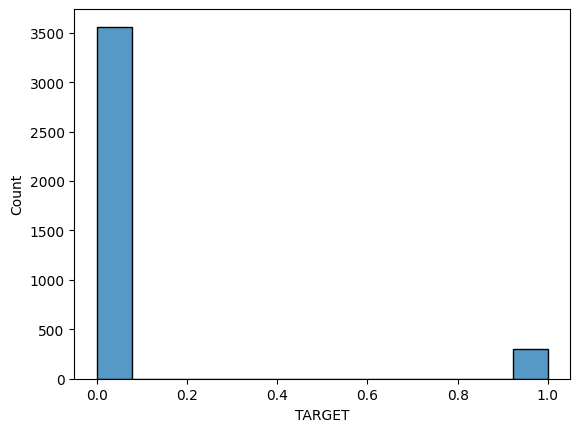

0    3561
1     303
Name: TARGET, dtype: int64

In [ ]:
sns.histplot(data=data['TARGET'])
plt.show()
data.TARGET.value_counts()

Checking the missing values in percentage

In [ ]:
def find_missing_values(data):
    missing_values = data.isnull().sum()

    # Calculate the percentage of missing values for each column
    percentage_missing = (missing_values / len(data)) * 100

    # Create a DataFrame to store the results
    missing_data = pd.DataFrame({'Column': data.columns,
                                 'Missing Values': missing_values,
                                 'Percentage': percentage_missing})

    # Sort the DataFrame by the percentage of missing values in descending order
    missing_data = missing_data.sort_values(by='Percentage', ascending=False)

    return missing_data


In [ ]:
find_missing_values(data)

Column  Missing Values  \
COMMONAREA_MODE                            COMMONAREA_MODE            2675   
COMMONAREA_AVG                              COMMONAREA_AVG            2675   
COMMONAREA_MEDI                            COMMONAREA_MEDI            2675   
NONLIVINGAPARTMENTS_MODE          NONLIVINGAPARTMENTS_MODE            2660   
NONLIVINGAPARTMENTS_AVG            NONLIVINGAPARTMENTS_AVG            2660   
NONLIVINGAPARTMENTS_MEDI          NONLIVINGAPARTMENTS_MEDI            2660   
LIVINGAPARTMENTS_AVG                  LIVINGAPARTMENTS_AVG            2623   
LIVINGAPARTMENTS_MODE                LIVINGAPARTMENTS_MODE            2623   
LIVINGAPARTMENTS_MEDI                LIVINGAPARTMENTS_MEDI            2623   
FONDKAPREMONT_MODE                      FONDKAPREMONT_MODE            2603   
FLOORSMIN_MEDI                              FLOORSMIN_MEDI            2596   
FLOORSMIN_MODE                              FLOORSMIN_MODE            2596   
FLOORSMIN_AVG                                FLOORSMIN_AVG            2596   
OWN_CAR_AGE                                    OWN_CAR_AGE            2560   
YEARS_BUILD_MEDI                          YEARS_BUILD_MEDI            2536   
YEARS_BUILD_AVG                            YEARS_BUILD_AVG            2536   
YEARS_BUILD_MODE                          YEARS_BUILD_MODE            2536   
LANDAREA_MODE                                LANDAREA_MODE            2264   
LANDAREA_AVG                                  LANDAREA_AVG            2264   
LANDAREA_MEDI                                LANDAREA_MEDI            2264   
BASEMENTAREA_MEDI                        BASEMENTAREA_MEDI            2239   
BASEMENTAREA_MODE                        BASEMENTAREA_MODE            2239   
BASEMENTAREA_AVG                          BASEMENTAREA_AVG            2239   
EXT_SOURCE_1                                  EXT_SOURCE_1            2179   
NONLIVINGAREA_MEDI                      NONLIVINGAREA_MEDI            2087   
NONLIVINGAREA_MODE                      NONLIVINGAREA_MODE            2086   
NONLIVINGAREA_AVG                        NONLIVINGAREA_AVG            2086   
ELEVATORS_AVG                                ELEVATORS_AVG            2027   
ELEVATORS_MEDI                              ELEVATORS_MEDI            2027   
ELEVATORS_MODE                              ELEVATORS_MODE            2027   
APARTMENTS_AVG                              APARTMENTS_AVG            1939   
APARTMENTS_MEDI                            APARTMENTS_MEDI            1939   
APARTMENTS_MODE                            APARTMENTS_MODE            1939   
WALLSMATERIAL_MODE                      WALLSMATERIAL_MODE            1935   
LIVINGAREA_AVG                              LIVINGAREA_AVG            1918   
LIVINGAREA_MODE                            LIVINGAREA_MODE            1918   
LIVINGAREA_MEDI                            LIVINGAREA_MEDI            1918   
HOUSETYPE_MODE                              HOUSETYPE_MODE            1913   
ENTRANCES_MODE                              ENTRANCES_MODE            1912   
ENTRANCES_AVG                                ENTRANCES_AVG            1912   
ENTRANCES_MEDI                              ENTRANCES_MEDI            1912   
FLOORSMAX_MEDI                              FLOORSMAX_MEDI            1892   
FLOORSMAX_AVG                                FLOORSMAX_AVG            1892   
FLOORSMAX_MODE                              FLOORSMAX_MODE            1892   
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MODE            1874   
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MEDI            1874   
YEARS_BEGINEXPLUATATION_AVG    YEARS_BEGINEXPLUATATION_AVG            1874   
TOTALAREA_MODE                              TOTALAREA_MODE            1851   
EMERGENCYSTATE_MODE                    EMERGENCYSTATE_MODE            1815   
OCCUPATION_TYPE                            OCCUPATION_TYPE            1199   
EXT_SOURCE_3                                  EXT_SOURCE_3             776

In [ ]:
data.dtypes.value_counts()

float64    85
int64      21
object     16
dtype: int64

In [ ]:
# cheking the unique values
data.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               5
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             57
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Univariate Analysis



Sweetviz offers a convenient way to visualize and analyze individual columns or features in dataset.

It generates detailed visualizations and statistics that help you gain insights into the distribution, summary statistics, and missing values of each feature.

Sweetviz can quickly compare two datasets, such as a training dataset and a testing dataset, to ensure they have similar characteristics.


In [ ]:
!pip install sweetviz


import sweetviz as sv
report = sv.analyze(data)
report.show_html("data1.html")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 65.1 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report data1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data Insights

1. **TARGET:** The "TARGET" variable shows that 92% of individuals do not default on their loans, while 8% do default. This indicates an imbalance in the target variable that needs to be addressed for algorithm development.

2. **NAME_CONTRACT_TYPE:** Approximately 90% of applicants prefer cash loans, while the remaining 10% opt for revolving loans.

3. **CODE_GENDER:** The dataset exhibits a gender distribution, with over 60% being female and approximately 40% male.

4. **FLAG_OWN_CAR:** Among individuals in the "N" category, 69% do not own a car, while among those in the "Y" category, 34% own a car.

5. **FLAG_OWN_REALTY:** The majority of individuals work in the real estate sector, accounting for 69% of the dataset. Other sectors have a lower representation.

6. **CNT_CHILDREN:** Around 80% of individuals prefer having one child, while a smaller proportion (10-15%) prefers having 2-3 children.

7. **AMT_INCOME_TOTAL:** Most individuals have an income ranging from 0 to 10 million.

8. **AMT_CREDIT:** The majority of applicants have a credit amount ranging from 0 to 1 million, with fewer applicants in the 1.5-2 million range.

9. **AMT_ANNUITY:** Roughly 50% of individuals have an AMT_ANNUITY in the range of 25,000 to 27,000, and about 30% have a rounded AMT_ANNUITY of 50,000 or higher.

10. **AMT_GOODS_PRICE:** Most individuals have a good price of 0-0.5 million, with 2 million being the most frequent value.

11. **NAME_TYPE_SUITE:** The majority (around 80%) of loan applicants apply individually. Families make up about 13% of applicants, while other categories like "children," "Other_B," "Other_A," and "Group of people" each have around 1% representation.

12. **NAME_INCOME_TYPE:** Approximately 52% of applicants work and earn an income. Commercial associates account for about 23% of applicants. Categories like "Unemployed," "Student," "Businessman," and "Maternity leave" each make up only about 1% of applicants.

13. **NAME_EDUCATION_TYPE:** Most individuals (over 60%) have completed secondary or secondary special education. About 24% have intermediate or higher education, while incomplete higher education, lower secondary education, and academic degrees each make up about 1-2% of the population.

14. **NAME_FAMILY_STATUS:** The majority of loan applicants are married individuals. Single or not-married individuals make up approximately 15% of applicants. Categories including widows and unknown individuals also have a notable presence.

15. **NAME_HOUSING_TYPE:** Around 80% of individuals live in houses or apartments, the most common housing type. Less common housing types like rented apartments, office apartments, and co-op apartments have lower representation.

16. **DAYS_BIRTH:** The majority of individuals fall within the age range of 27 to 55 years old. A small subset (approximately 4%) is around 69 years old.

17. **DAYS_EMPLOYED:** Approximately 80% of the workforce consists of non-employees, while 15% earn an annual income of 350,000 or more.

18. **DAYS_REGISTRATION:** Most registrations fall within the 0-5k range. A smaller percentage is in the 10k range, and 15k registrations are relatively infrequent.

19. **DAYS_ID_PUBLISH:** About 18% of identifiers have been published with values in the 5,000 to 4,000 range. Additionally, 8% have values in the 3,000 to 0 range, while values of 6,000 are relatively rare.

20. **FLAG_EMP_PHONE:** The majority of individuals have access to individual phones.

21. **FLAG_WORK_PHONE:** Roughly 80% of individuals have a value of 0 for the 'work phone' attribute, while the remaining 20% have a value of 1.

22. **OCCUPATION_TYPE:** Around 26% of the workforce is employed in laborer occupations, with sales staff, core staff, and managers each accounting for 12-15% of the workforce. HR staff and IT staff are among the least common occupation categories.

23. **REGION_RATING_CLIENT:** Over 70% of individuals are from regions with medium ratings, while around 16% are from high-rating regions.

24. **REGION_RATING_CLIENT_W_CITY:** Similar to REGION_RATING_CLIENT, the majority falls into medium-rated regions.

25. **WEEK_APPR_PROCESS_START:** Loan processing typically begins during the weekdays, with Tuesday and Wednesday being the most common days. Monday, Thursday, and Friday also see loan processing, but Saturdays have a lower likelihood, at approximately 10%.

26. **CNT_FAM_MEMBERS:** Around 50% of applicants have two family members, while approximately 22% are single and about 17% have three family members.

27. **ORGANIZATION_TYPE:** About 22% of individuals are from business entity type 3.

28. **EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3:** Most people exhibit higher creditworthiness.

29. **FLAG_DOCUMENT_2:** Some people did not submit documents.

30. **FLAG_DOCUMENT_3:** Over 60% of people submitted documents, while 20-25% did not.

31. **AMT_REQ_CREDIT_BUREAU_HOUR:** Over 80% of individuals made no inquiries within an hour.

32. **AMT_REQ_CREDIT_BUREAU_DAY:** More than 90% of individuals do not make inquiries within a single day, while only 1% make inquiries on the same day.

33. **FONDKAPREMONT_MODE:** The majority of people require funds for regular operational accounts, representing over 60% of cases. Some cases have unspecified fund requirements, and there are also instances of funds needed for organization-specific accounts.

34. **WALLSMATERIAL_MODE:** The most common wall materials used are panel and stone brick. Monolithic and other materials are less common.

35. **DAYS_EMPLOYED:** This column represents the number of days an individual has been employed. As previously mentioned, approximately 80% of the workforce consists of non-employees. There is also a group of individuals (around 15%) who have been employed for an annual income of 350,000 or more.

36. **DAYS_REGISTRATION:** Most registrations fall within the range of 0-5,000 days, indicating the number of days since the individual's registration. There is a smaller percentage of registrations in the 10,000-day range, and registrations beyond 15,000 days are relatively rare.

37. **DAYS_ID_PUBLISH:** This column refers to the number of days since the last time an individual's ID was published. About 18% of identifiers have been published with values falling in the 5,000 to 4,000-day range. Additionally, 8% have values in the 3,000 to 0-day range, while values of 6,000 are relatively uncommon.

38. **FLAG_EMP_PHONE:** This binary attribute indicates whether individuals have an employer-related phone. The majority of individuals have access to individual phones, as previously mentioned.

39. **FLAG_WORK_PHONE:** This binary attribute indicates whether individuals have a work-related phone. Approximately 80% of individuals have a value of 0, indicating that they do not have a work-related phone, while the remaining 20% have a value of 1, indicating that they do.

40. **OCCUPATION_TYPE:** This column represents the occupation type of individuals. It shows that around 26% of the workforce is employed in laborer occupations. Sales staff, core staff, and managers each account for 12-15% of the total workforce. HR staff and IT staff are among the less common occupation categories.

41. **REGION_RATING_CLIENT:** Over 70% of individuals are from regions with medium ratings, while approximately 16% are from high-rated regions. This column helps categorize regions based on their credit rating.

42. **REGION_RATING_CLIENT_W_CITY:** This column is similar to REGION_RATING_CLIENT, indicating the credit rating of regions with city data included.

43. **WEEK_APPR_PROCESS_START:** Loan processing typically begins during the weekdays, with Tuesday and Wednesday being the most common days. Monday, Thursday, and Friday also see loan processing, but Saturdays have a lower likelihood, at approximately 10%.

44. **CNT_FAM_MEMBERS:** This column shows the count of family members for each individual. Around 50% of applicants have two family members, while approximately 22% are single, and about 17% have three family members.

45. **ORGANIZATION_TYPE:** About 22% of individuals are categorized as business entity type 3. This column provides insights into the type of organization with which individuals are associated.

46. **EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3:** These columns represent external sources of credit information. Most people exhibit higher creditworthiness based on these sources.

47. **FLAG_DOCUMENT_2:** Some individuals did not submit certain documents. This binary attribute indicates the presence or absence of document submission.

48. **FLAG_DOCUMENT_3:** Over 60% of people submitted documents, while 20-25% did not. This attribute is binary and represents document submission.

49. **AMT_REQ_CREDIT_BUREAU_HOUR:** Over 80% of individuals made no inquiries within an hour. This column provides insights into the number of credit inquiries made.

50. **FONDKAPREMONT_MODE:** The majority of people require funds for regular operational accounts, representing over 60% of cases. Some cases have unspecified fund requirements, and there are also instances of funds needed for organization-specific accounts.

51. **WALLSMATERIAL_MODE:** The most common wall materials used are panel and stone brick. Monolithic and other materials are less common.

Bivariate analysis

In [ ]:
data.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0           0.00         0.0690         0.0833         0.1250        0.0369   
1           0.08         0.0345         0.2917         0.3333        0.0130   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0                0.0202          0.0190                   0.0000   
1                0.0773          0.0549                   0.0039   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0             0.0000           0.0252             0.0383   
1             0.0098           0.0924             0.0538   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                        0.9722            0.6341           0.0144   
1                        0.9851            0.8040           0.0497   

   ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
0          0.0000          0.0690          0.0833          0.1250   
1          0.0806          0.0345          0.2917          0.3333   

   LANDAREA_MODE  

In [ ]:
def bivariate_analysis(data, target_column):
    # Check if the target column exists in the dataset
    if target_column not in data.columns:
        print(f"Target column '{target_column}' not found in the dataset.")
        return

    # Exclude the target column from the list of columns to analyze
    columns_to_analyze = [col for col in data.columns if col != target_column]

    # Iterate through columns and create bivariate visualizations
    for column in columns_to_analyze:
        if data[column].dtype == 'object':
            # If the column is categorical, create a countplot
            plt.figure(figsize=(10, 6))
            sns.countplot(data=data, x=column, hue=target_column)
            plt.title(f'Bivariate Analysis: {column} vs. {target_column}')
            plt.xticks(rotation=90)
            plt.show()
        else:
            # If the column is numerical, create a box plot
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=data, x=target_column, y=column)
            plt.title(f'Bivariate Analysis: {column} vs. {target_column}')
            plt.xticks(rotation=90)
            plt.show()

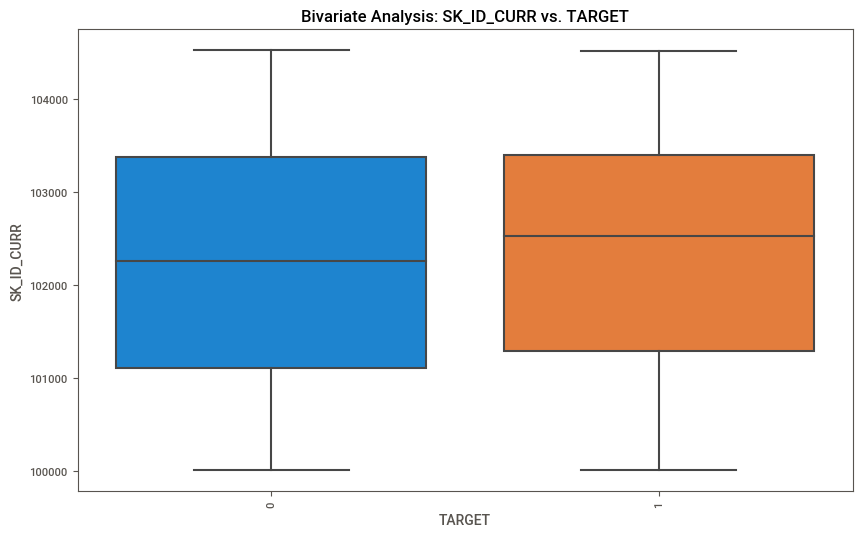

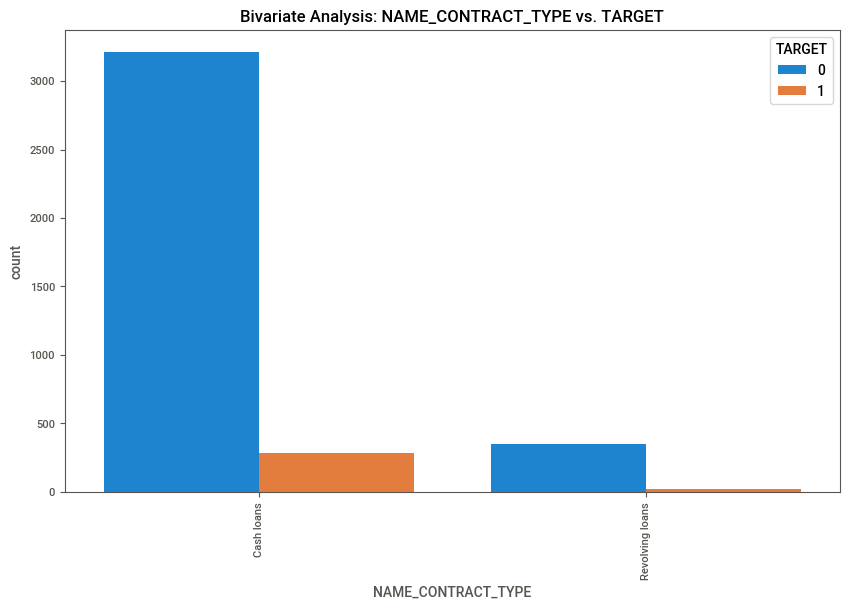

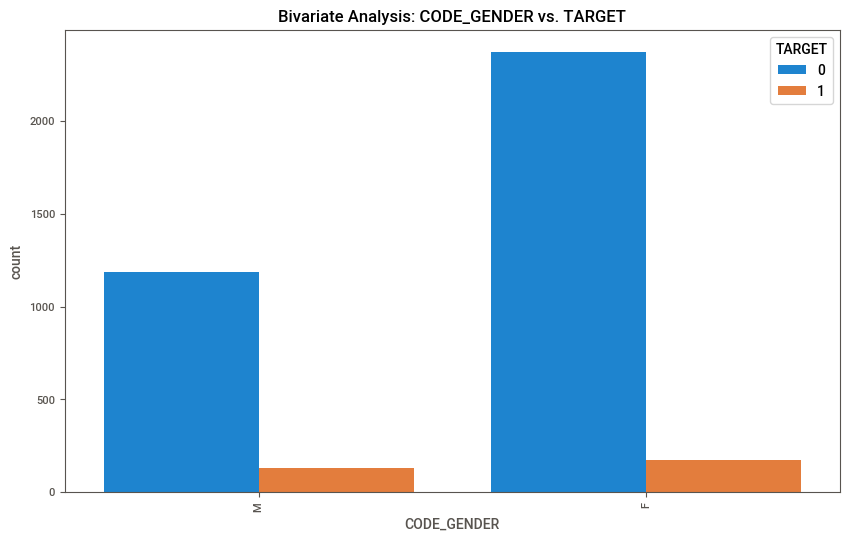

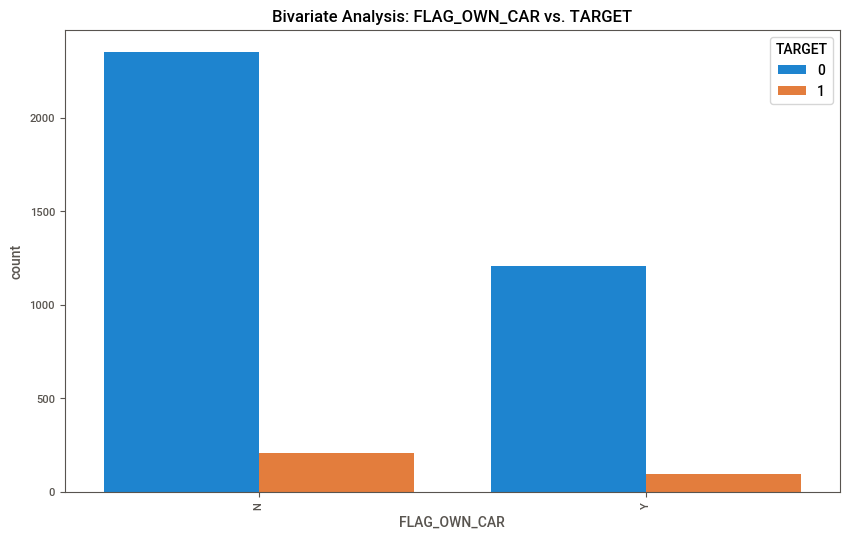

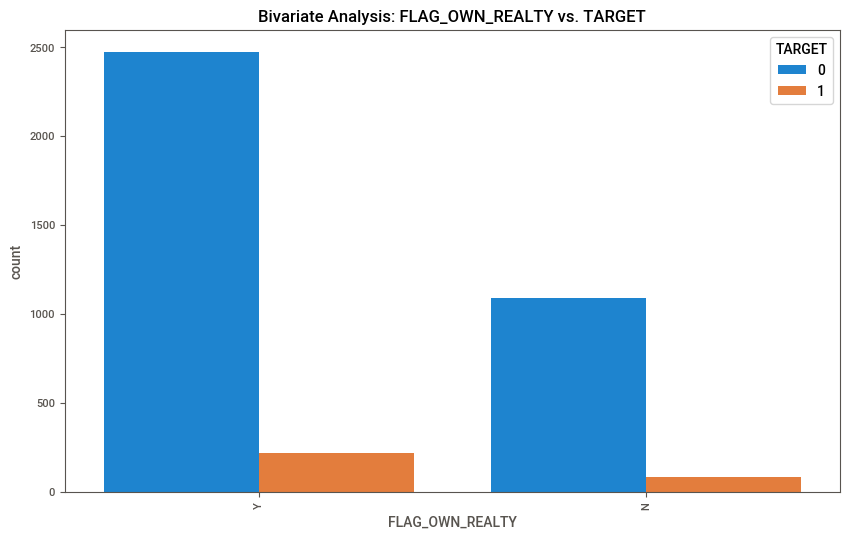

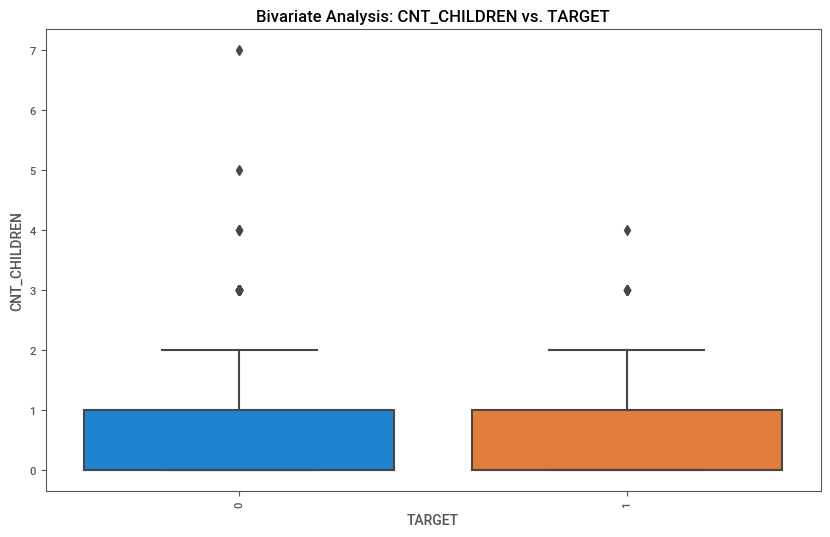

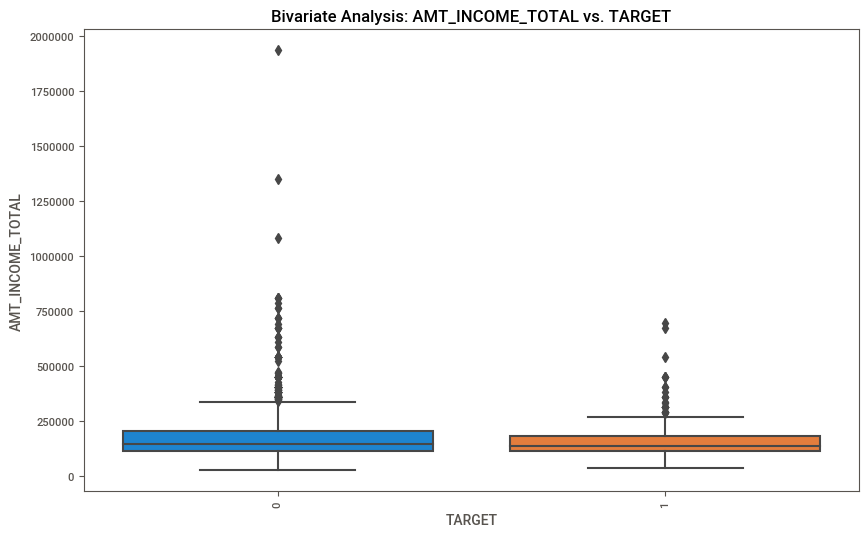

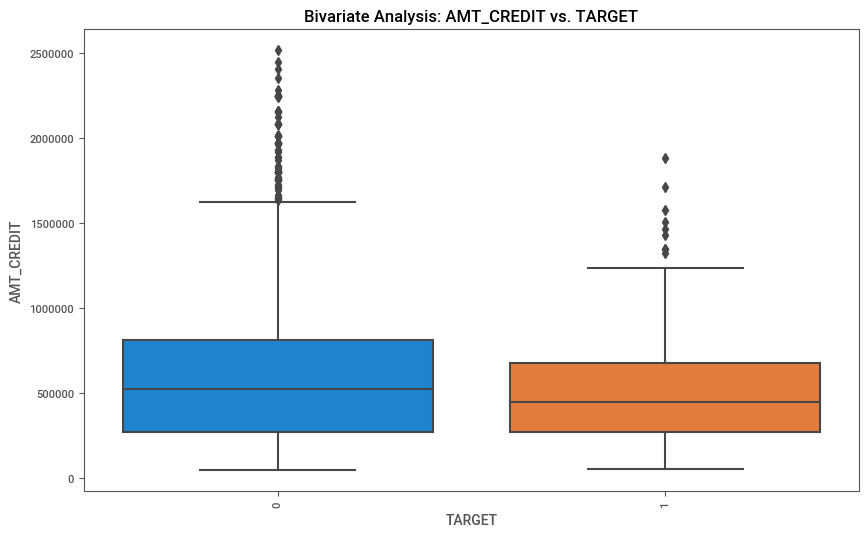

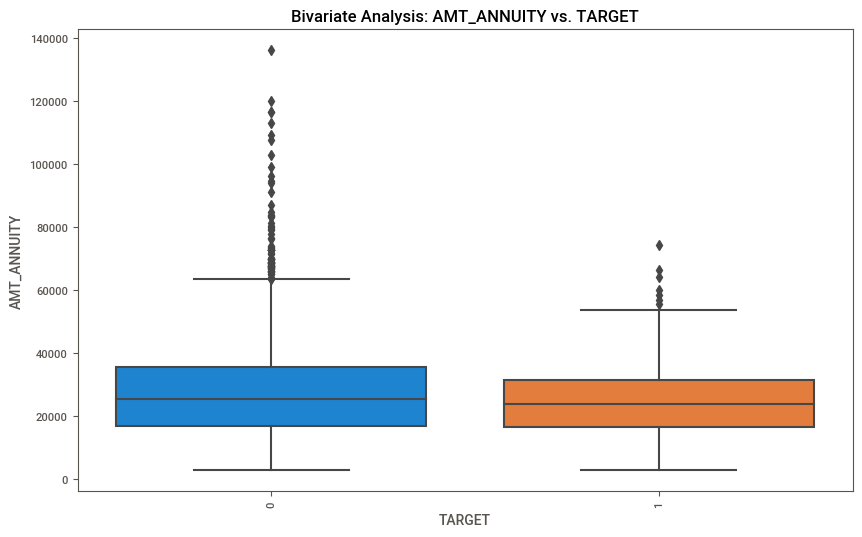

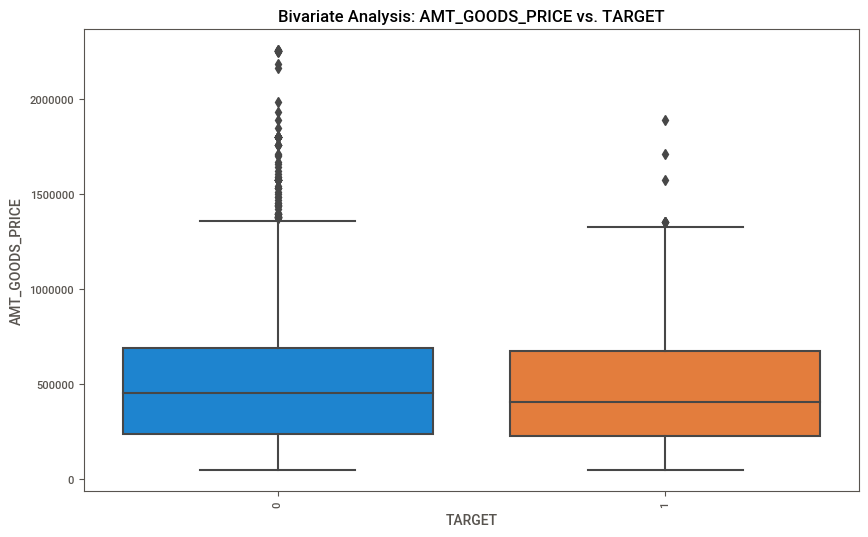

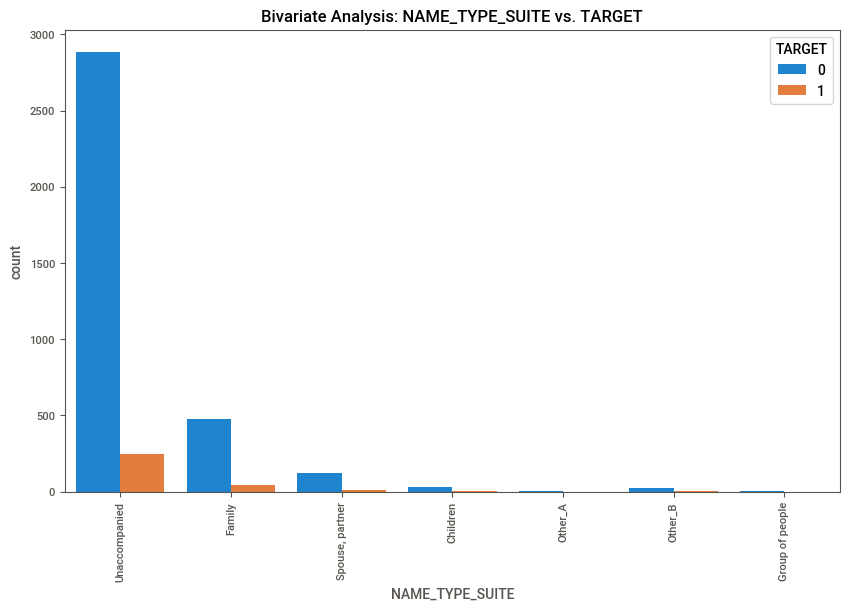

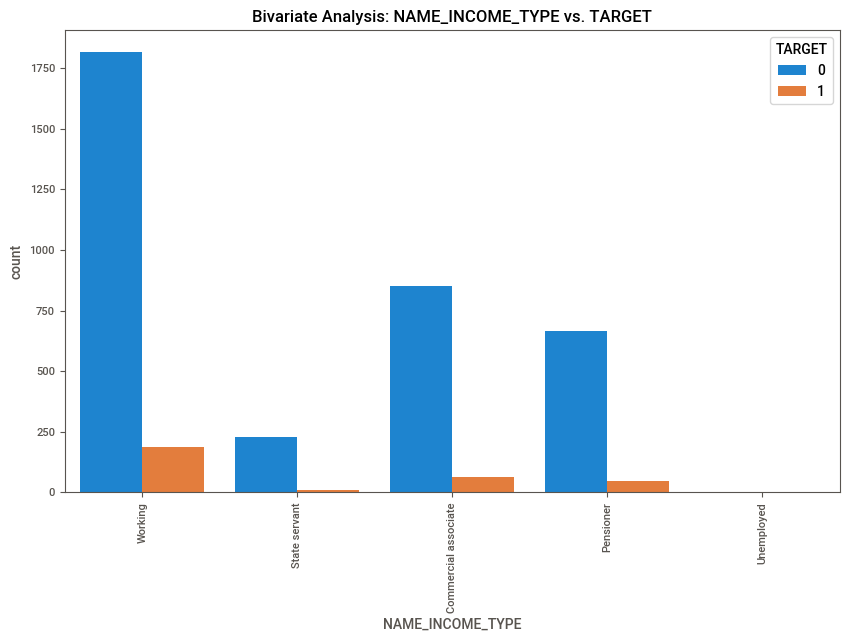

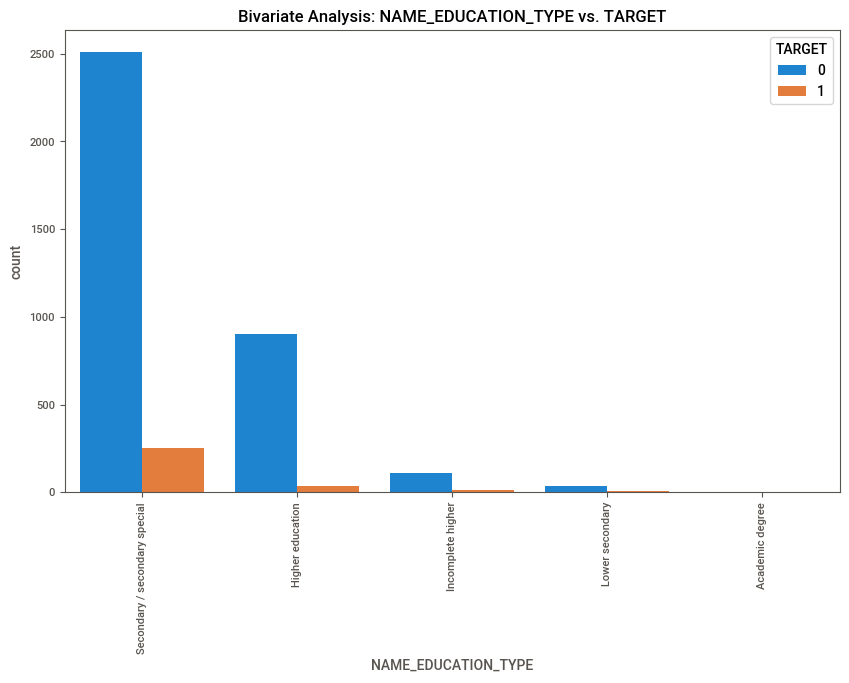

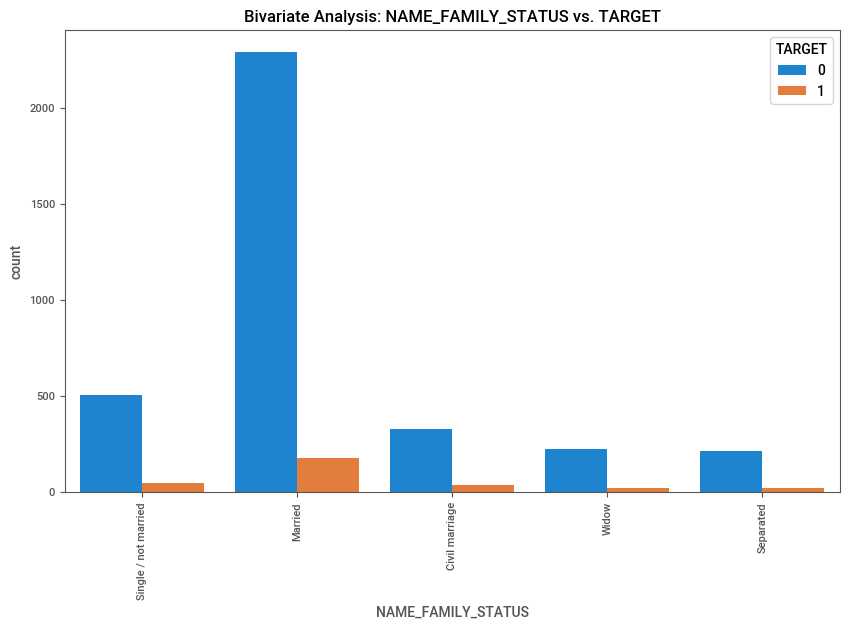

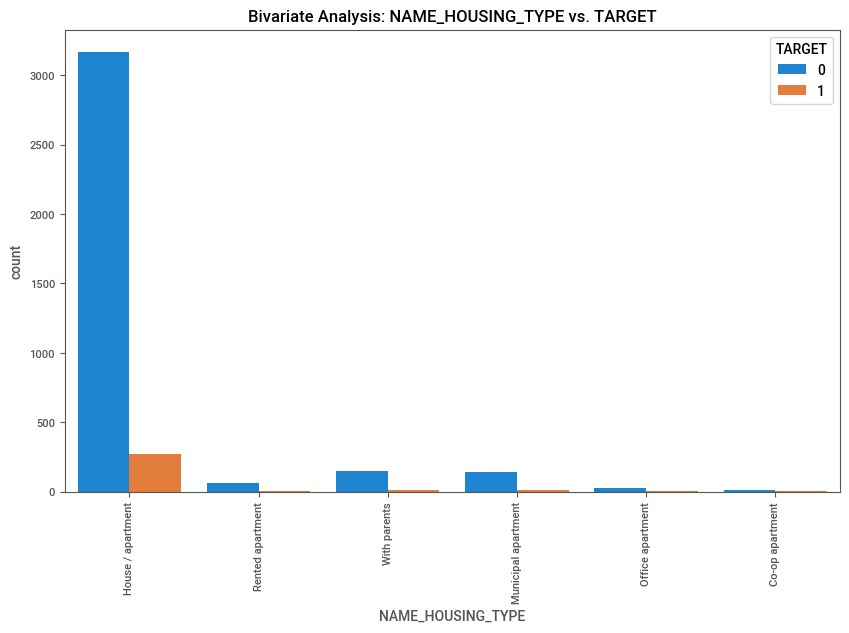

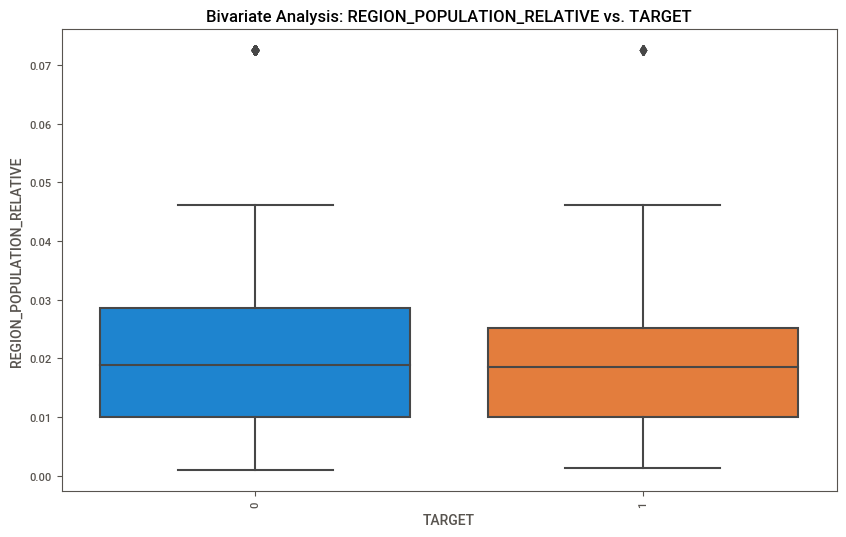

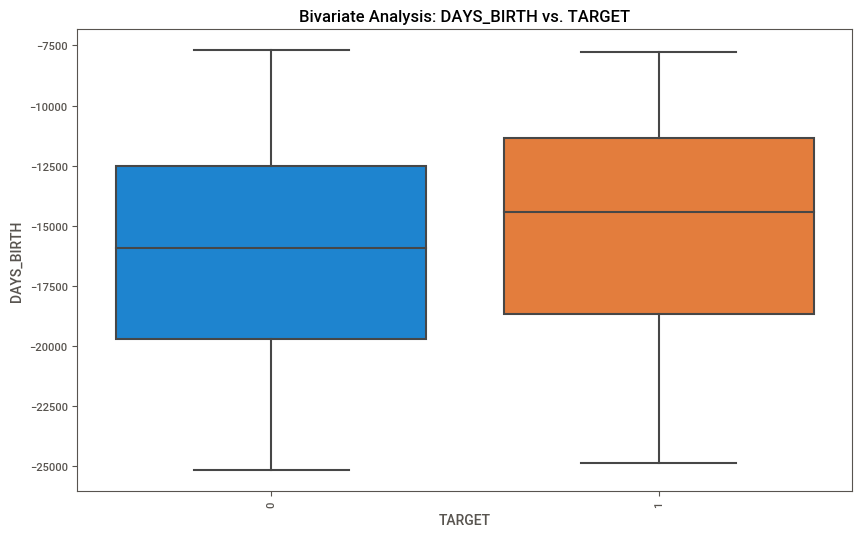

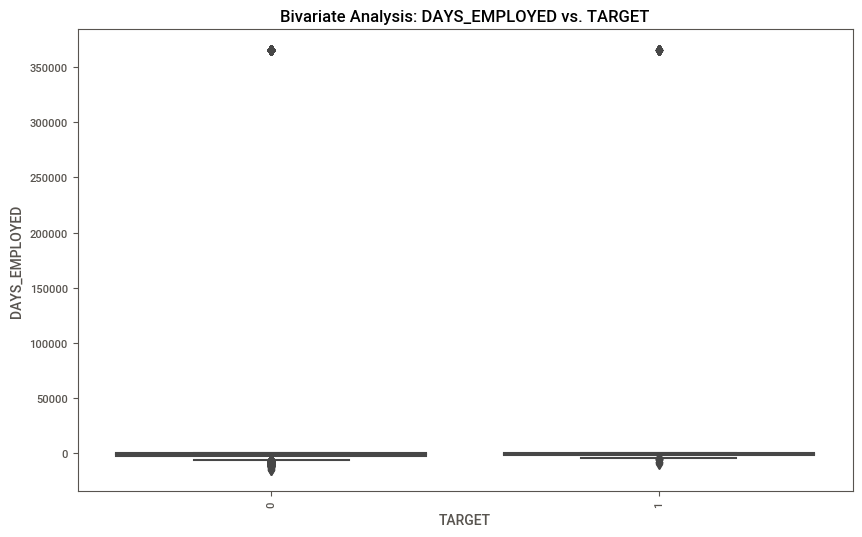

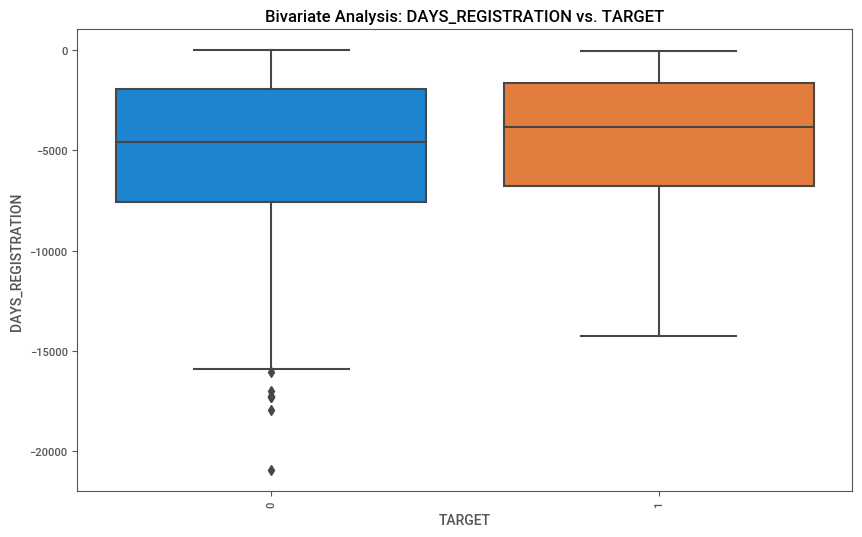

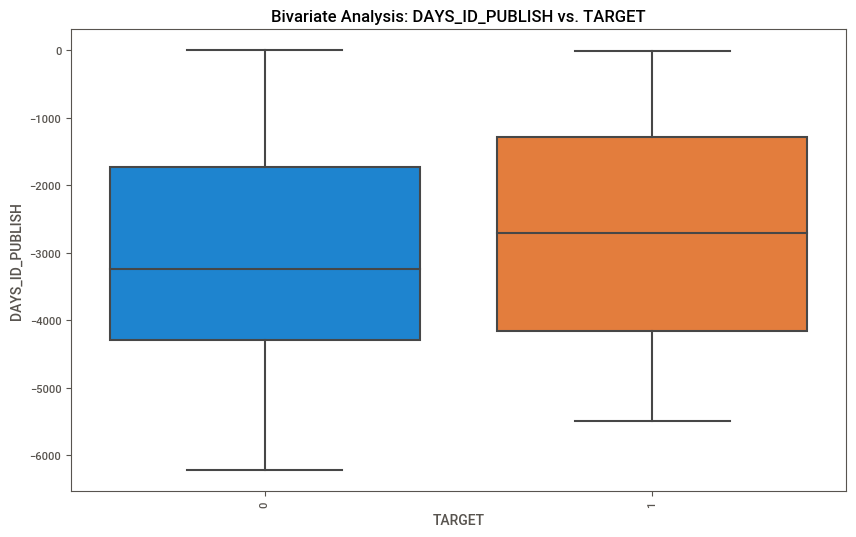

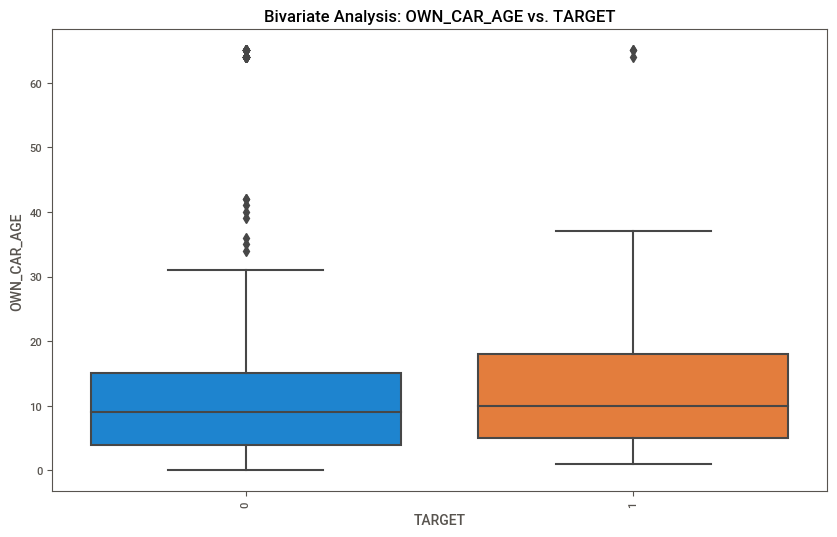

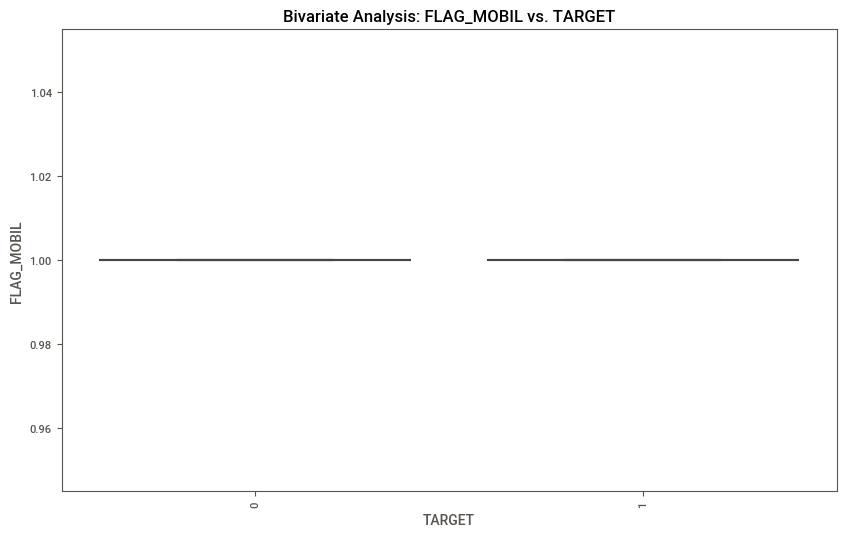

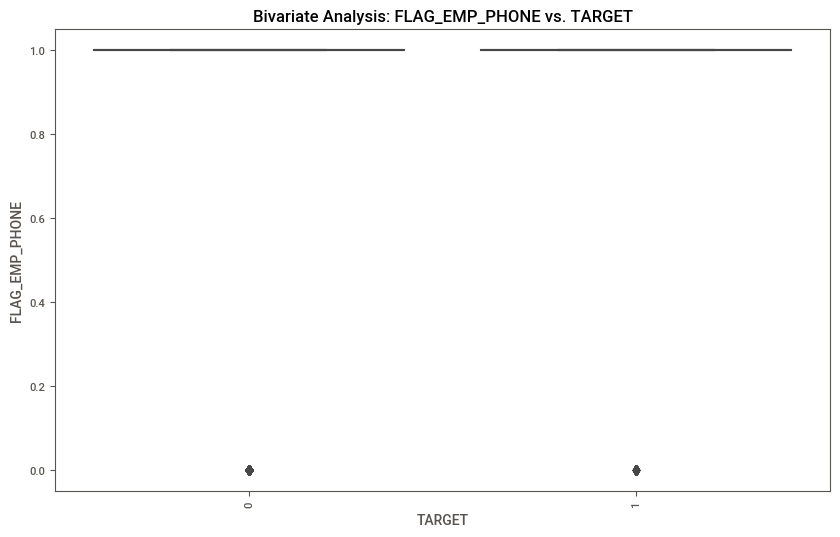

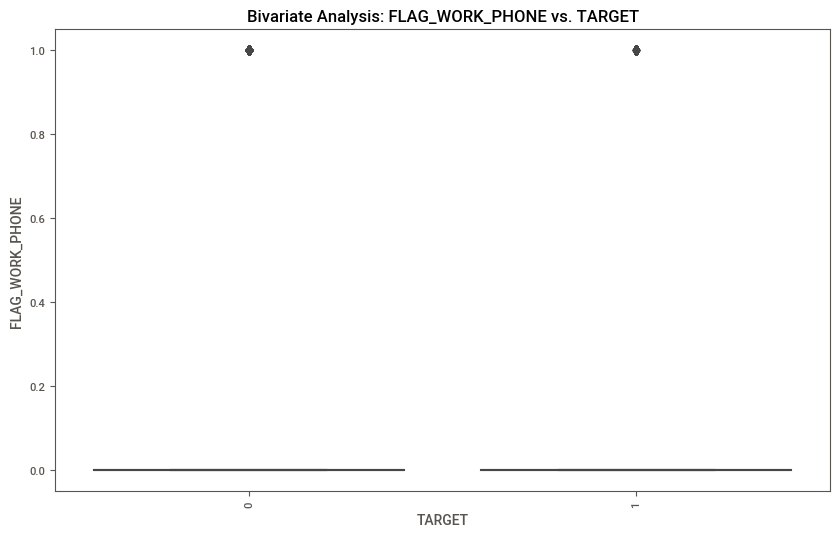

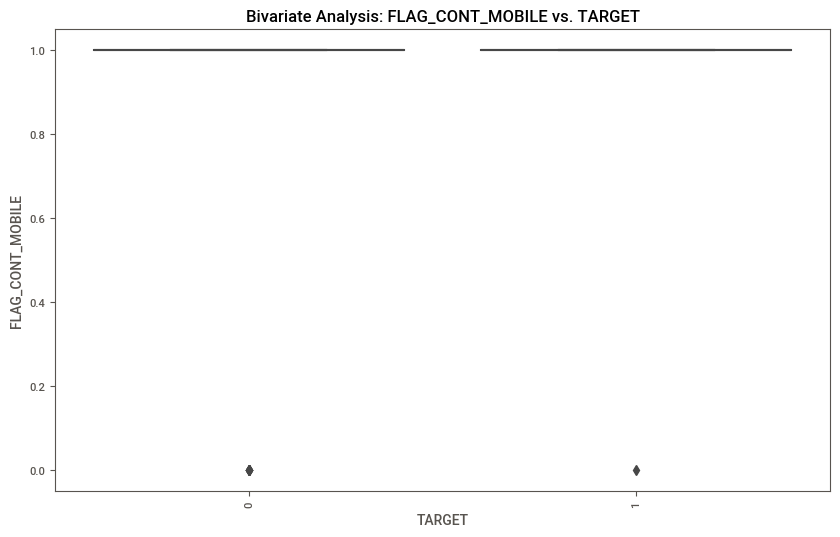

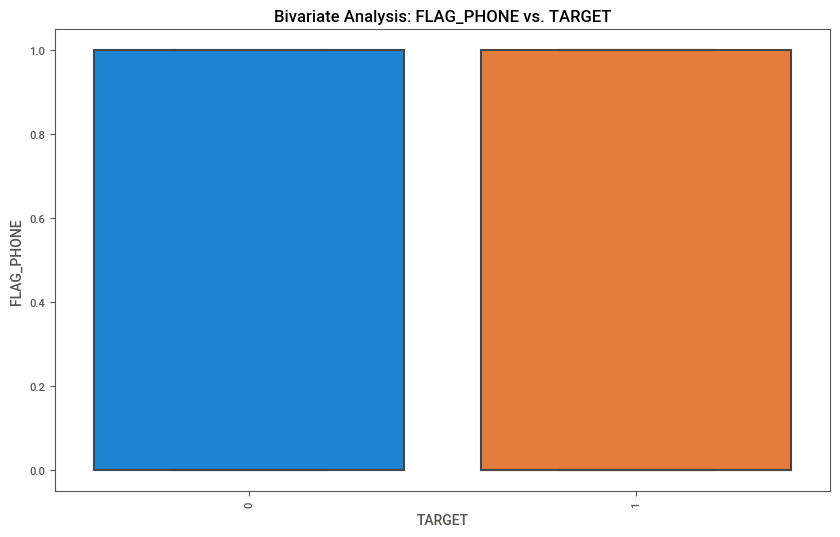

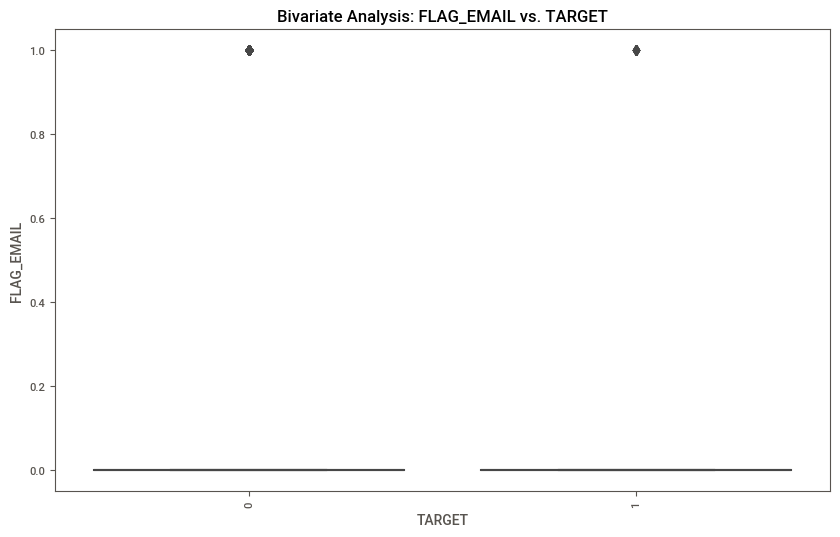

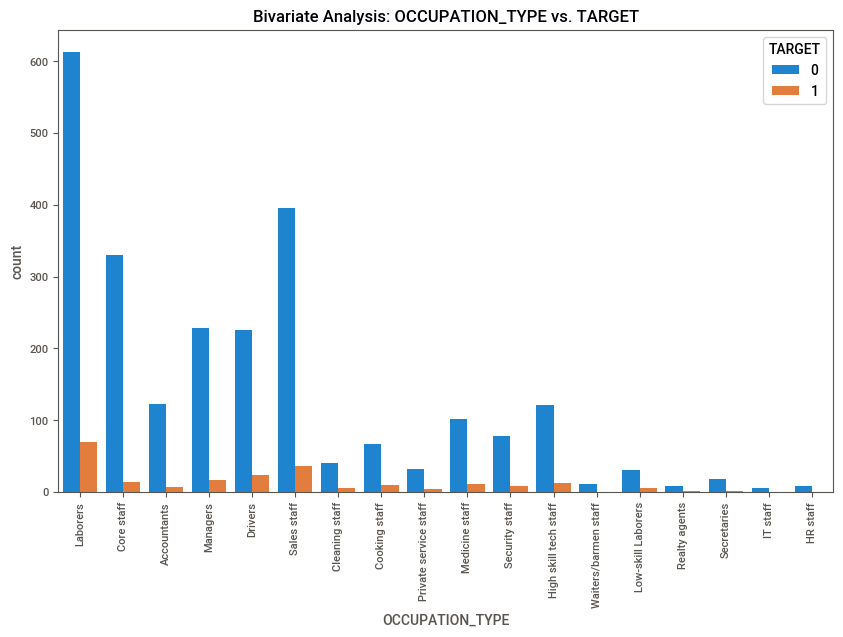

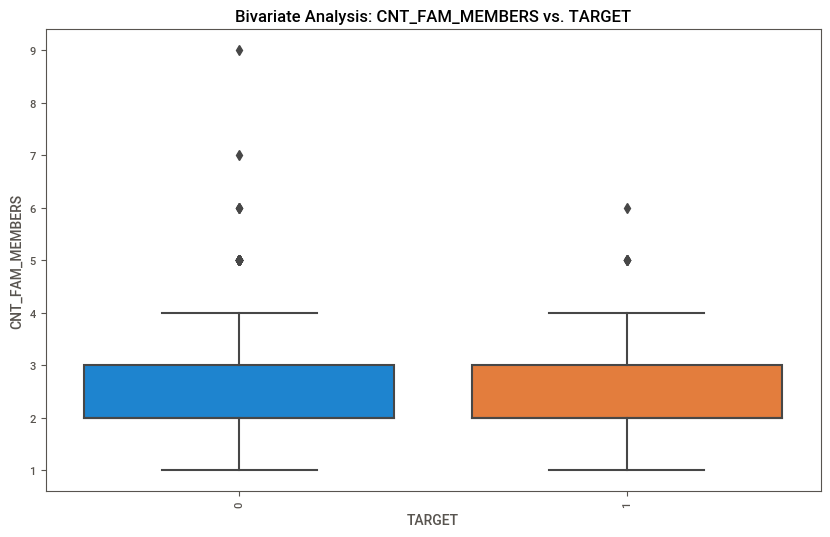

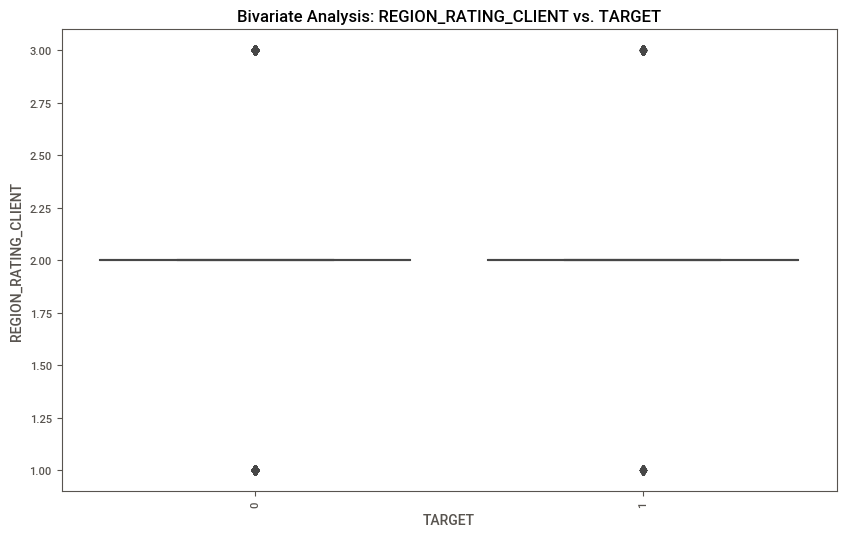

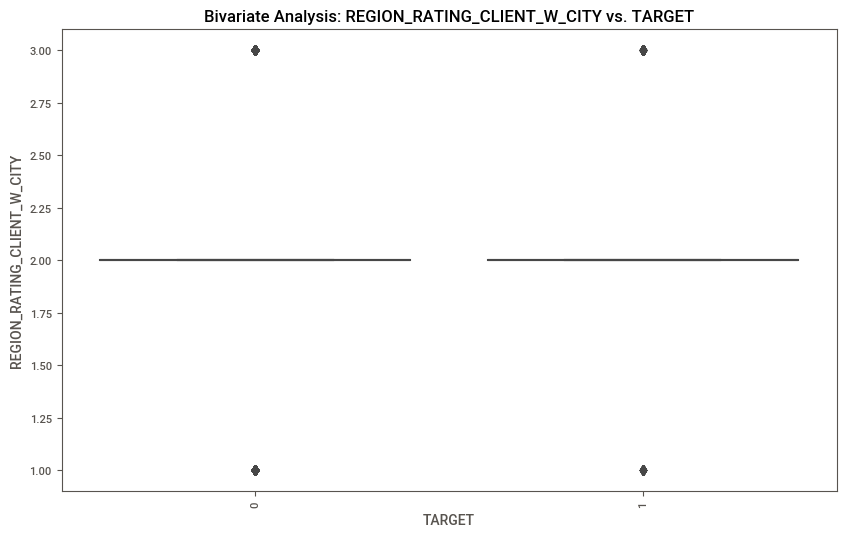

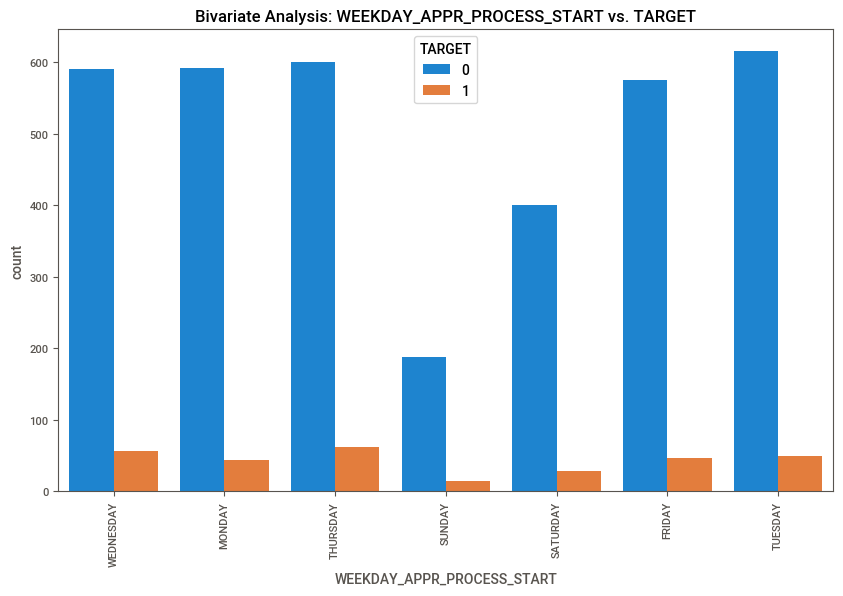

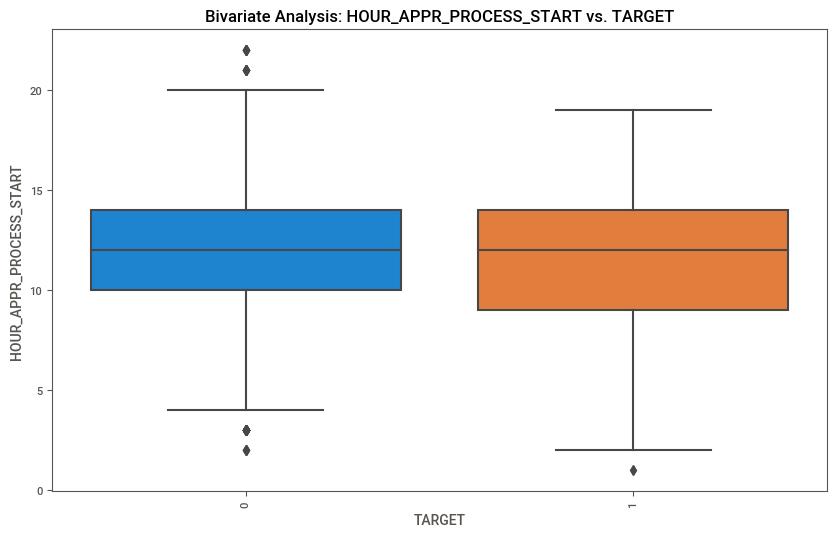

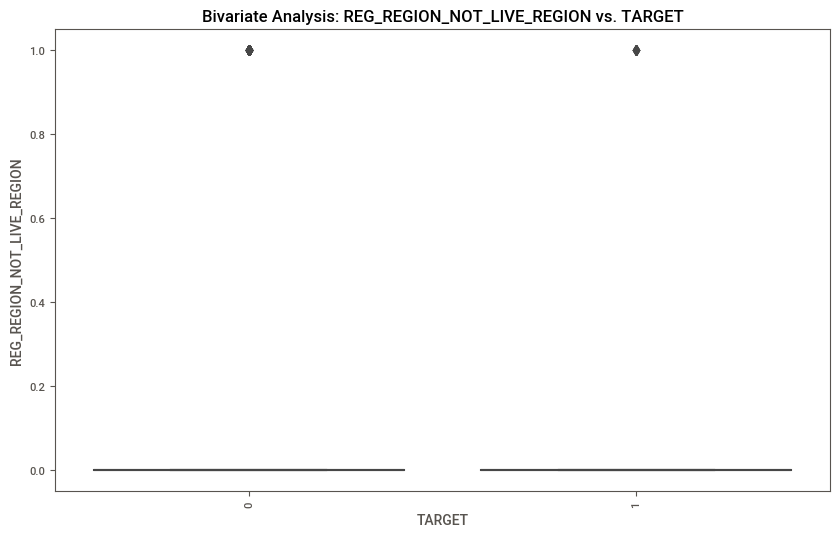

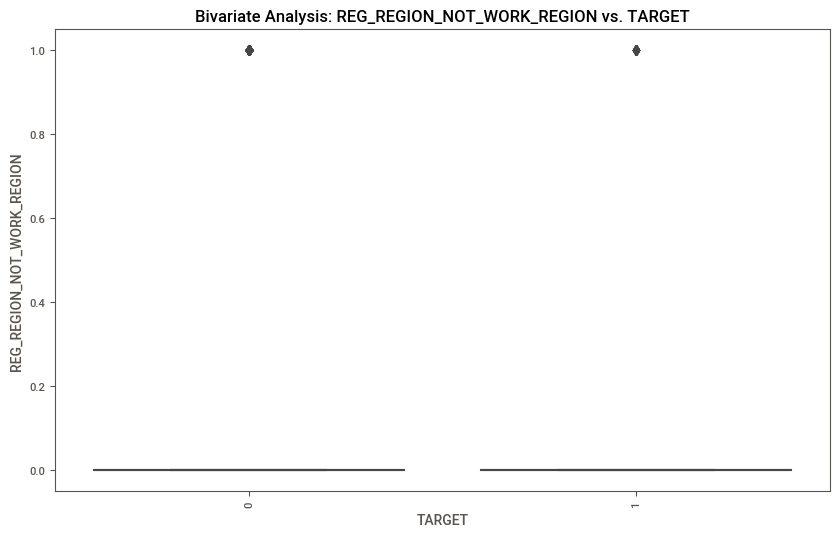

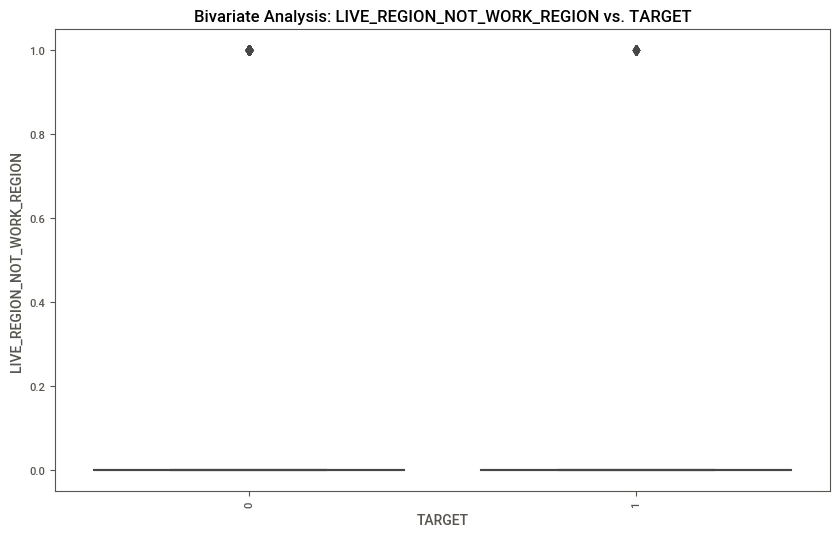

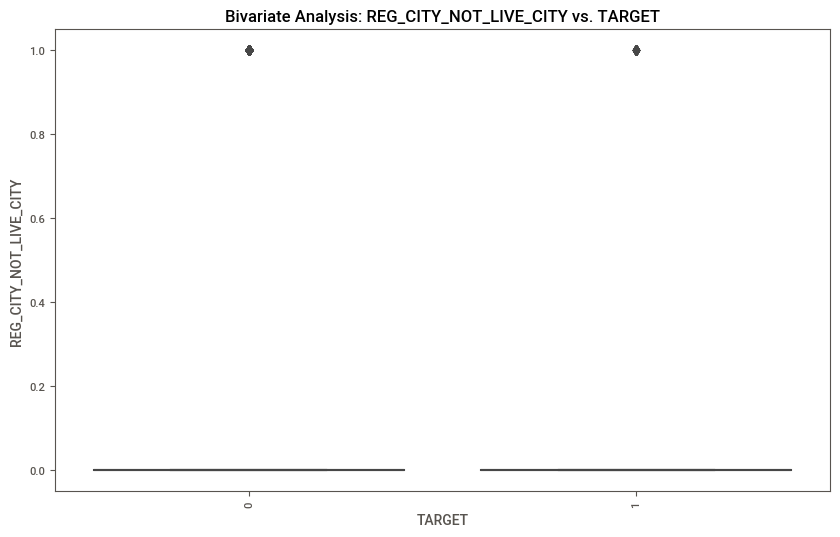

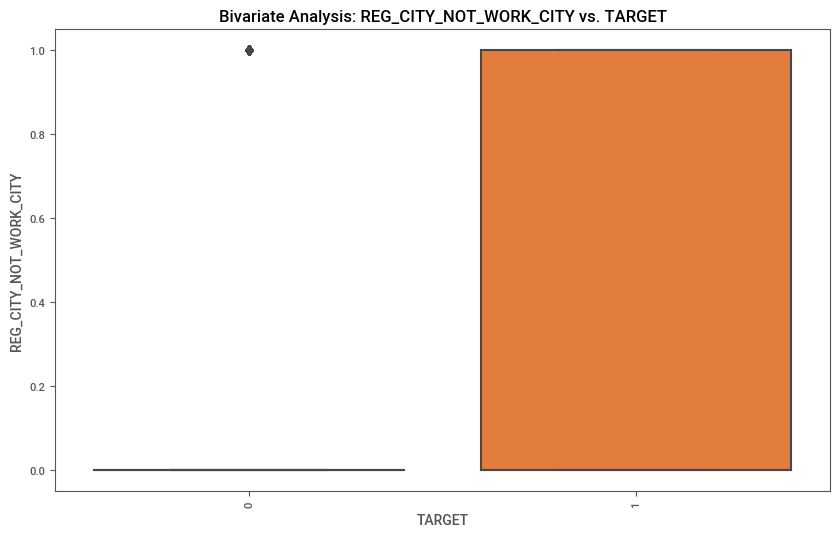

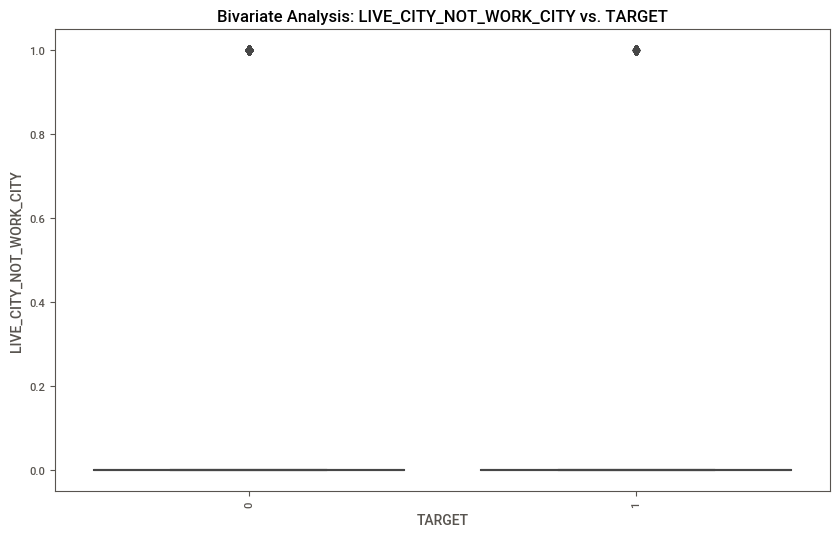

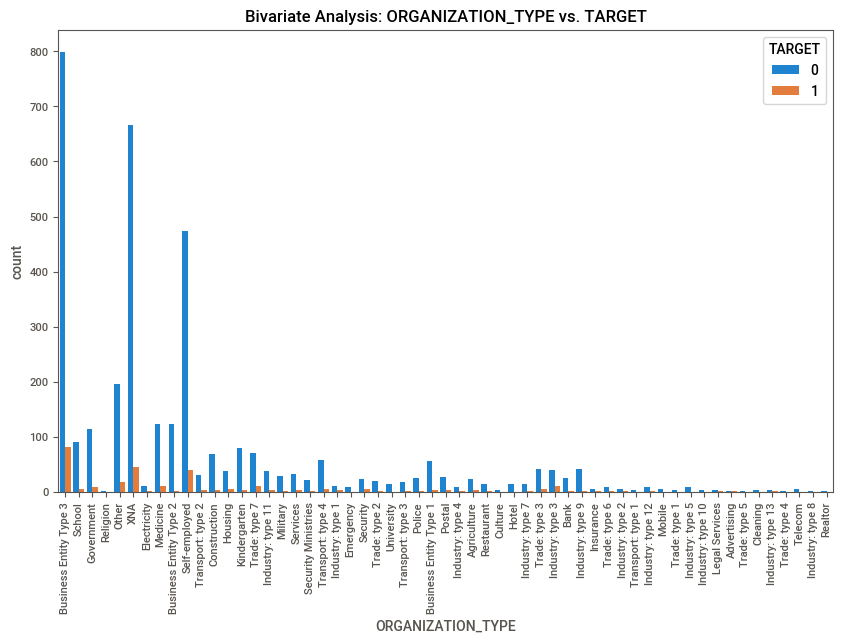

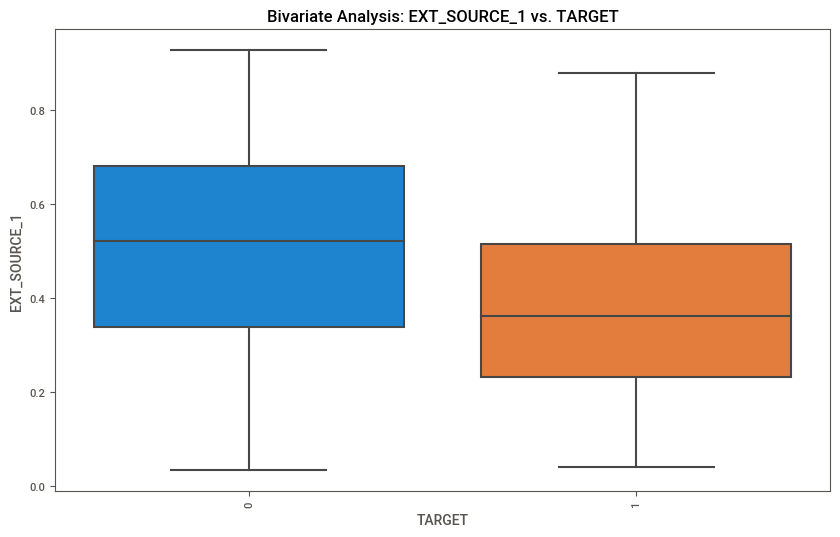

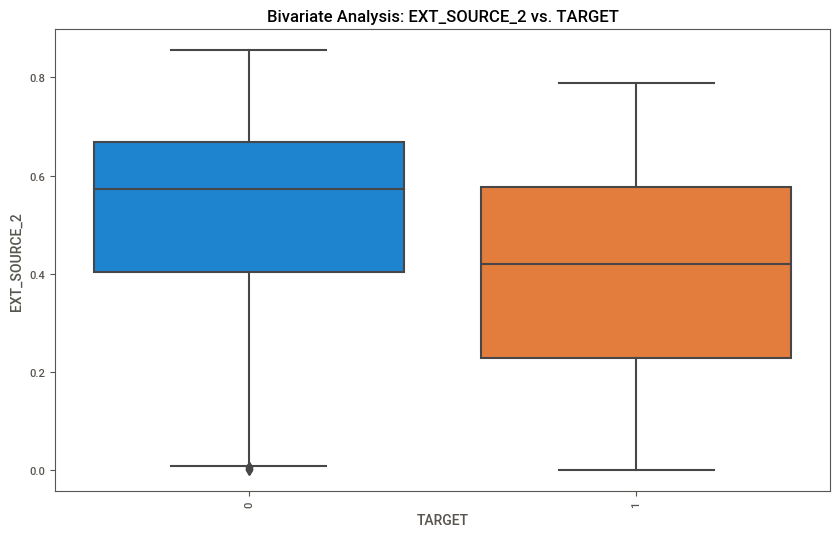

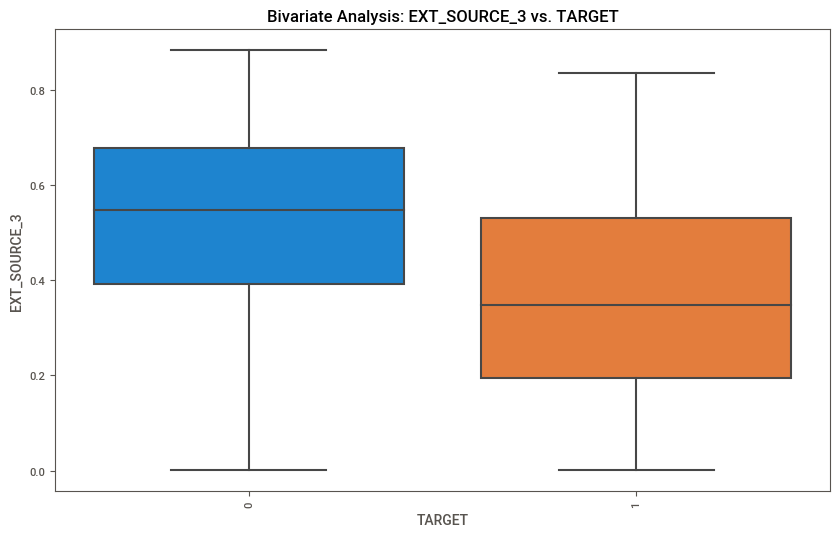

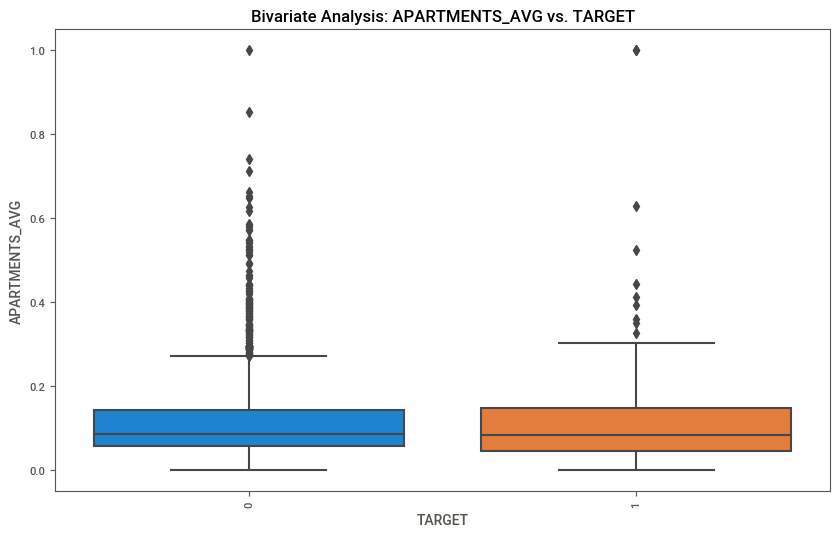

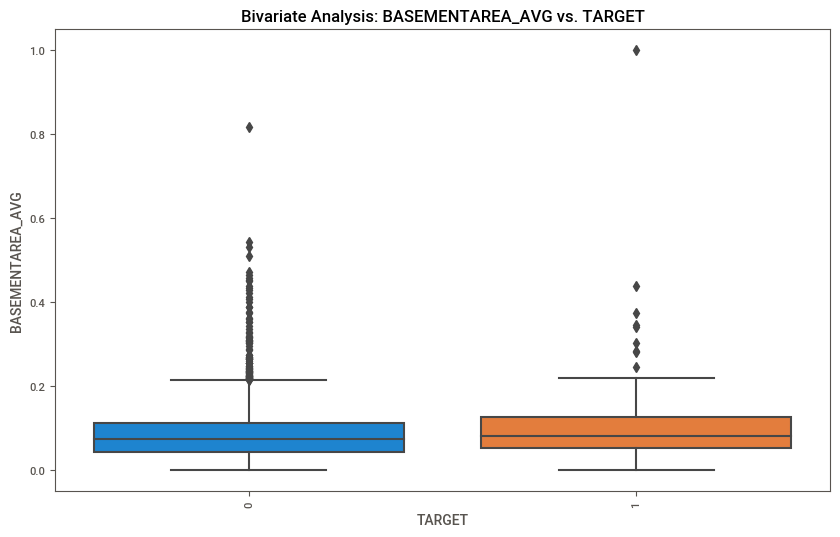

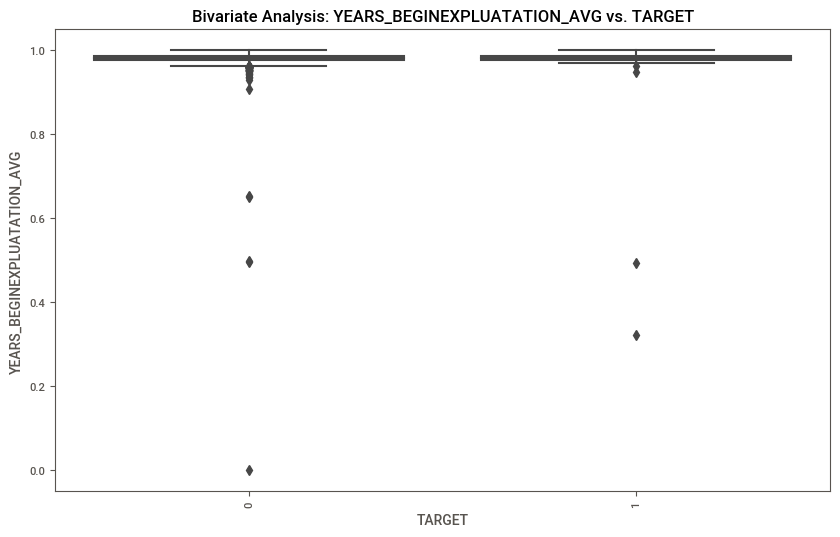

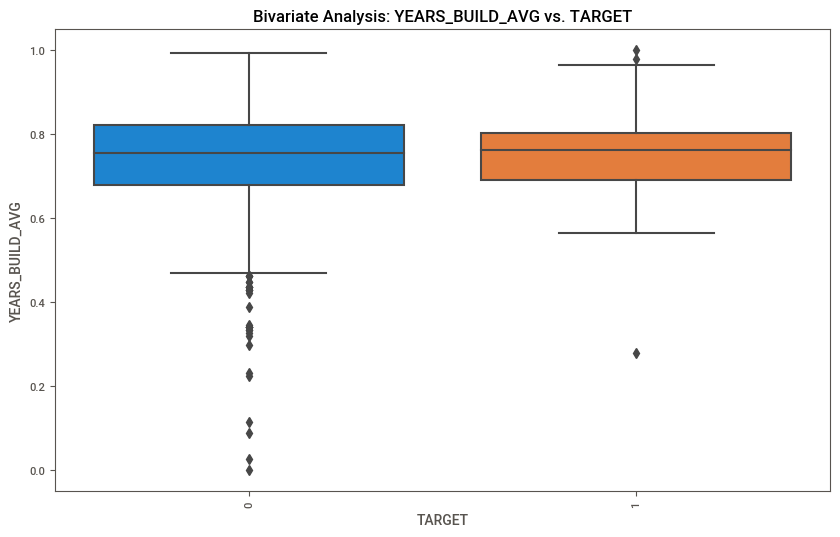

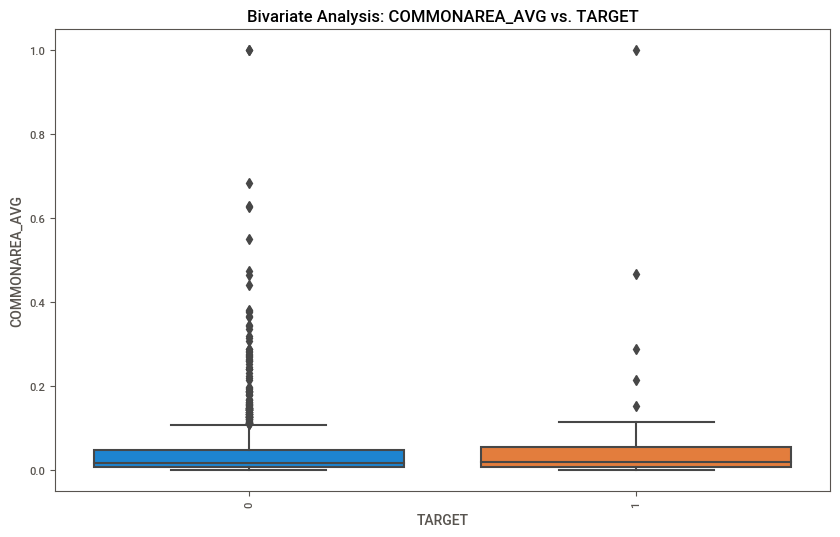

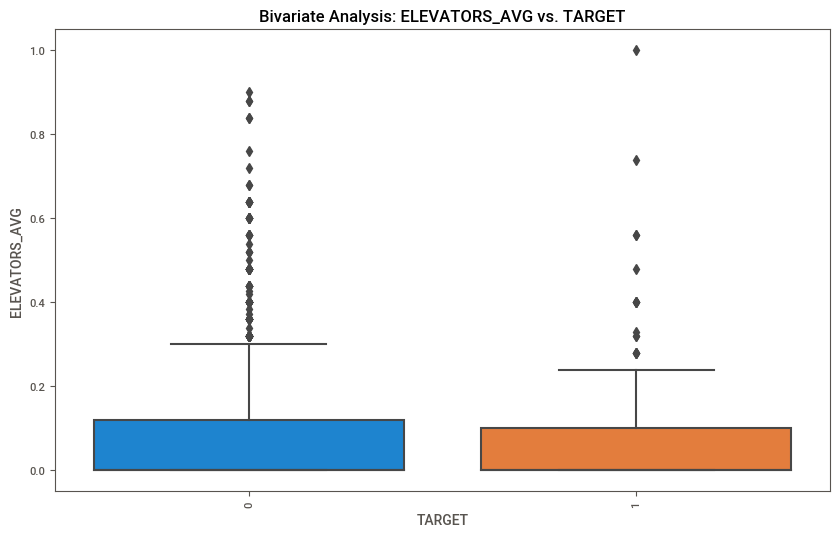

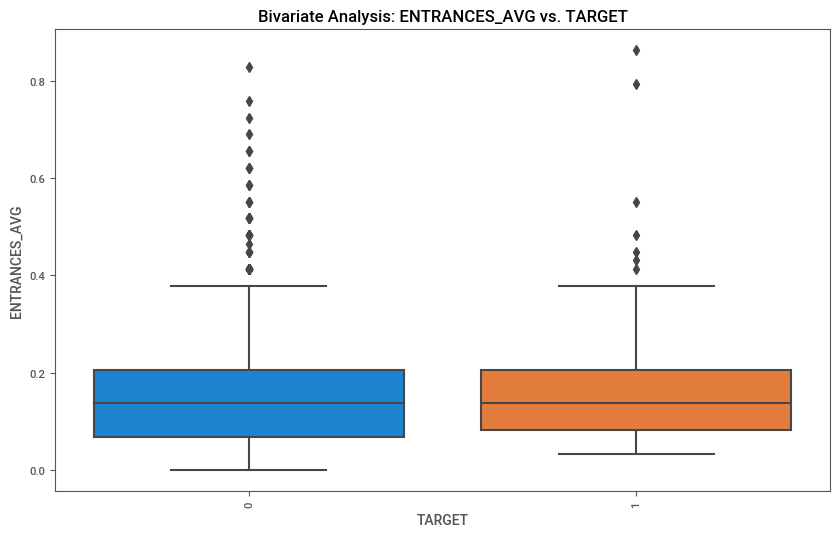

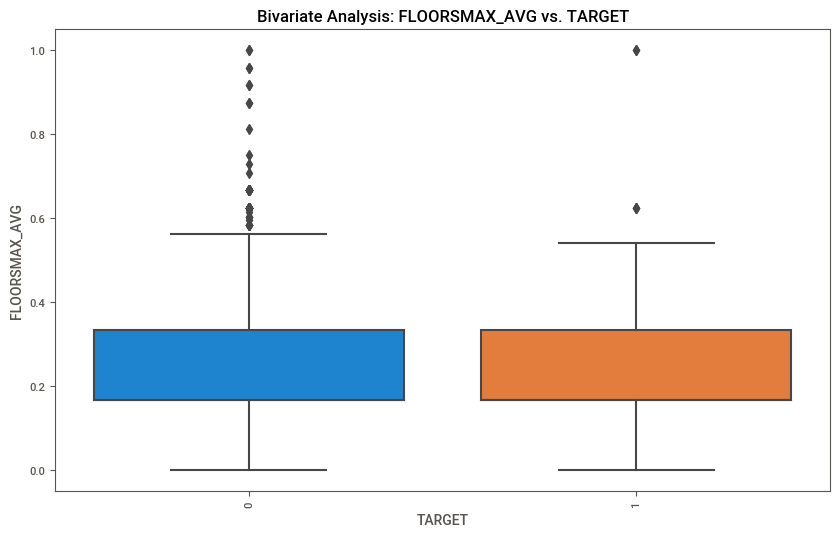

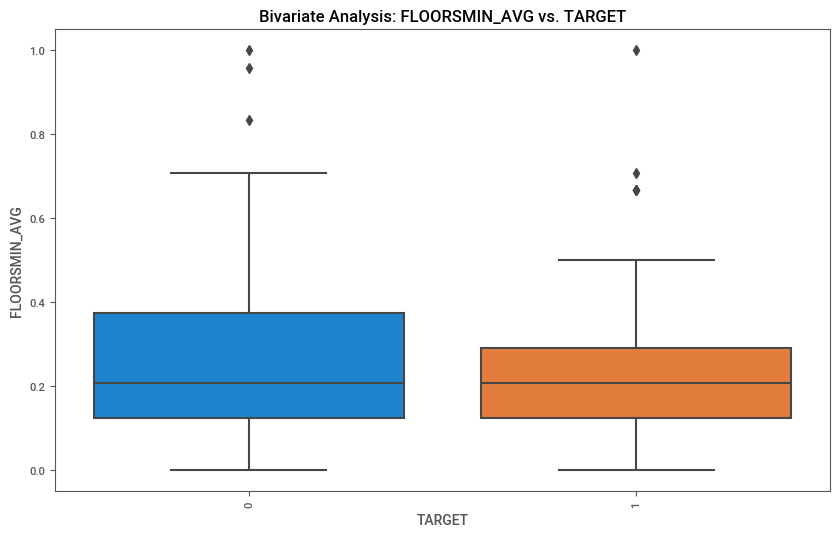

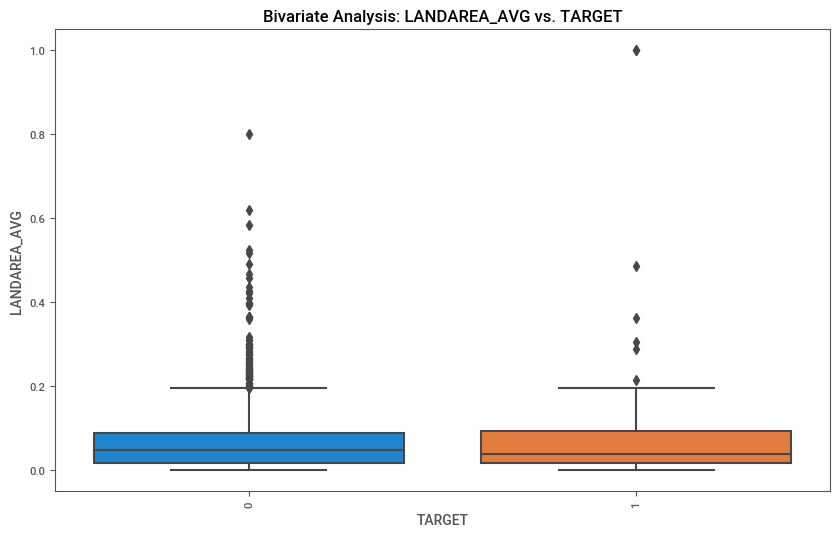

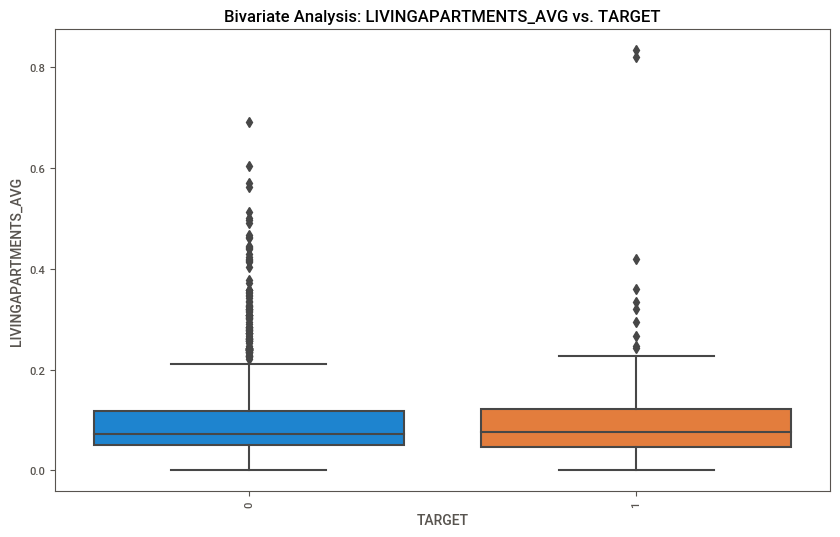

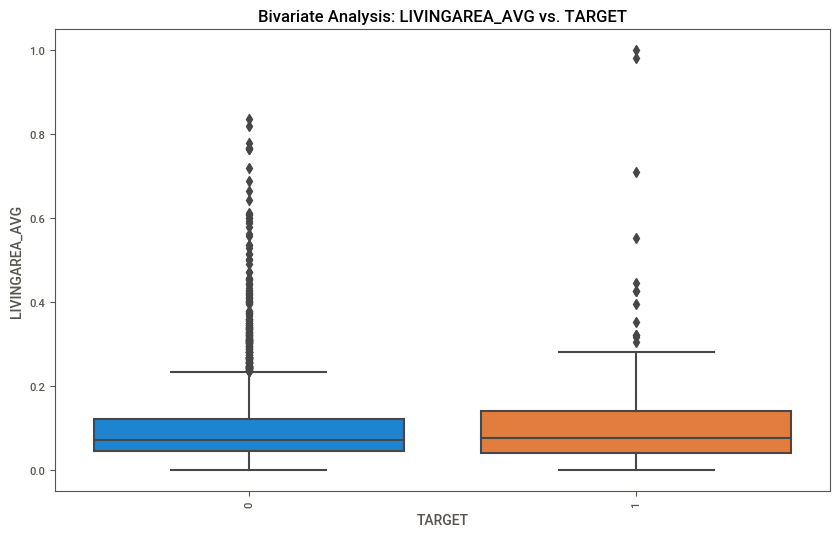

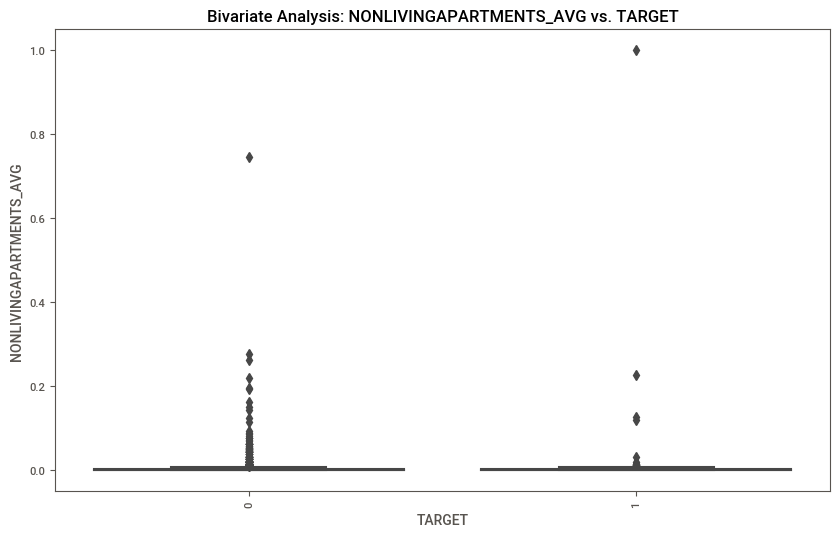

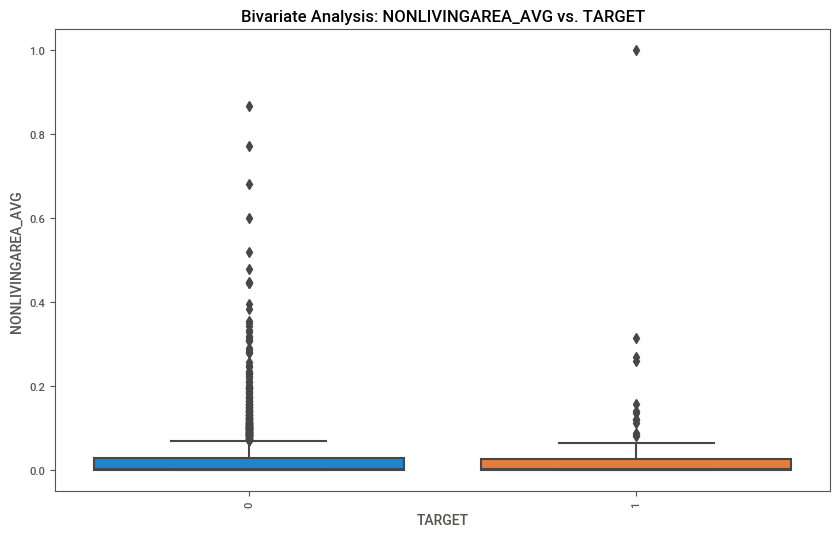

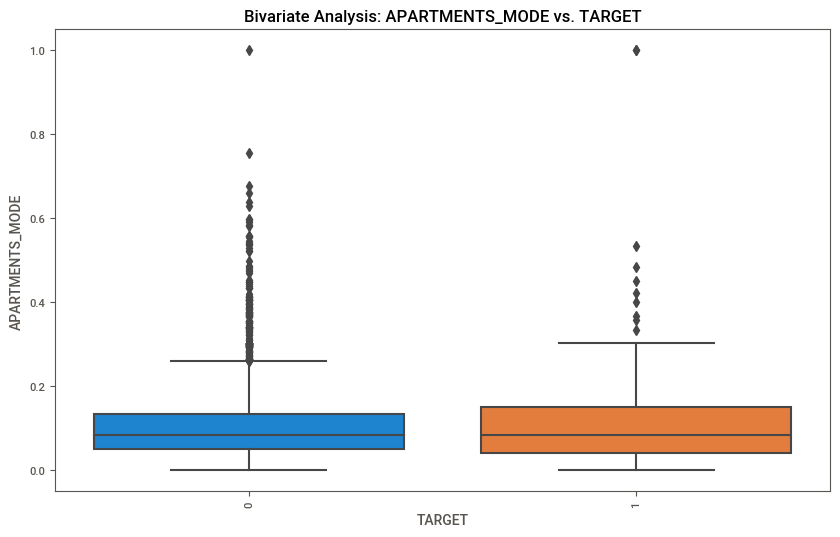

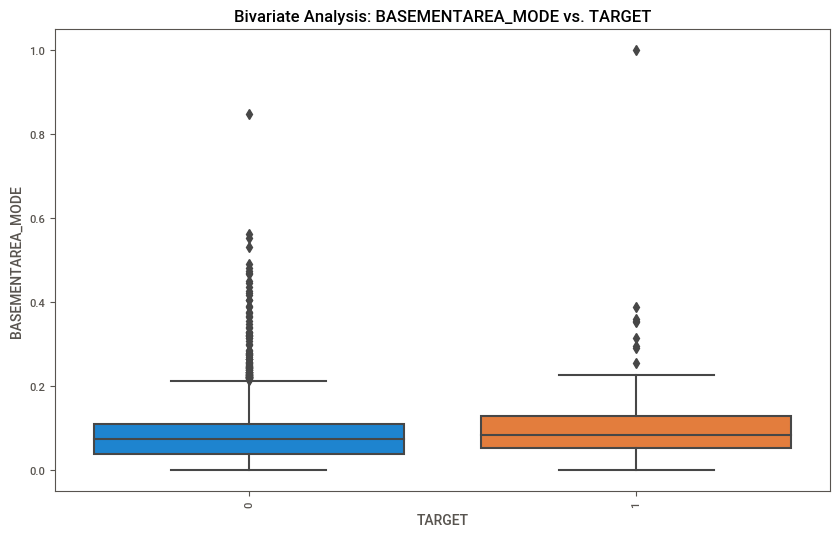

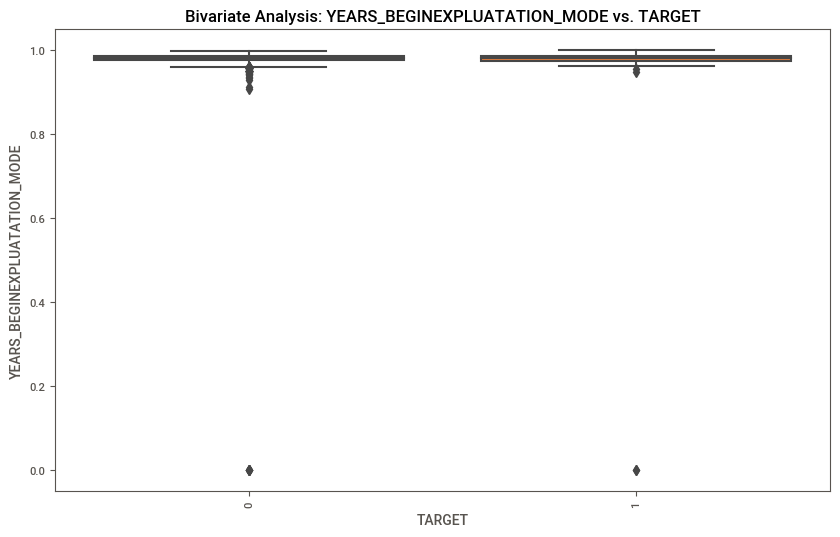

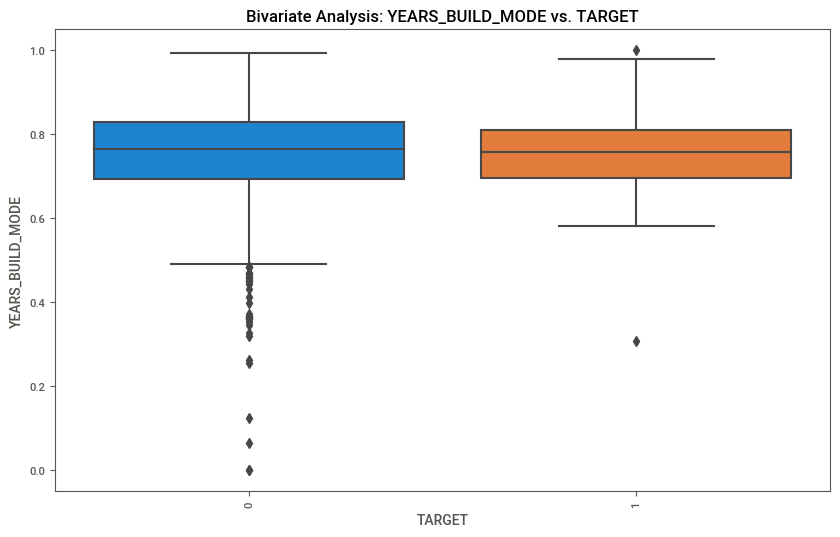

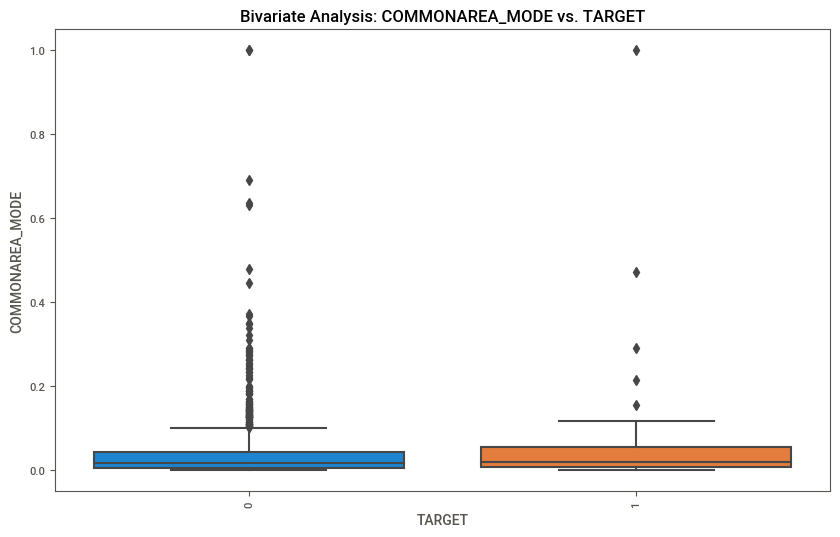

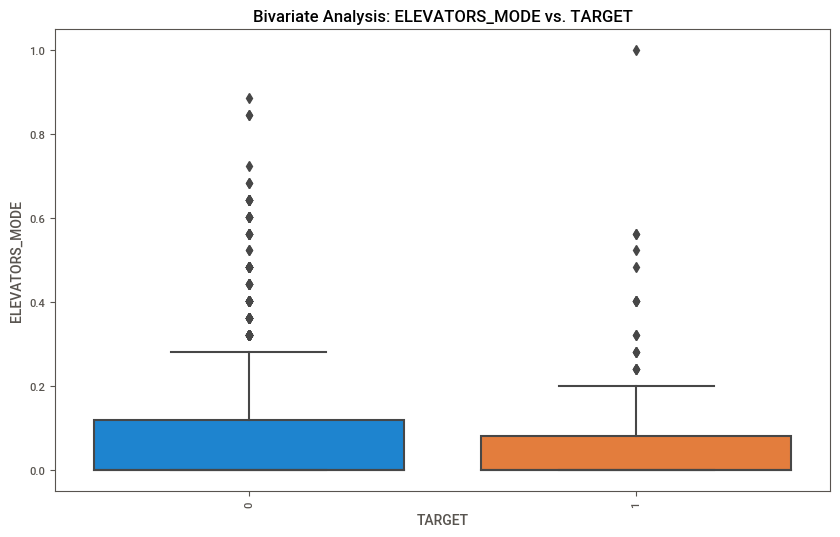

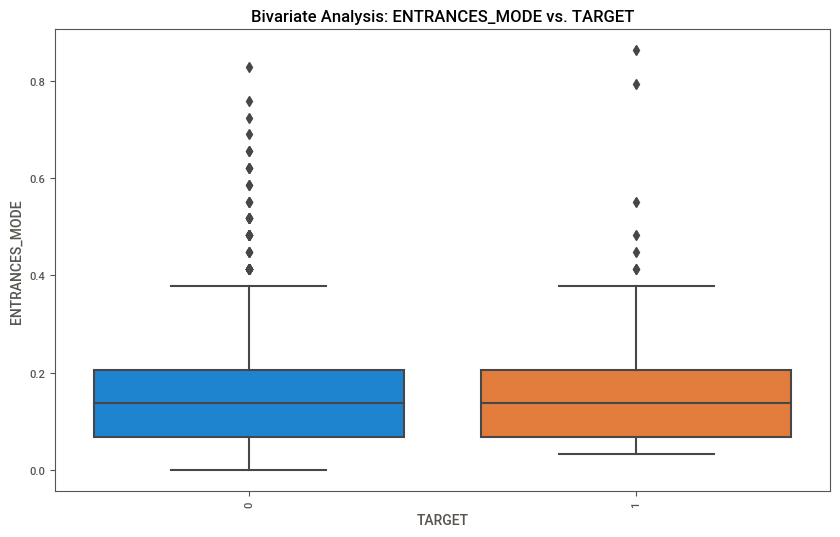

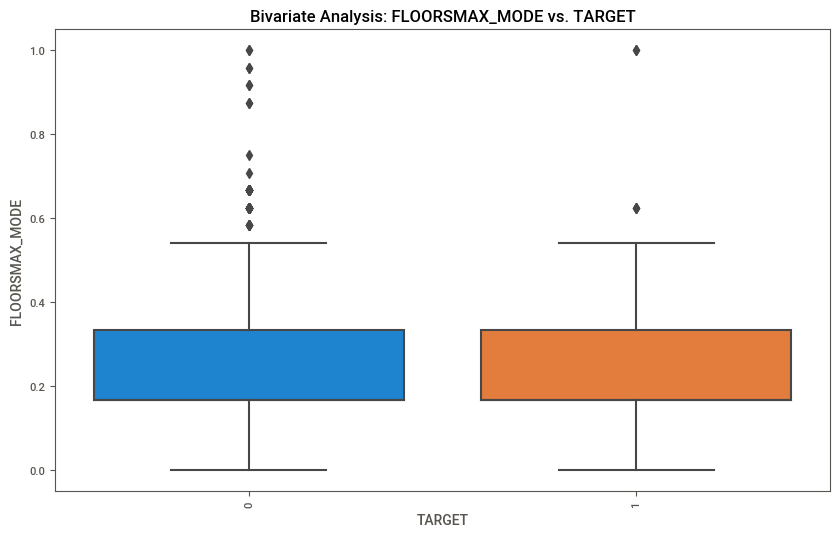

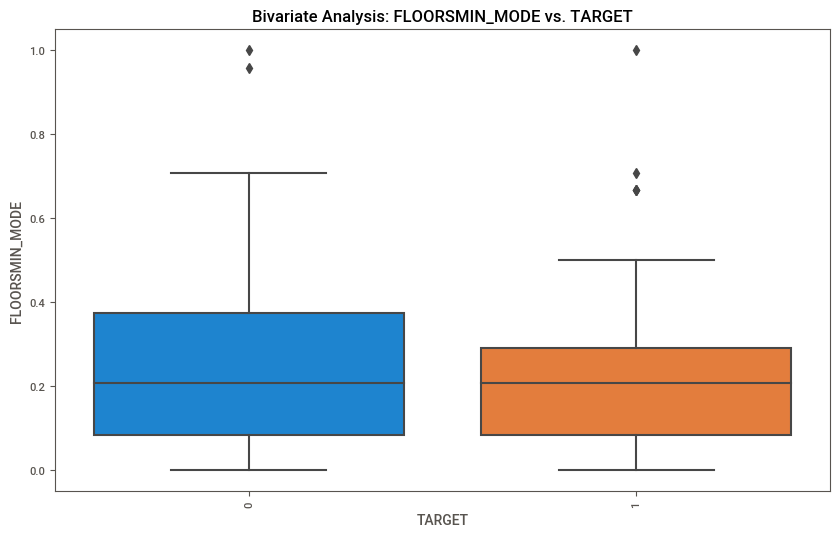

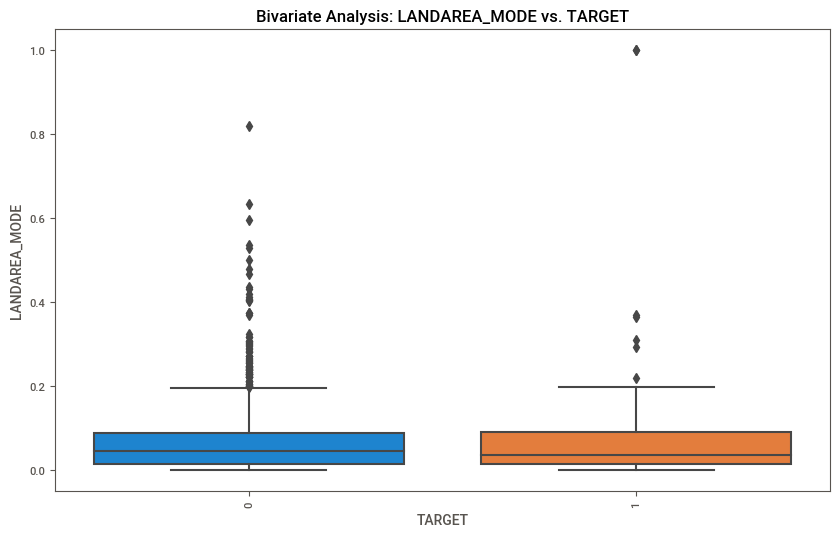

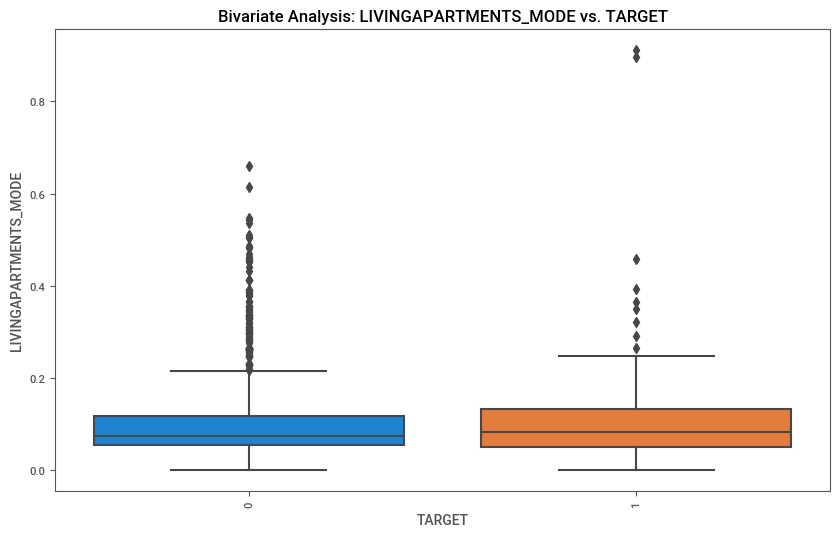

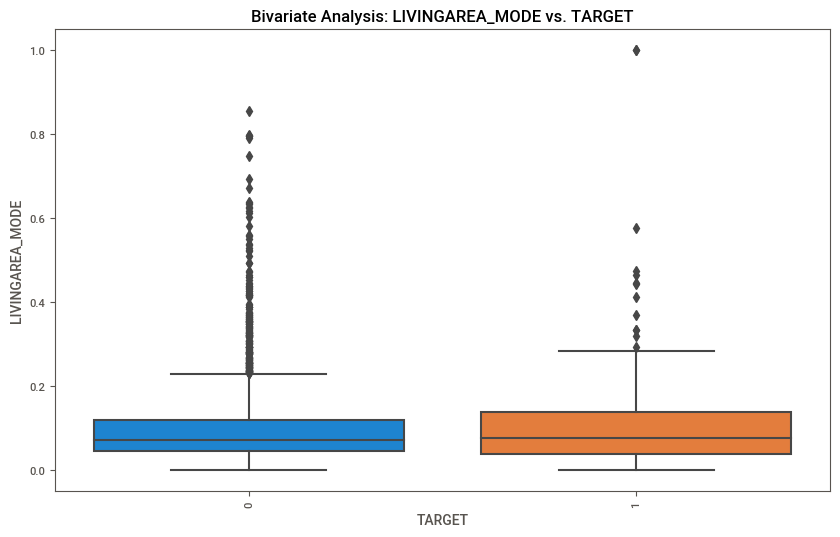

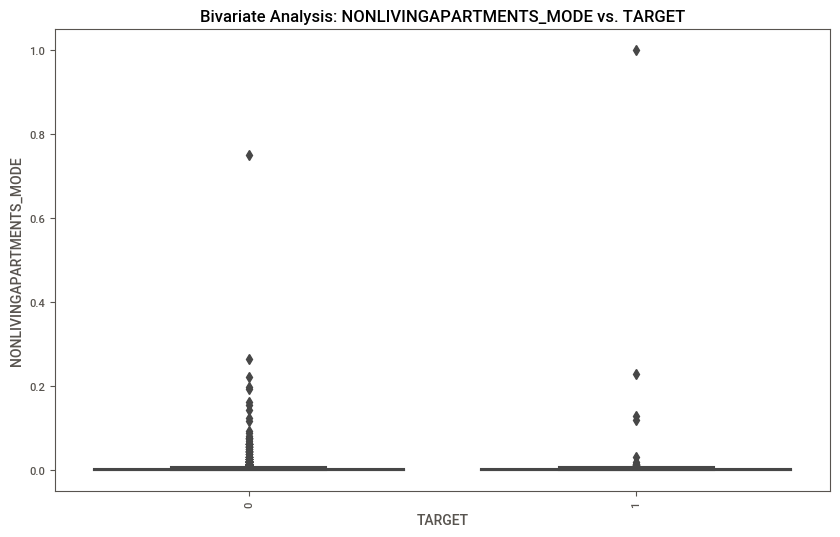

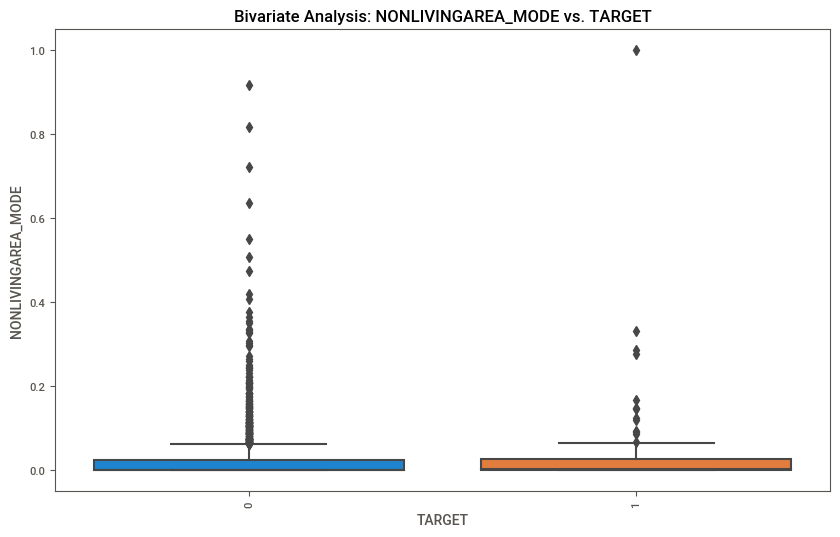

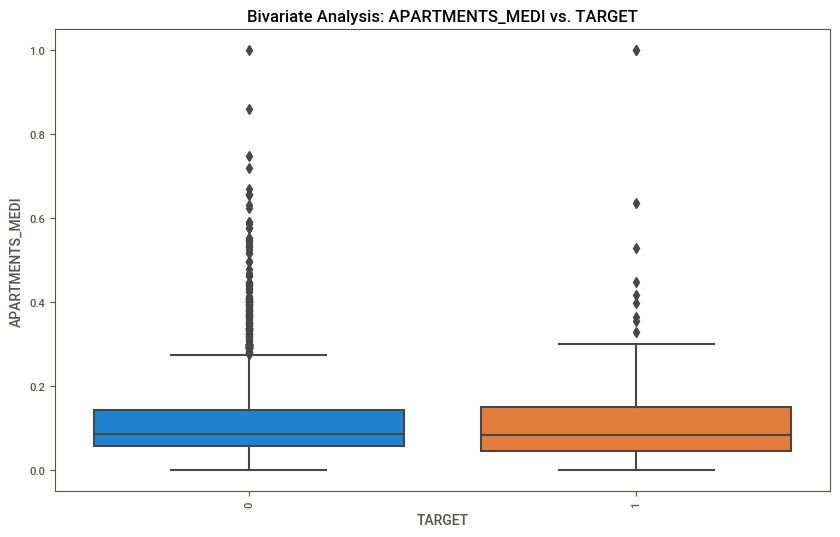

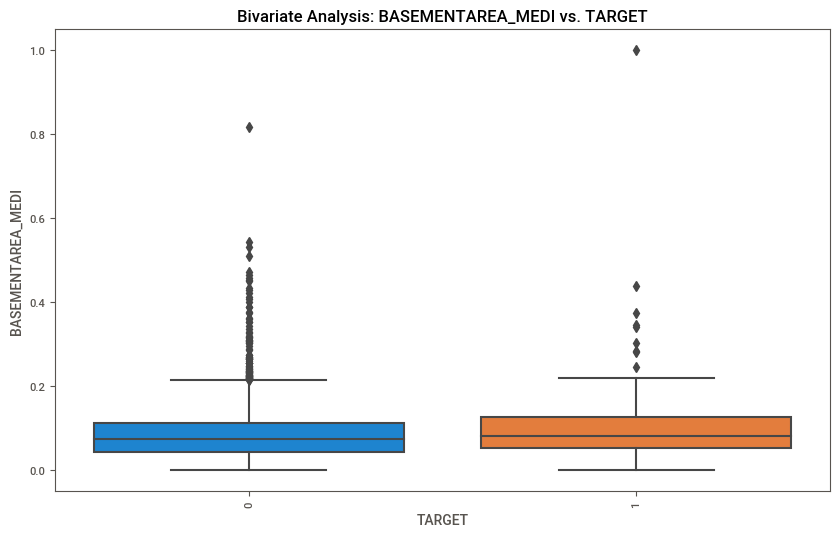

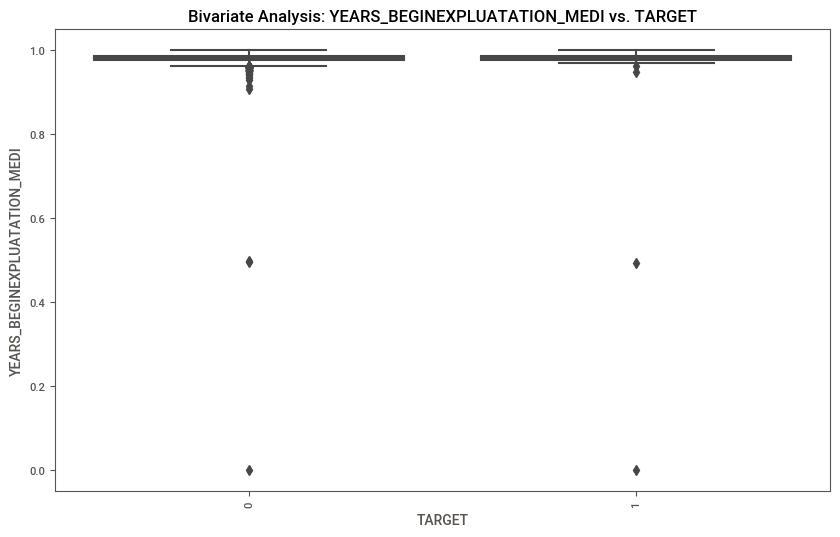

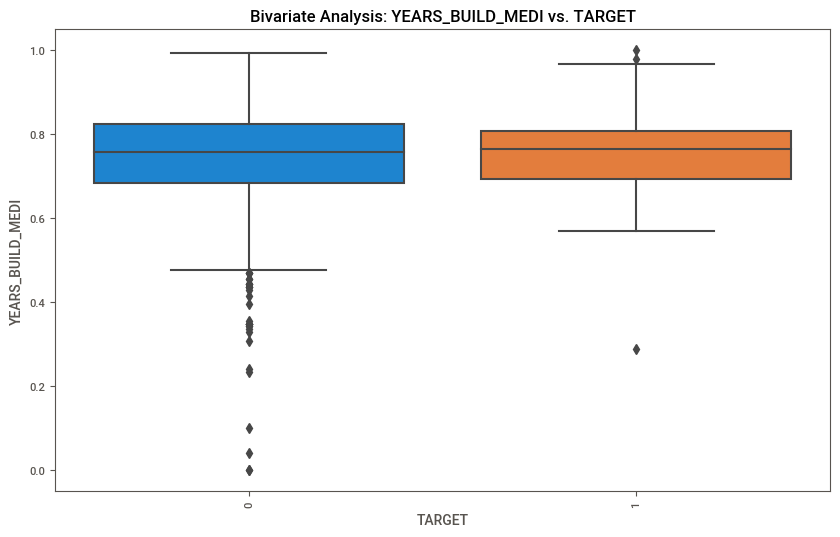

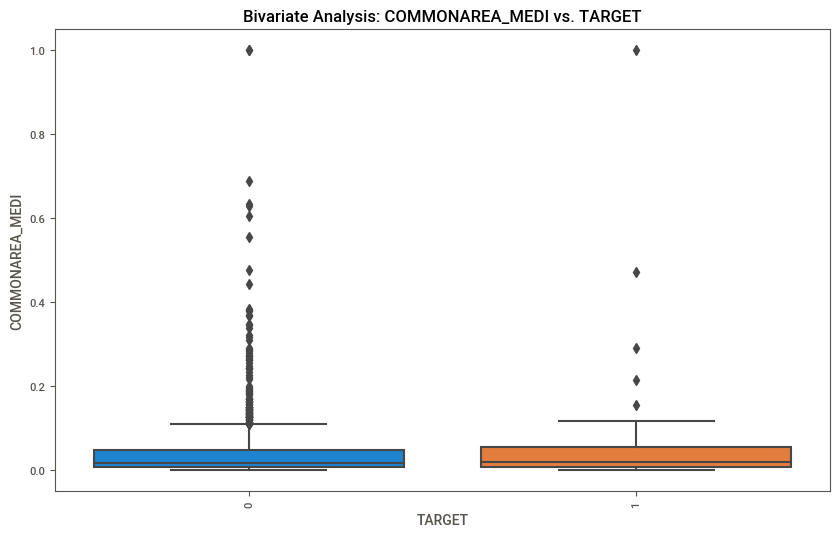

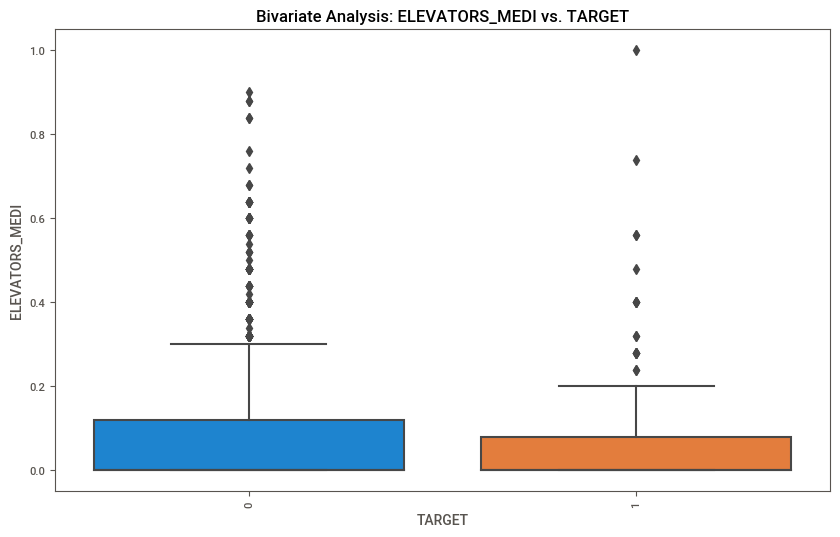

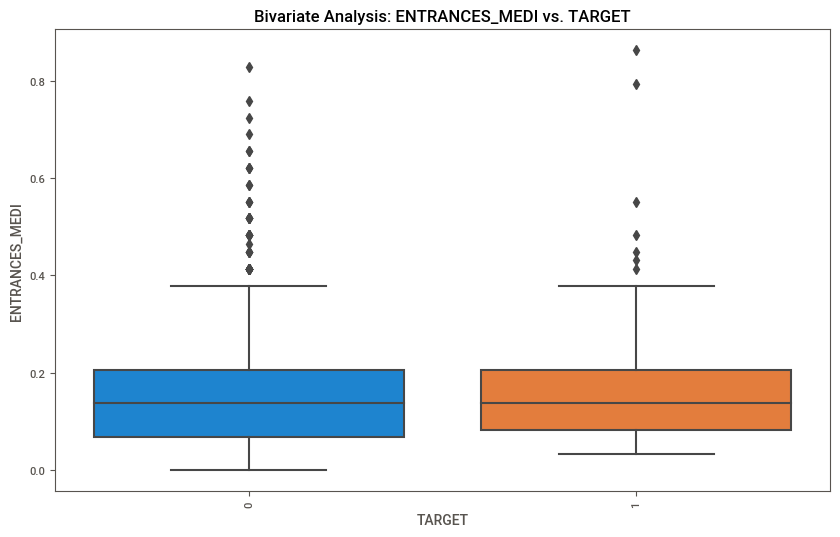

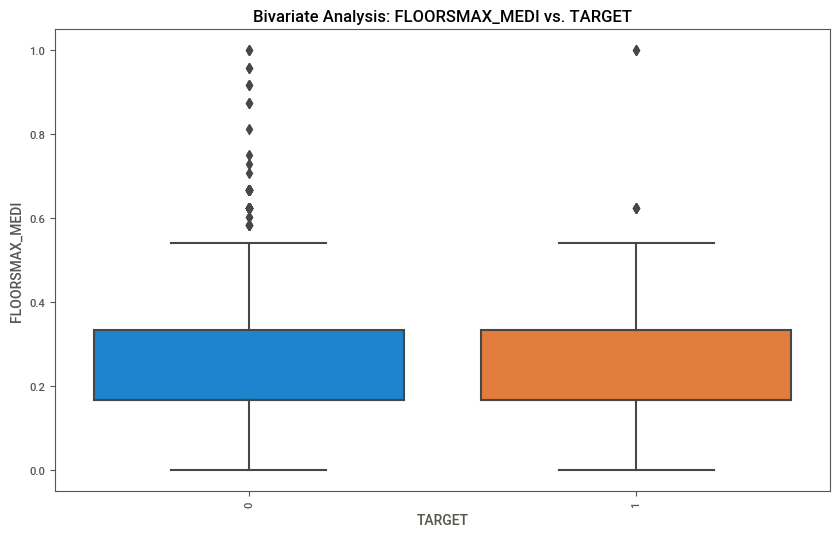

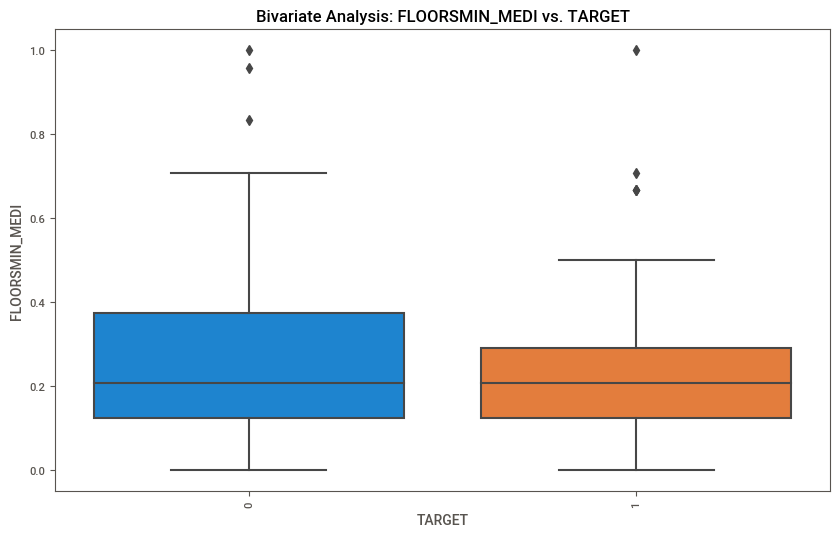

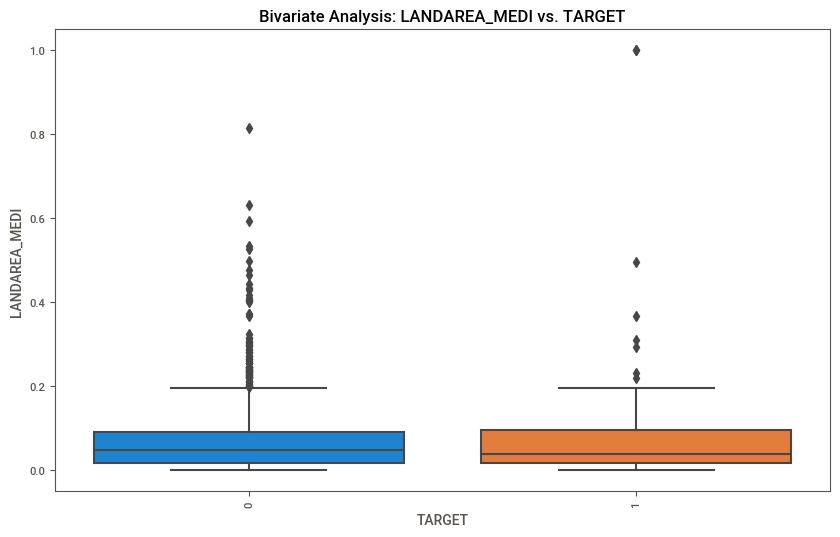

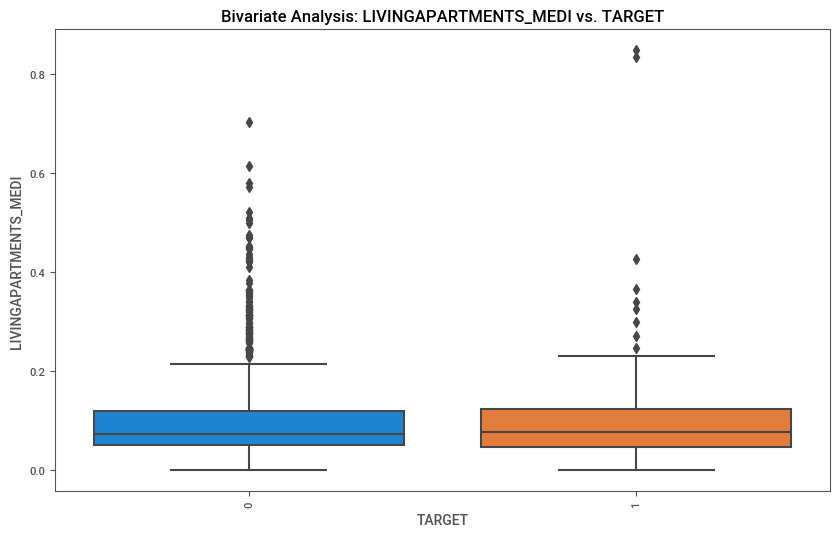

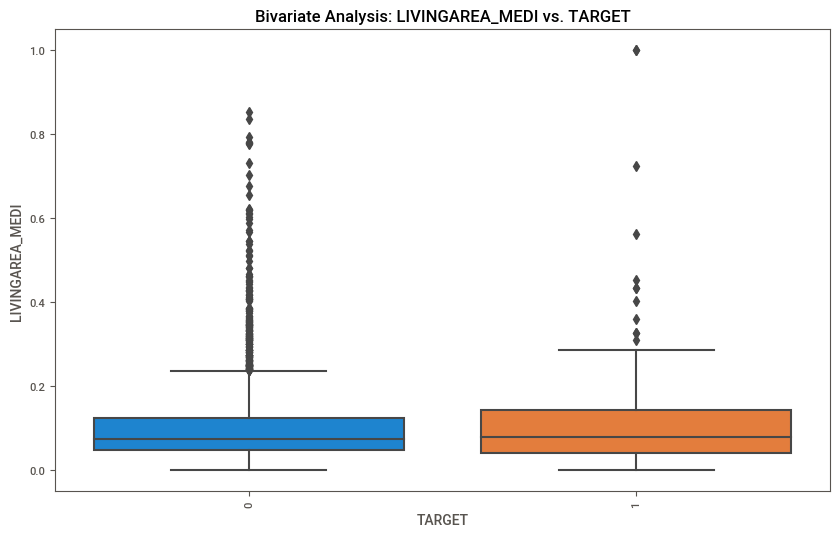

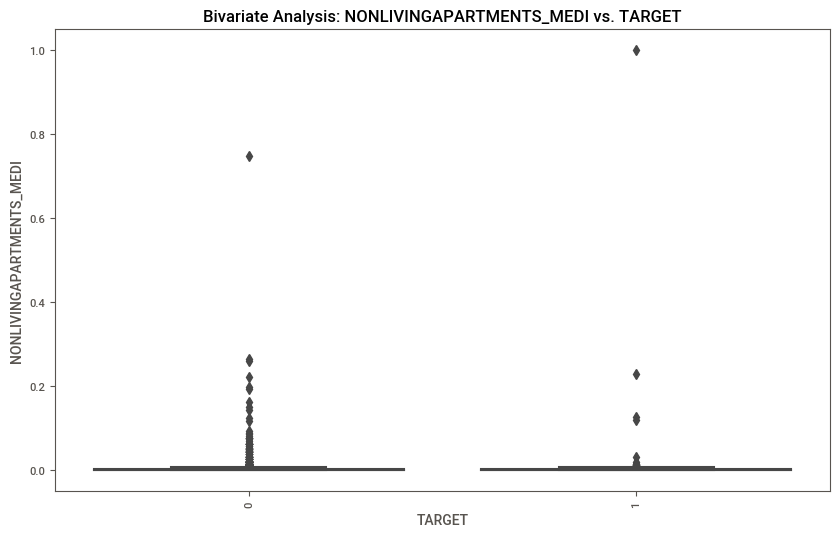

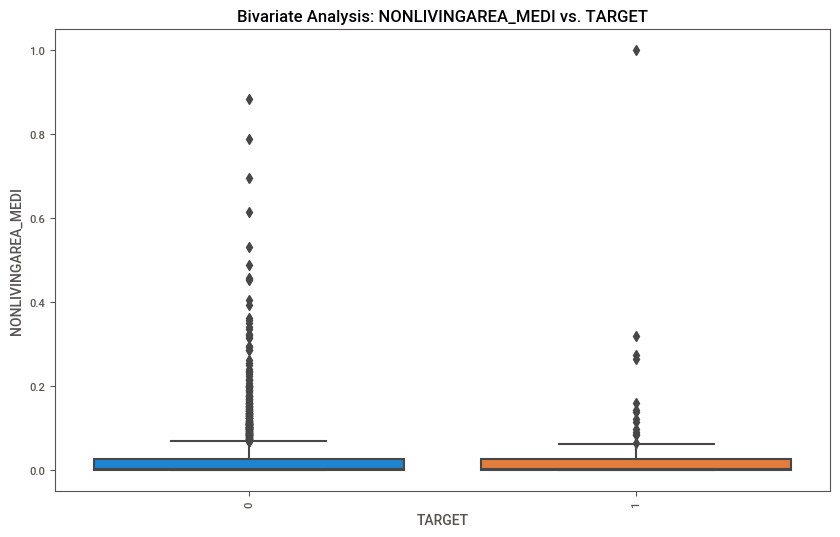

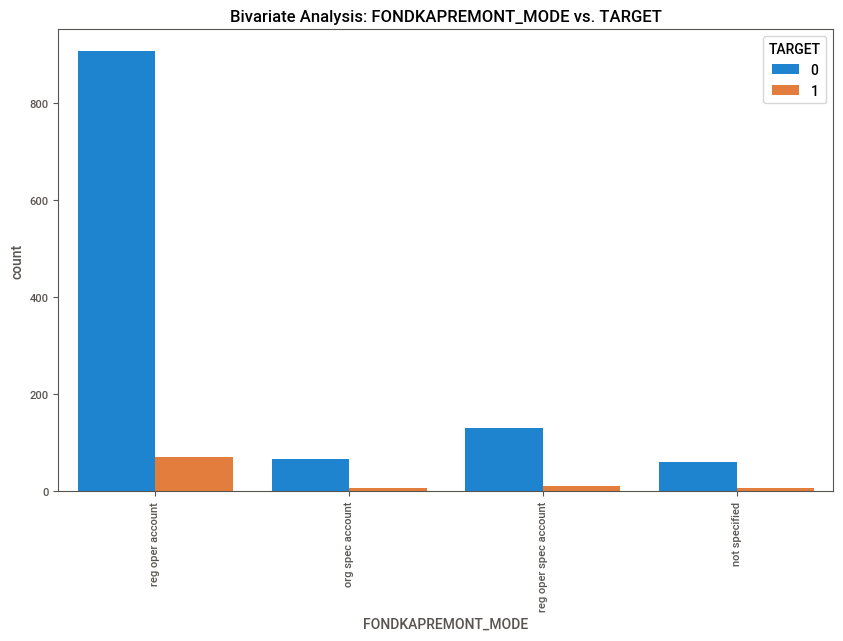

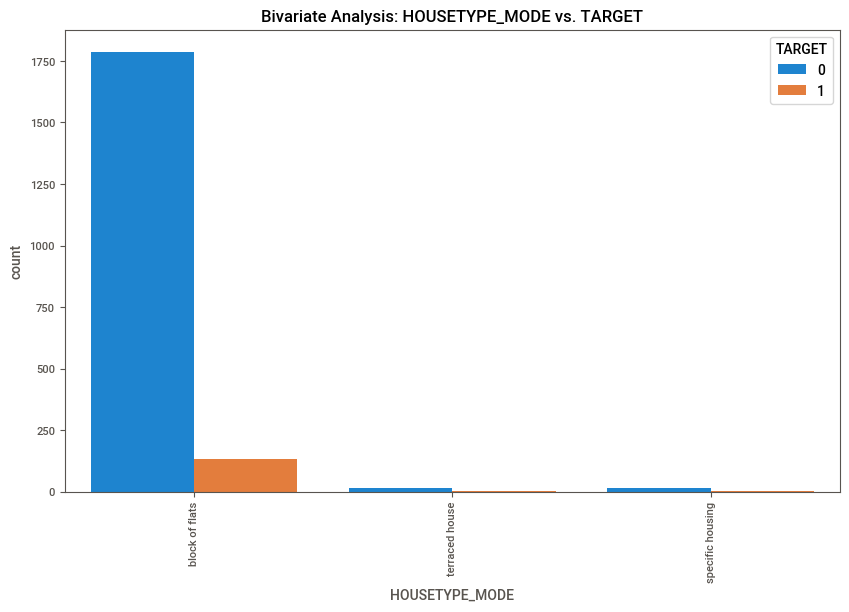

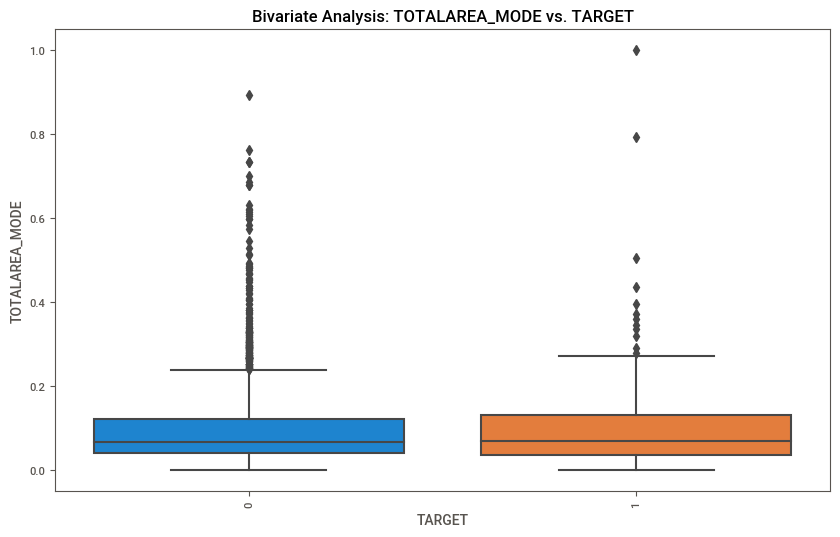

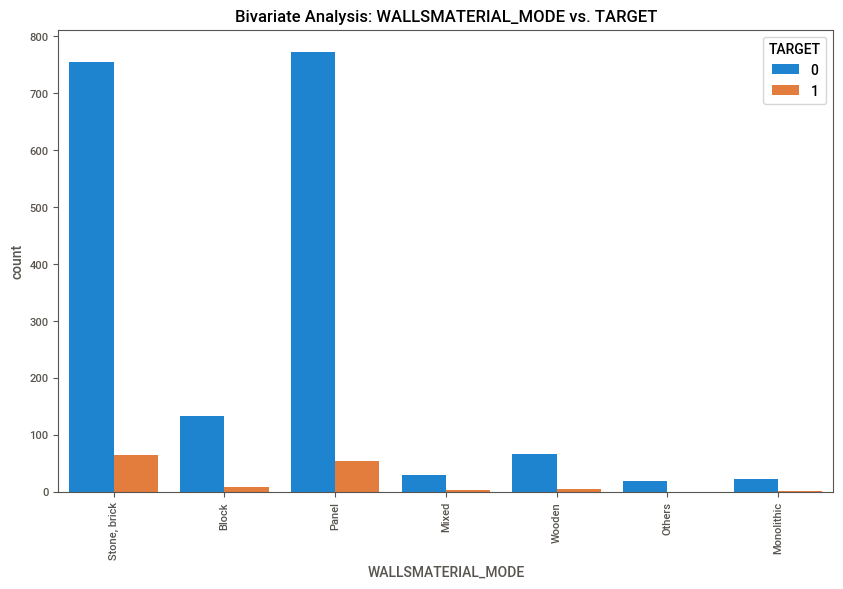

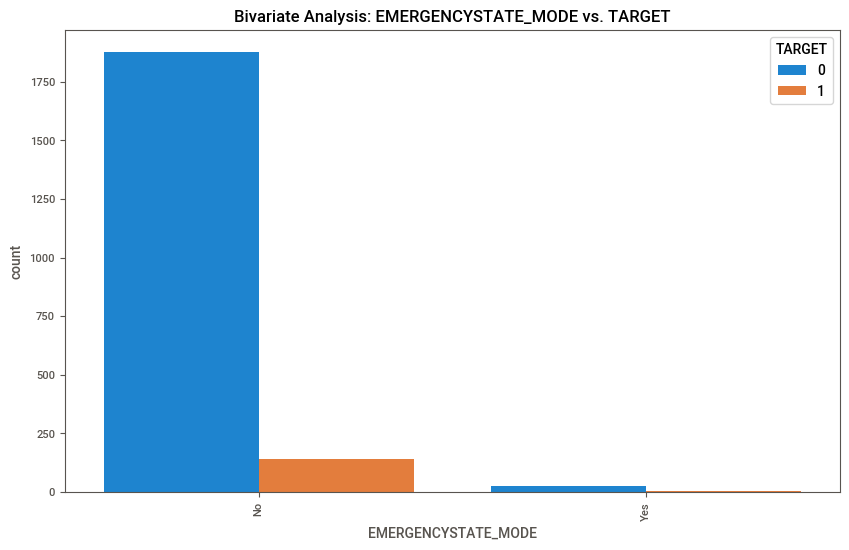

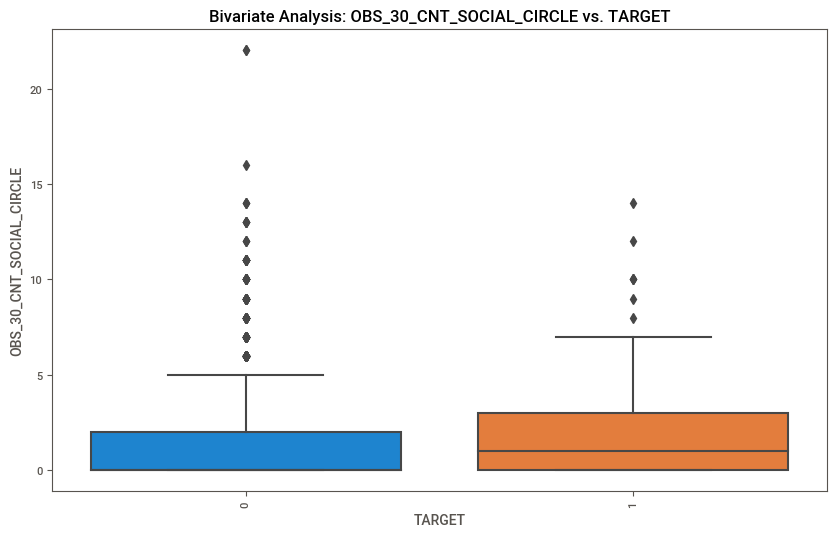

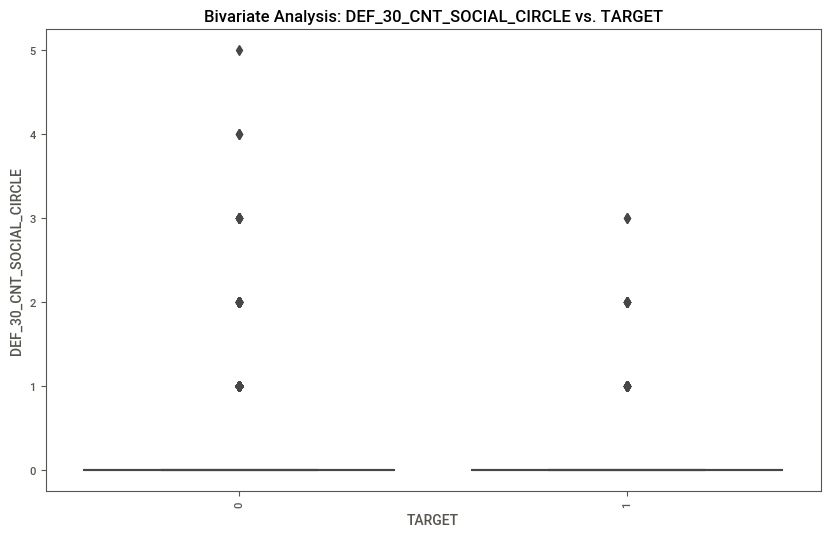

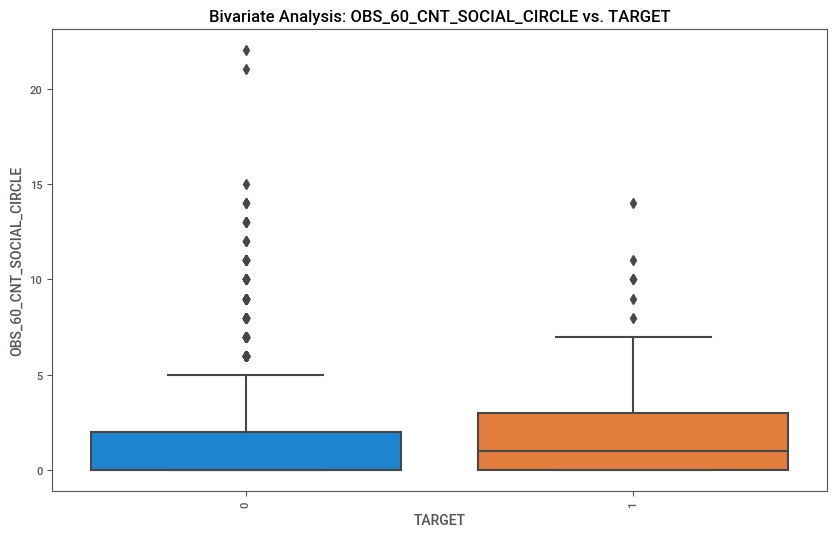

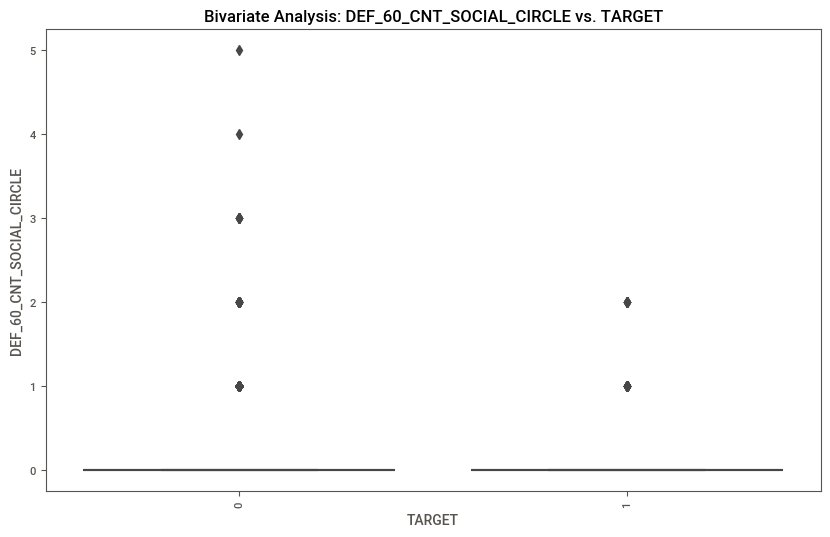

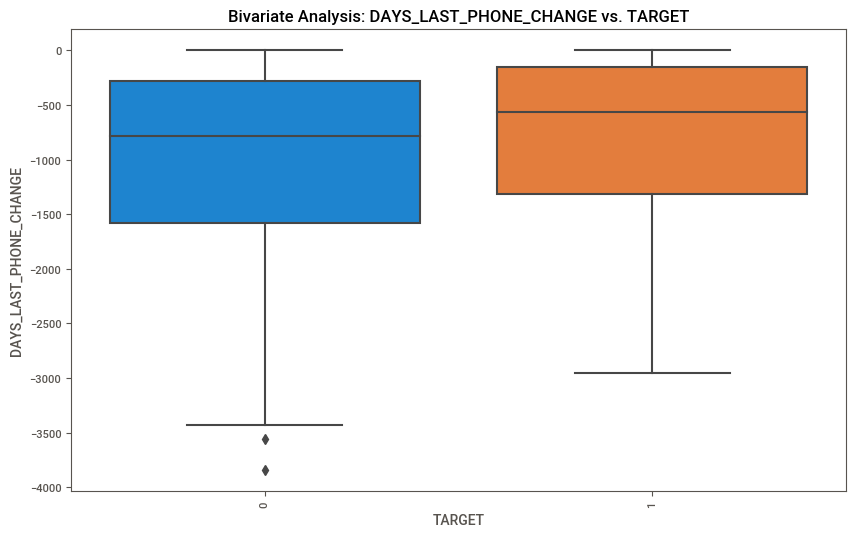

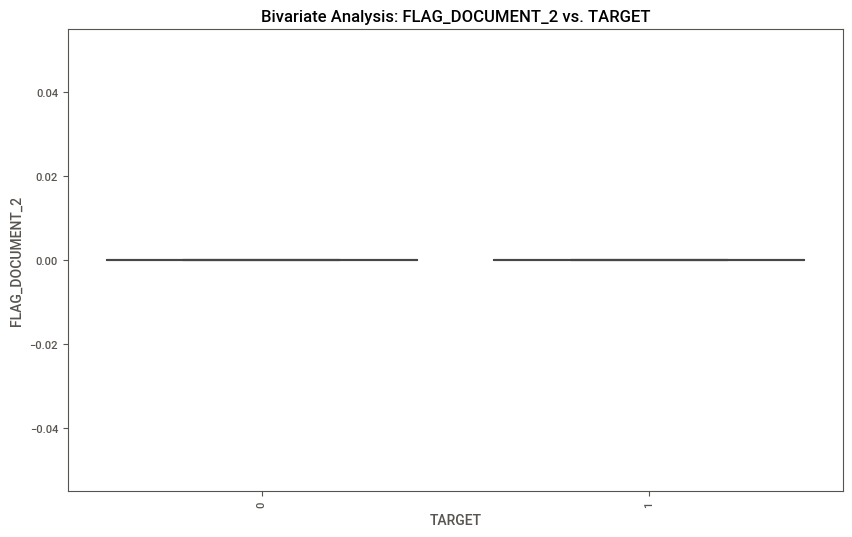

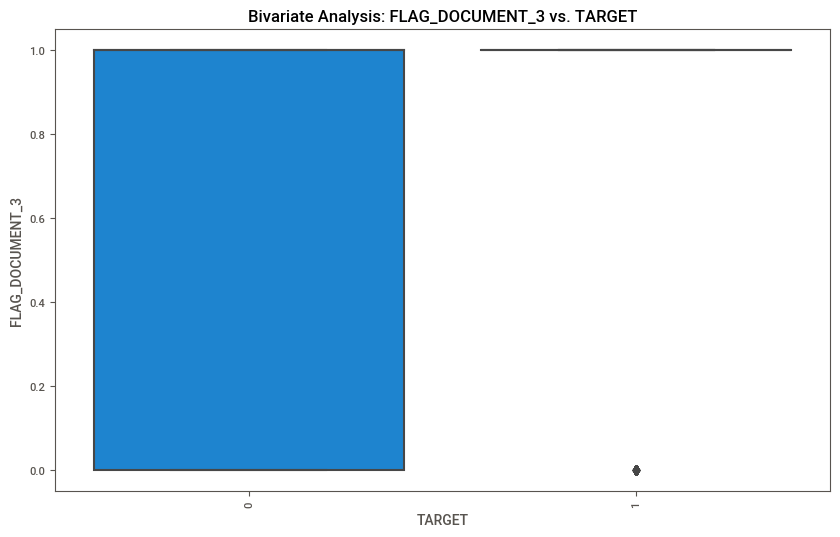

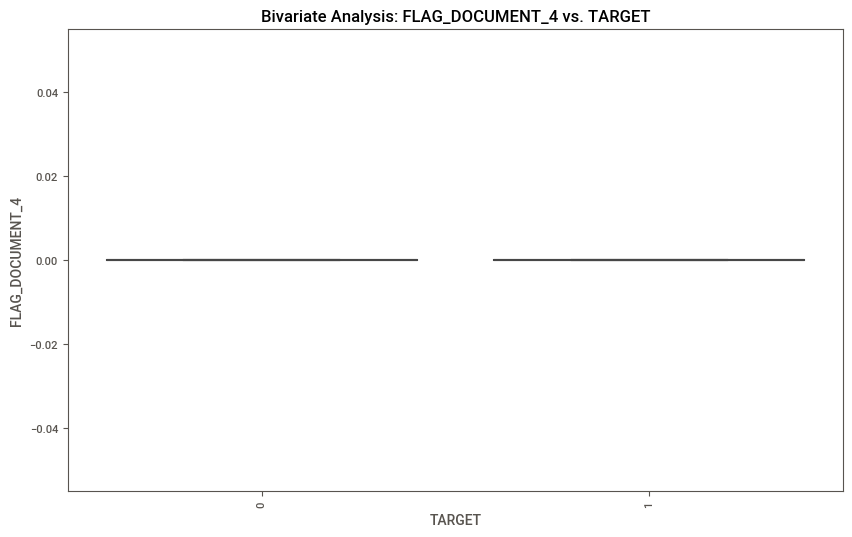

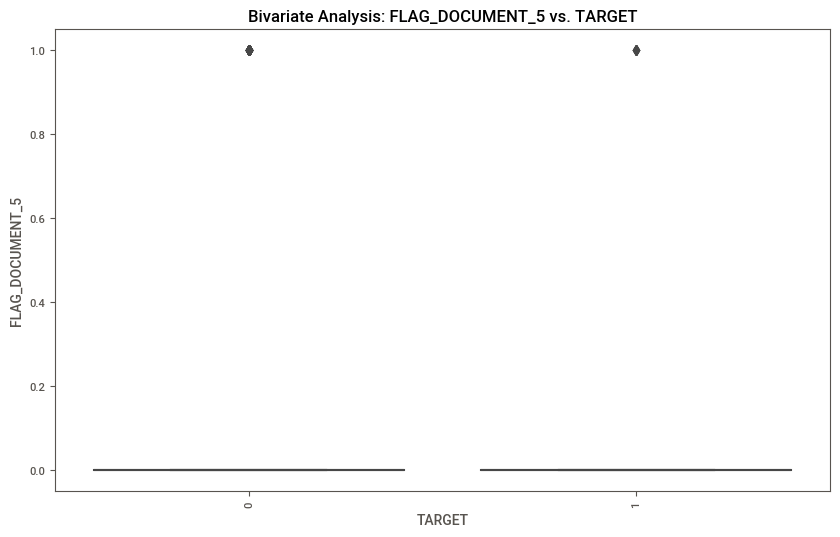

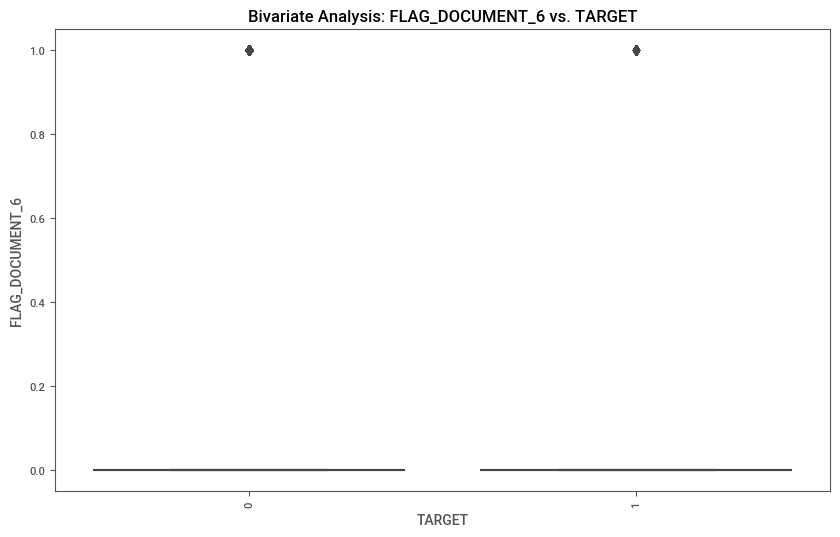

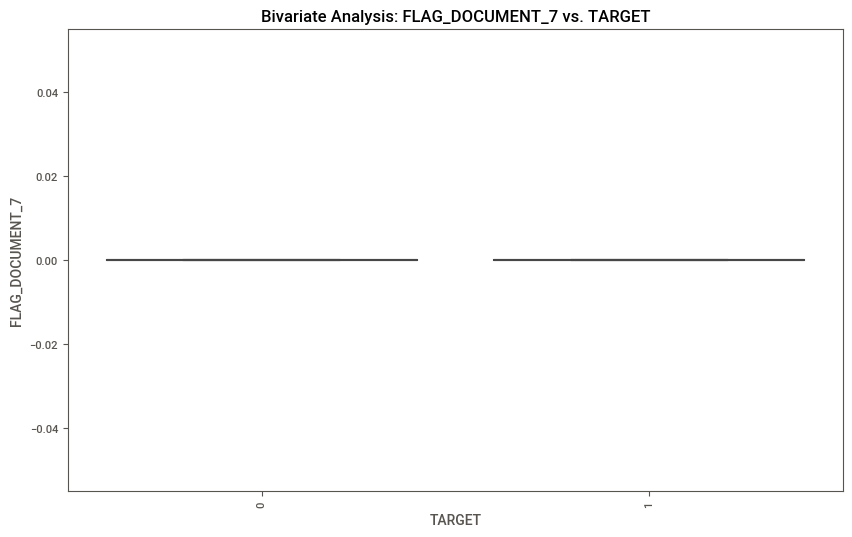

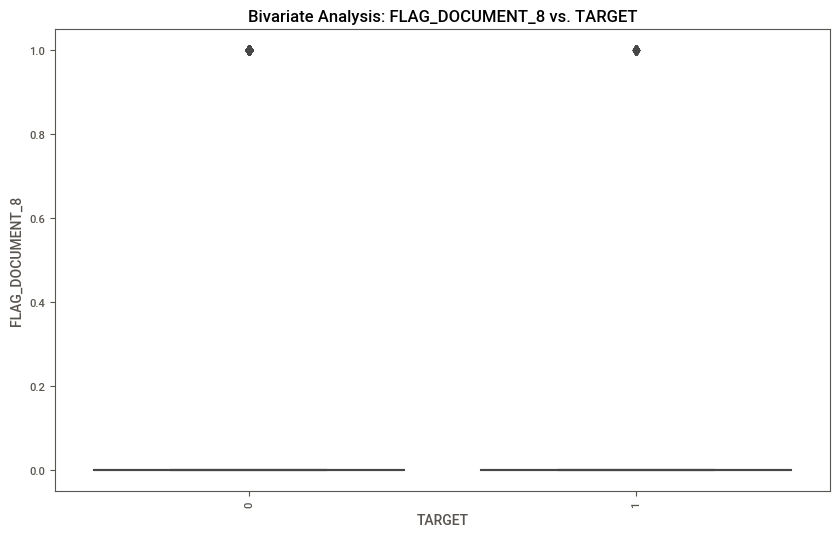

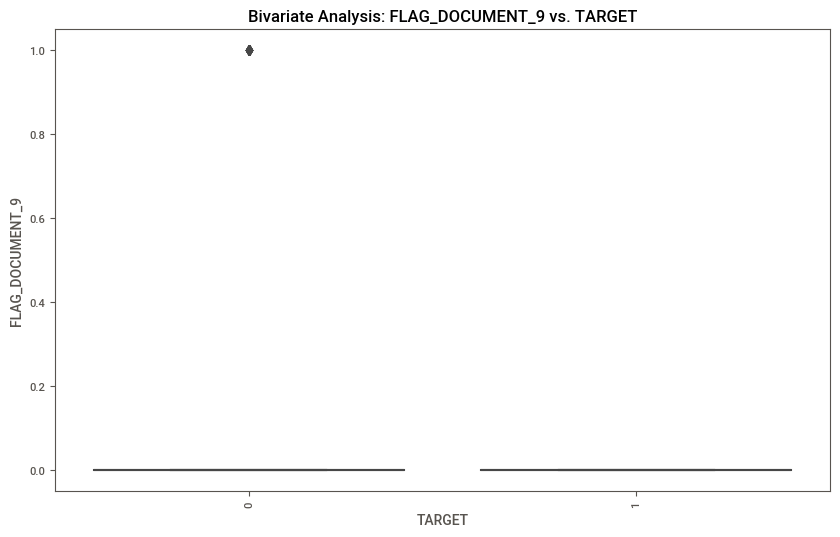

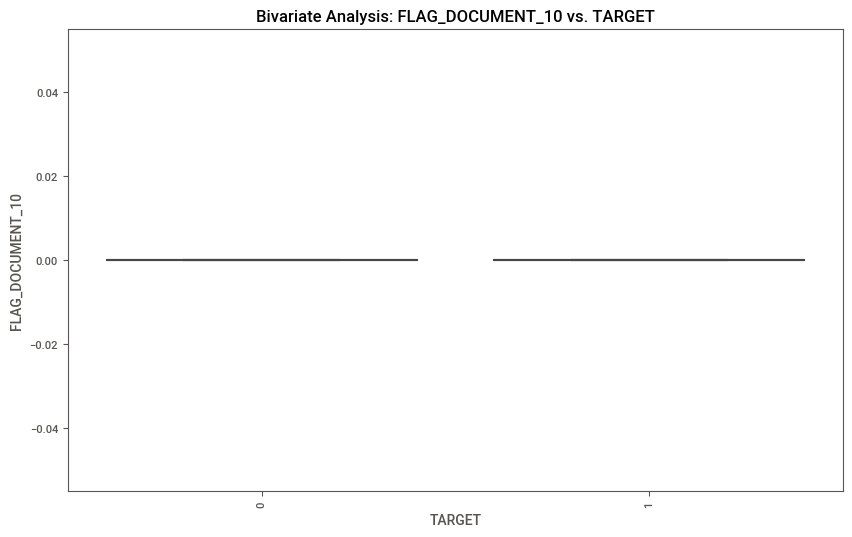

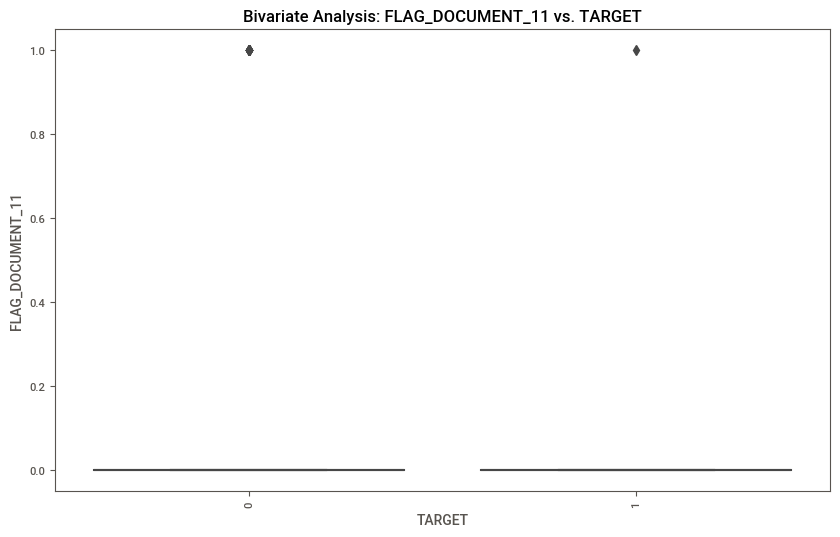

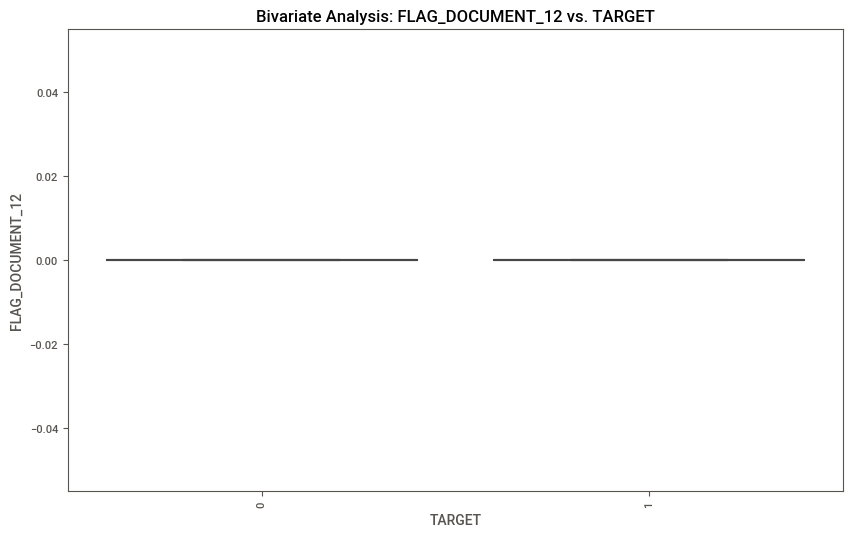

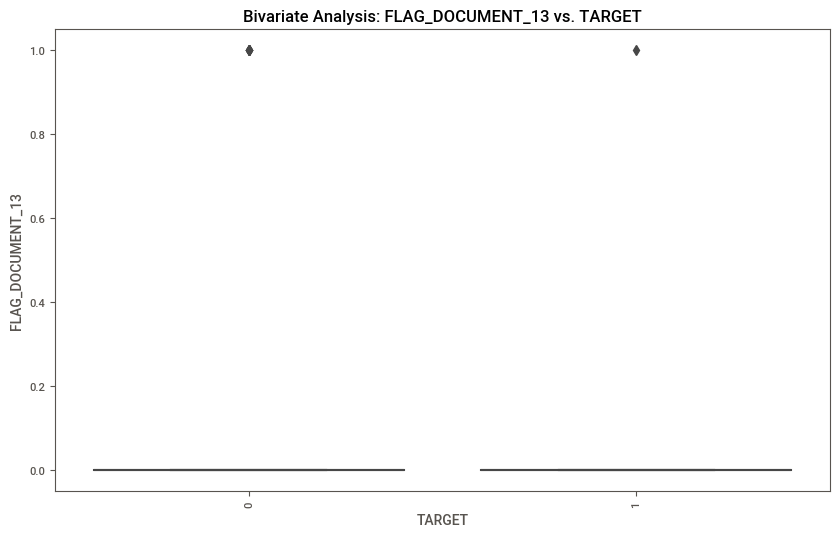

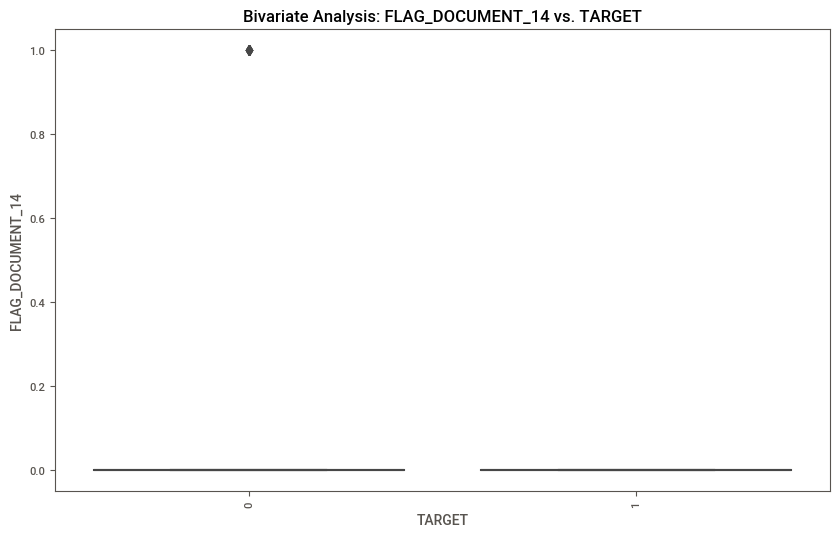

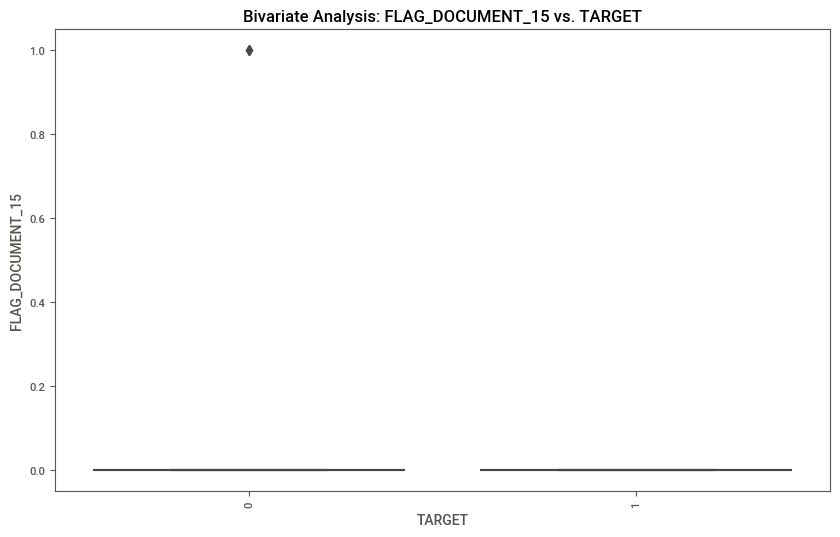

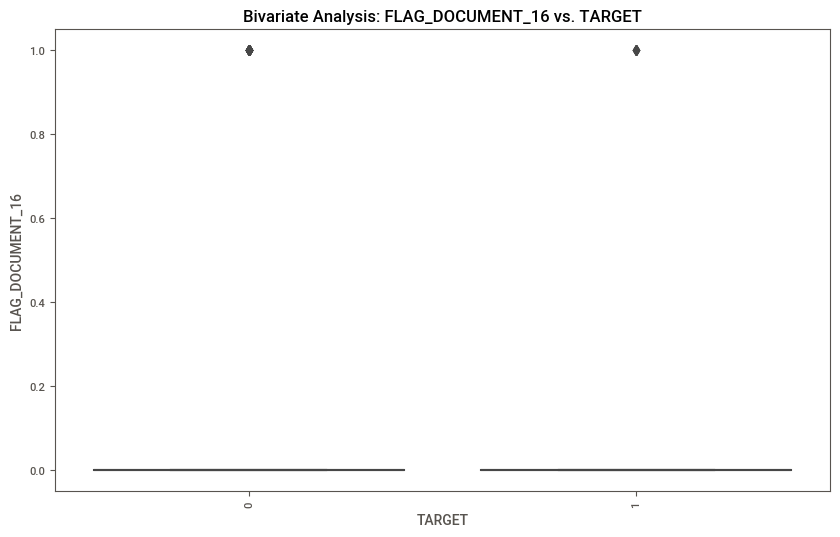

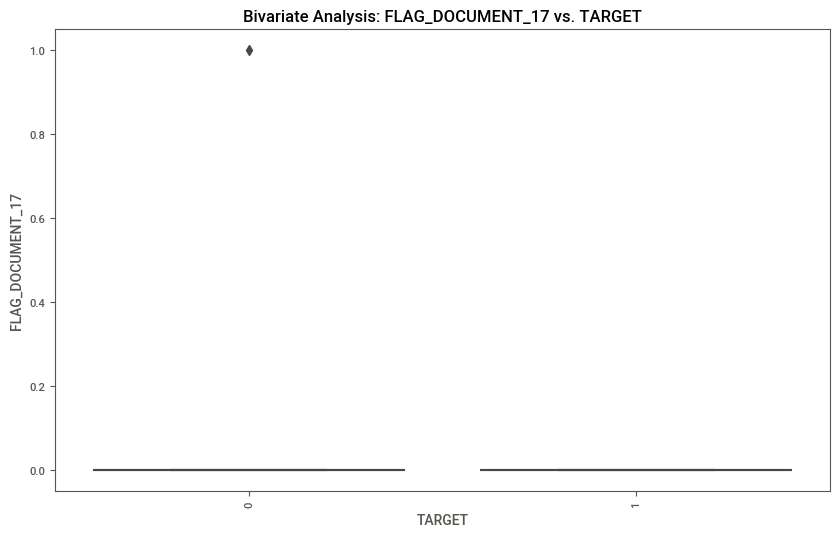

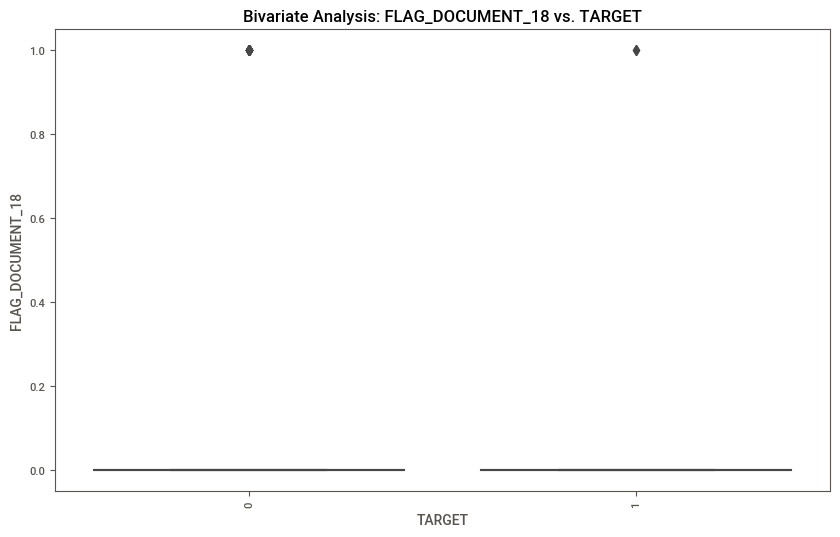

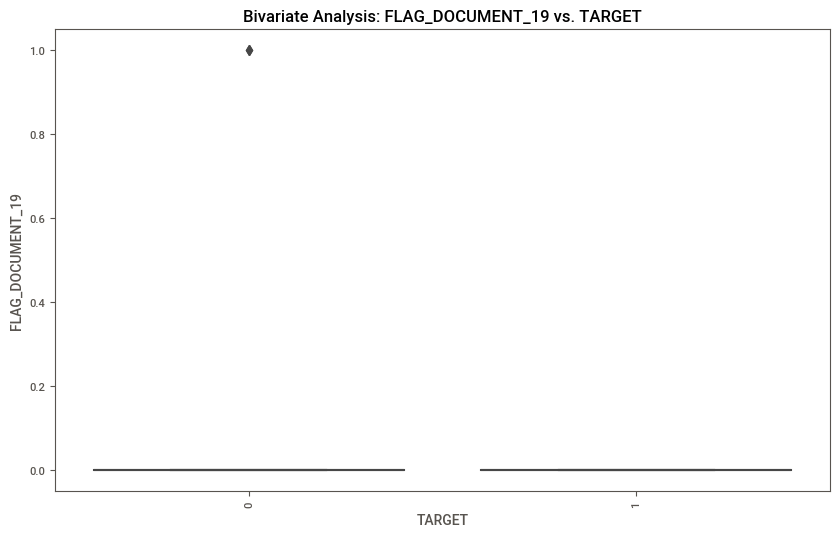

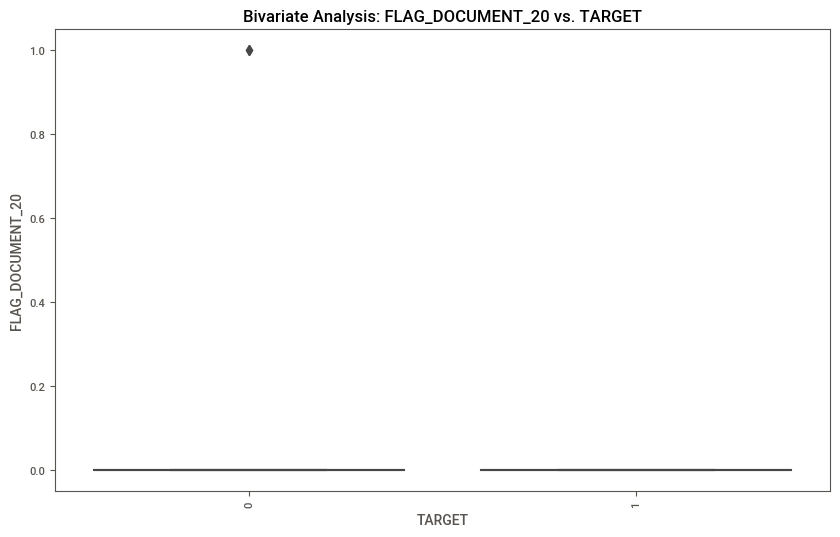

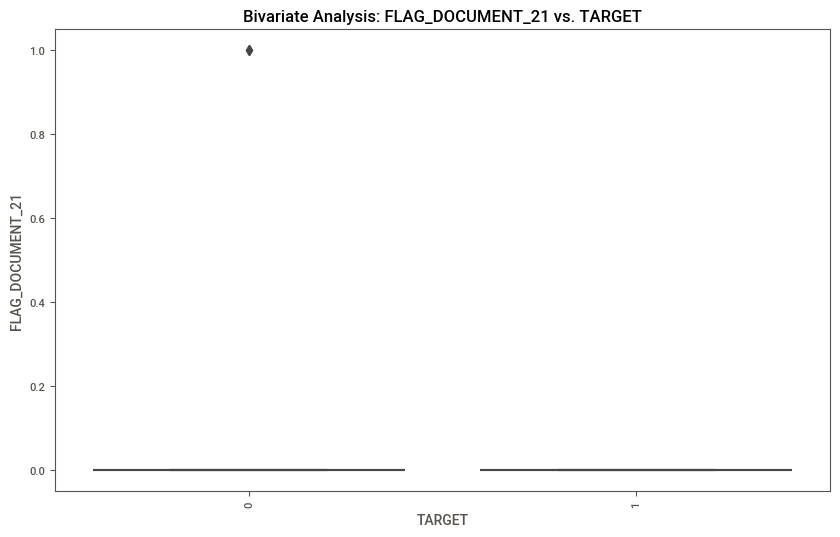

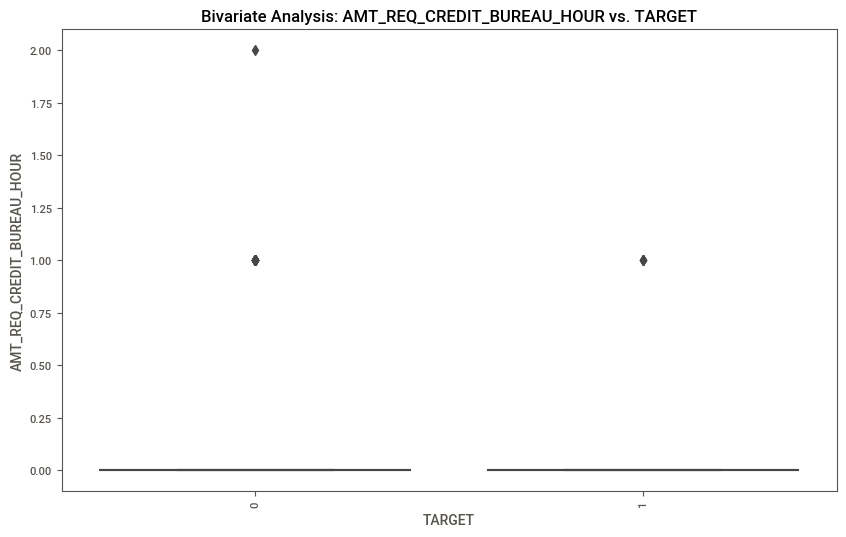

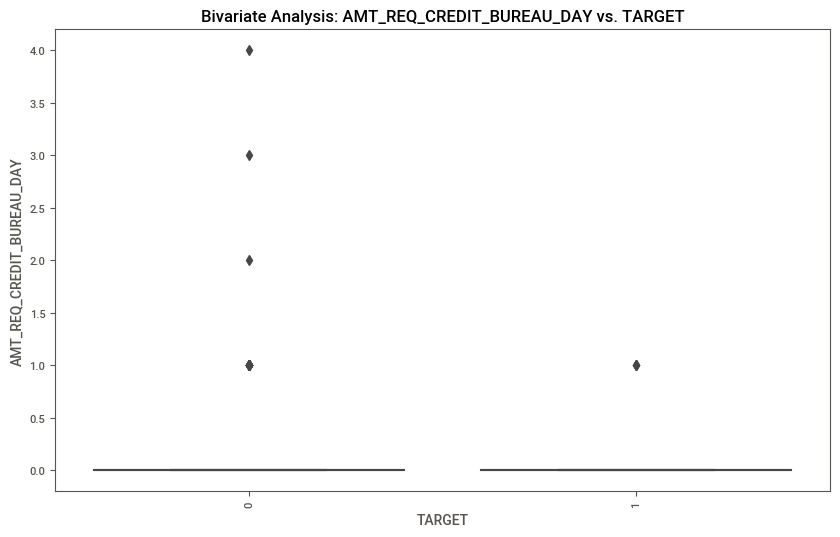

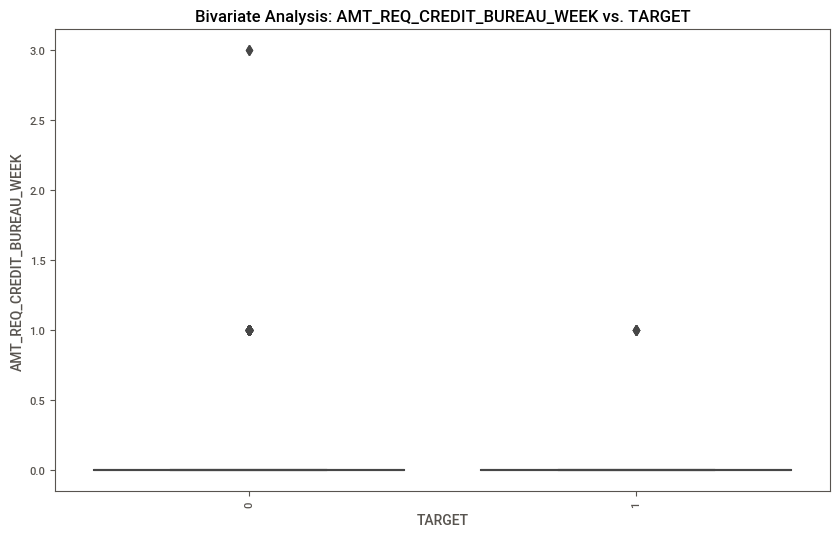

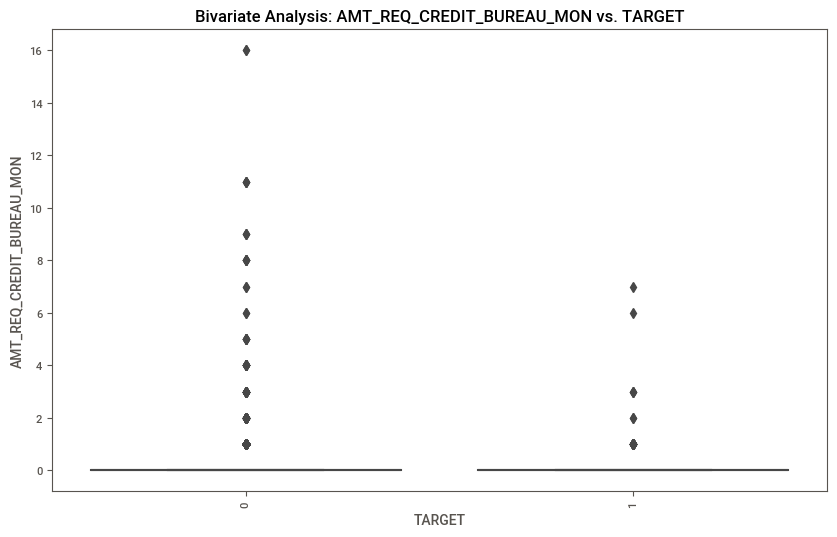

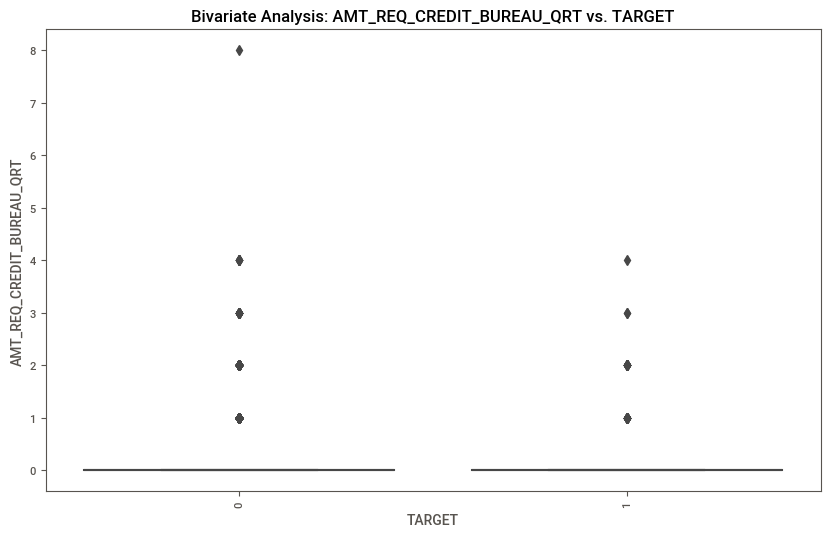

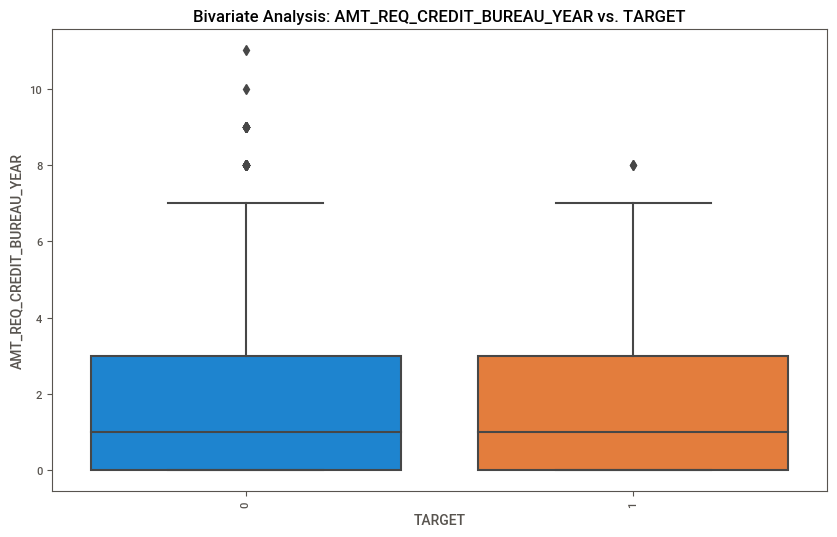

In [ ]:
bivariate_analysis(data, 'TARGET')

### Insights of bivariate

1. **NAME_CONTRACT_TYPE:** The majority of loan approvals are for cash loans.

2. **CODE_GENDER:** A significant number of loan approvals are for females, with around 10-15k female applicants.

3. **FLAG_OWN_REALTY:** Individuals who do not own real estate ("N") are more likely to default on loans.

4. **NAME_TYPE_SUITE:** The majority of loan defaulters are unaccompanied applicants.

5. **NAME_INCOME_TYPE:** Among the working population, there is a higher likelihood of loan default.

6. **NAME_EDUCATION_TYPE:** Individuals with secondary or secondary special education are more likely to default on loans.

7. **NAME_FAMILY_STATUS:** Married individuals have a higher likelihood of loan default.

8. **NAME_HOUSING_TYPE:** Most loan defaulters live in houses or apartments.

9. **OCCUPATION_TYPE:** Laborers are the occupation type with the highest likelihood of loan default.

10. **ORGANIZATION_TYPE:** Business entity type 3 has the highest number of loan defaulters.


In [ ]:
def plots_bar(feature, df = None, orientation_horizontal = True):

    if df is None:
        df = data
    else:
        df = df

    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    sns.set_color_codes("bright")

    if orientation_horizontal == True:
        plt.figure(figsize=(10,6))
        plt.subplot(121)
        s1 = sns.barplot(y = feature, x="Number of contracts",data=df1)
        plt.subplot(122)
        s2 = sns.barplot(y = feature, x='TARGET', data=cat_perc)
        plt.xlabel('Fraction of loans defaulted', fontsize=12)
        plt.ylabel(feature, fontsize=12)

    else:
        plt.figure(figsize=(10,12))
        plt.subplot(211)
        s1 = sns.barplot(x = feature, y="Number of contracts",data=df1)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.subplot(212)
        s2 = sns.barplot(x = feature, y='TARGET', data=cat_perc)
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
        plt.ylabel('Fraction of loans defaulted', fontsize=12)
        plt.xlabel(feature, fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.8)
    plt.show()

<Figure size 2000x2500 with 0 Axes>

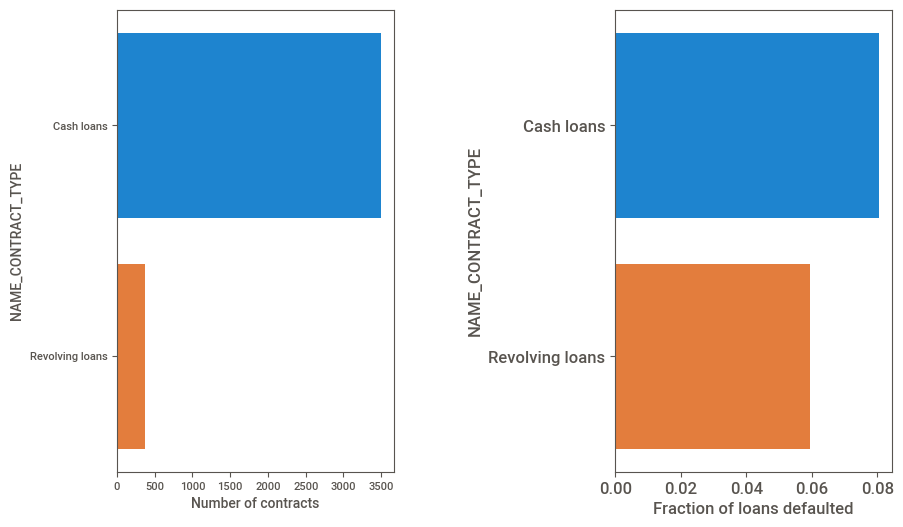

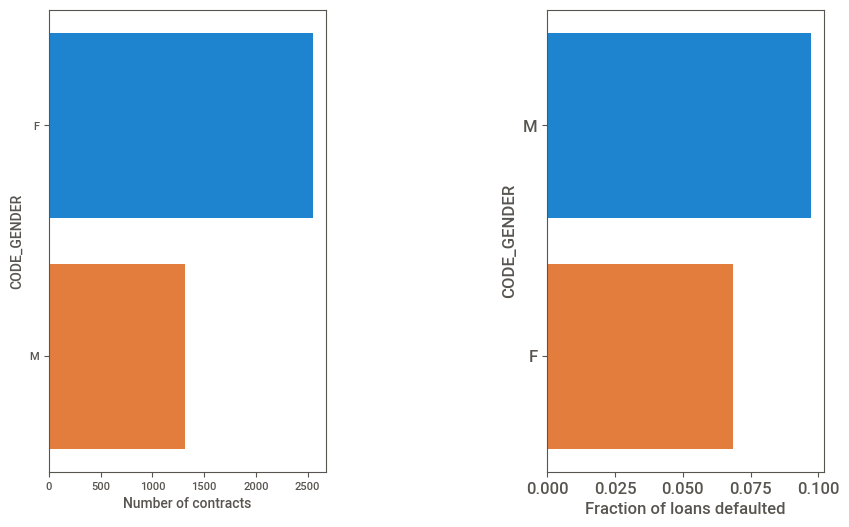

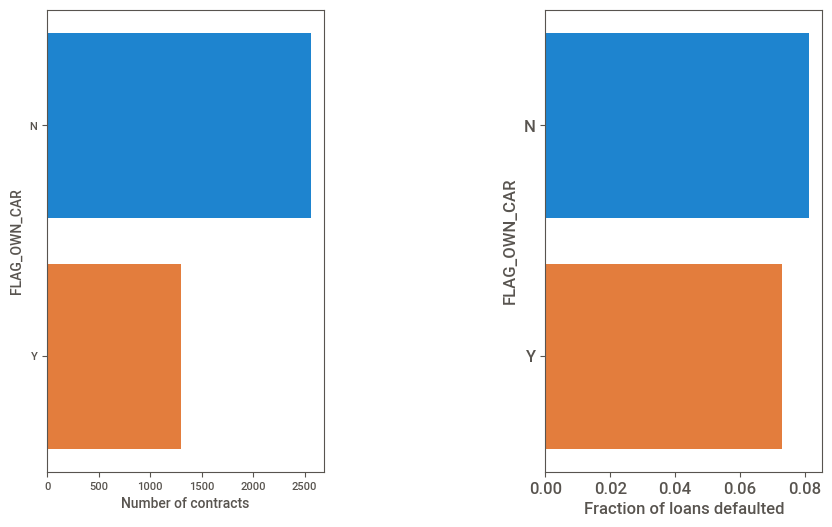

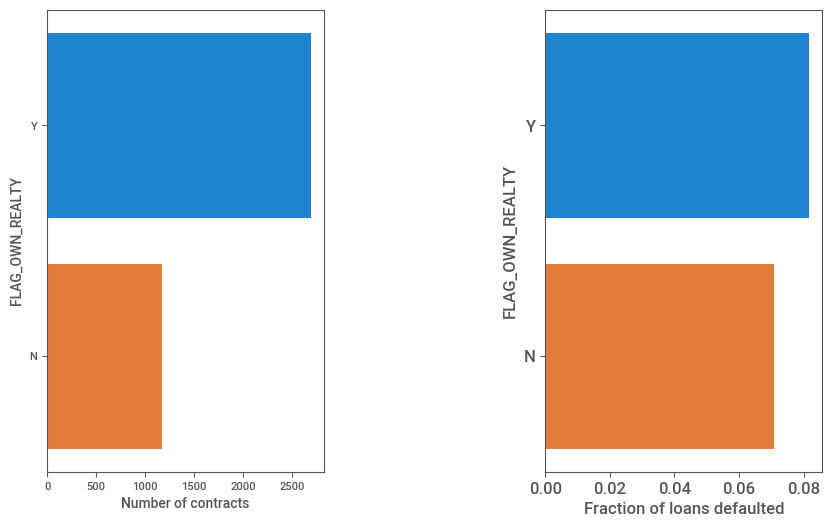

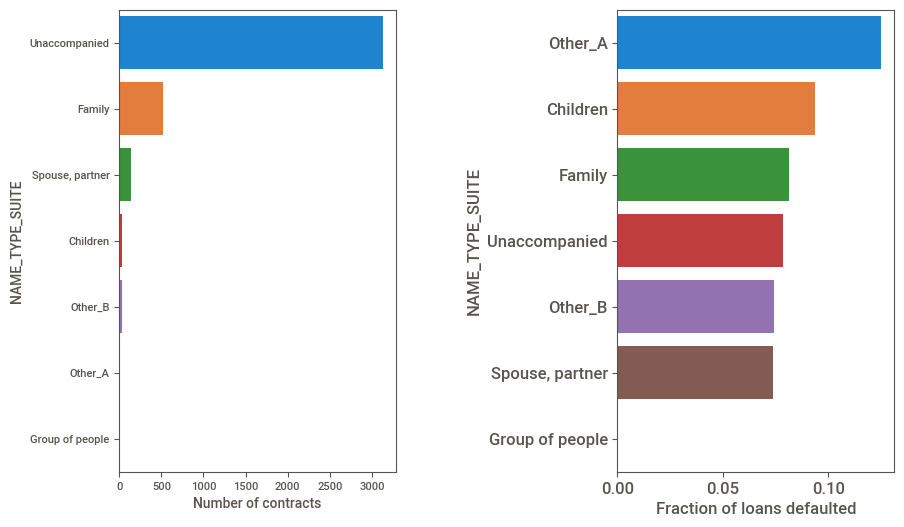

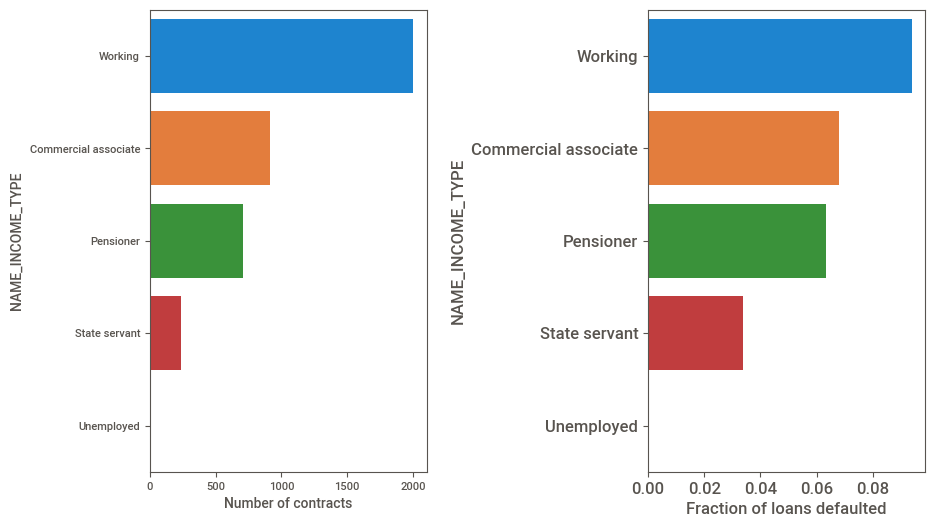

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
x_column=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE','NAME_INCOME_TYPE']
for column in x_column:
    plots_bar(column)

1. Cash loans have a higher default rate compared to revolving loans.

2. While there are more females than males in the dataset, a higher number of loans were defaulted by males.

3. The majority of individuals do not own a car, and the default rate for both car owners and non-owners is relatively
close, with non-owners having a slightly higher default rate (0.08 for non-car owners and 0.07 for car owners).

4. Among marital statuses, married individuals form the largest group, and both married and single individuals have a
high default rate.

5. Individuals with employment statuses such as "Unemployed" and "Maternity leave" have the highest default rates, while
those with working professions make up the largest group.

6. Most individuals live in their own apartments or houses, but those with rented apartments and those living with their
parents have a higher default rate.

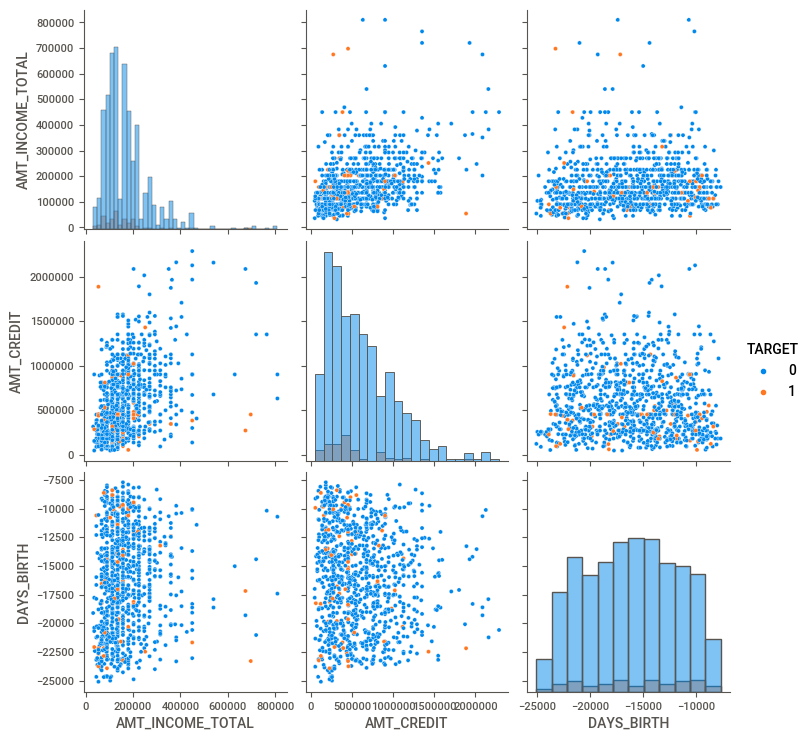

In [ ]:
# Assuming you have loaded your dataset into a DataFrame called 'data'
columns_to_analyze = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH']

# Create a random sample of 1000 rows
sample_data = data.sample(n=1000, random_state=42)

# Create pair plots for selected columns
sns.pairplot(sample_data[columns_to_analyze], hue='TARGET', diag_kind='hist')
plt.show()

<Figure size 2000x2500 with 0 Axes>

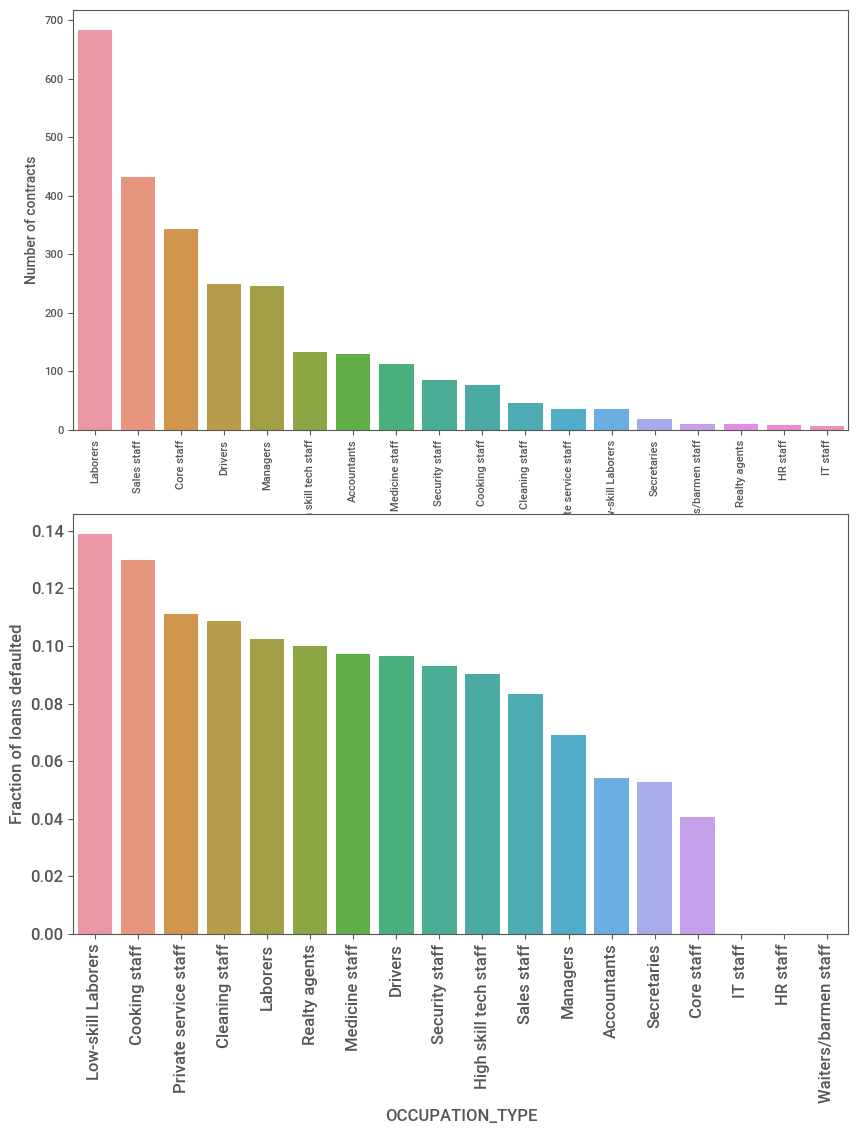

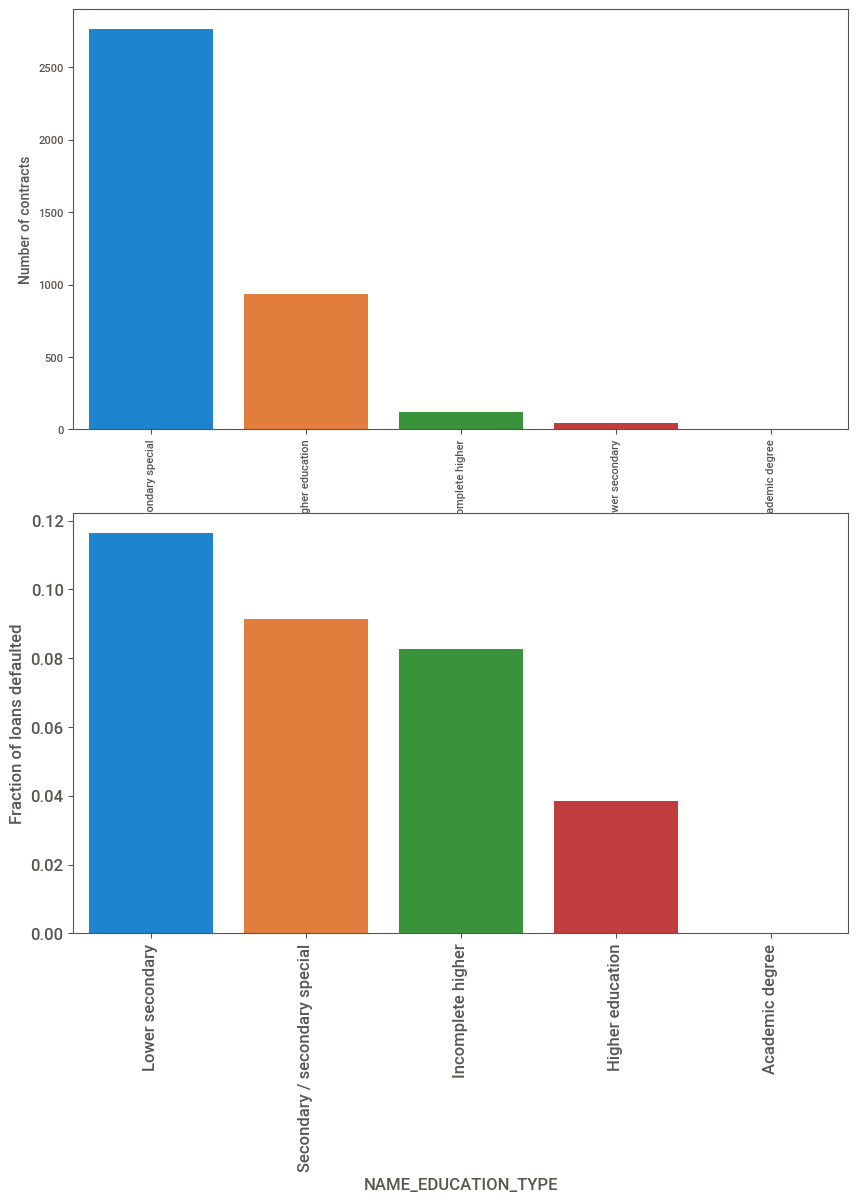

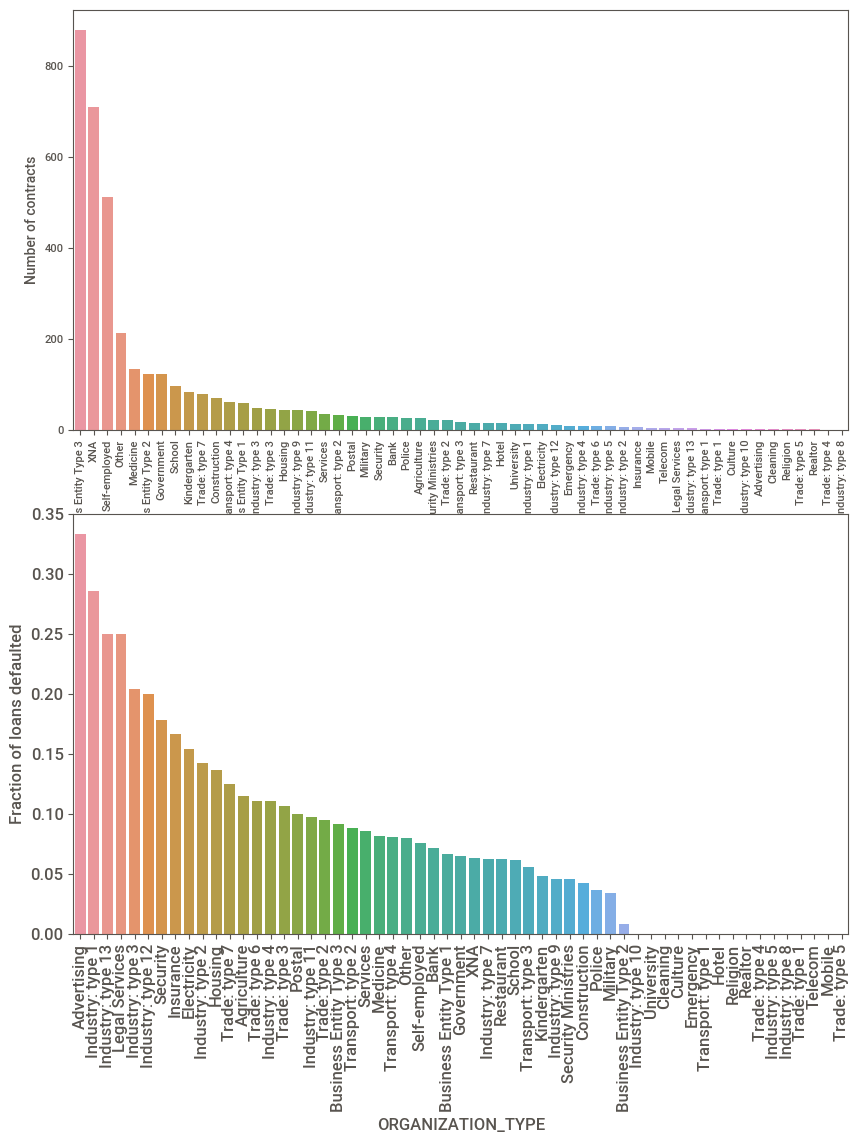

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
list1 = ['OCCUPATION_TYPE','NAME_EDUCATION_TYPE','ORGANIZATION_TYPE']

for column in list1:
    plots_bar(column,None,False)

1. The analysis indicates that education level and occupation status play a significant role in influencing the likelihood ofloan default.
2. Additionally, the type of organization with which an individual is associated has a relatively smaller
impact on loan default status.


In [ ]:
def plot_distribution(data, feature, group_column, group_values, title=None):

    plt.figure(figsize=(8, 6))
    for value in group_values:
        sns.distplot(data[data[group_column] == value][feature], hist=False, kde=True,
                     kde_kws={'shade': True}, label=f'{group_column}={value}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

# Example usage:
# Assuming you have a DataFrame 'data' with a column 'TARGET' representing paid (1) or not paid (0)
# and you want to plot the distribution of 'AMT_INCOME_TOTAL' for both groups.

# plot_distribution(data, 'AMT_INCOME_TOTAL', 'TARGET', [0, 1], title='Income Distribution for Paid vs. Not Paid')


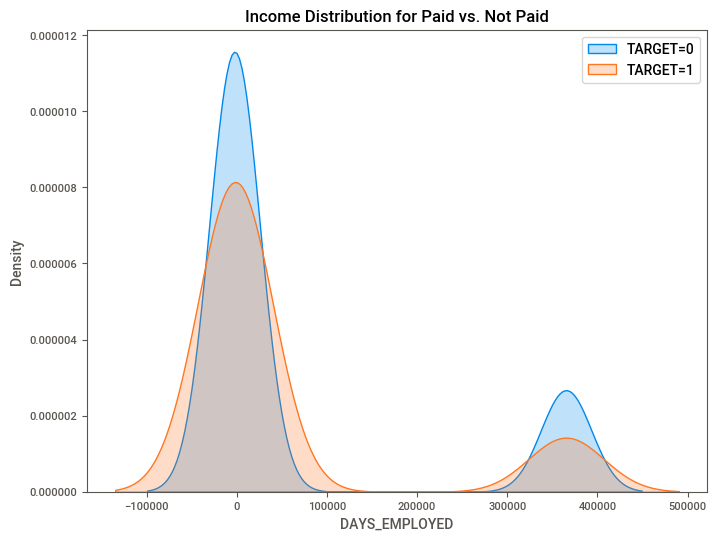

In [ ]:
plot_distribution(data, 'DAYS_EMPLOYED', 'TARGET', [0, 1], title='Income Distribution for Paid vs. Not Paid')

1. By Analysing the distribution, insight would be that the

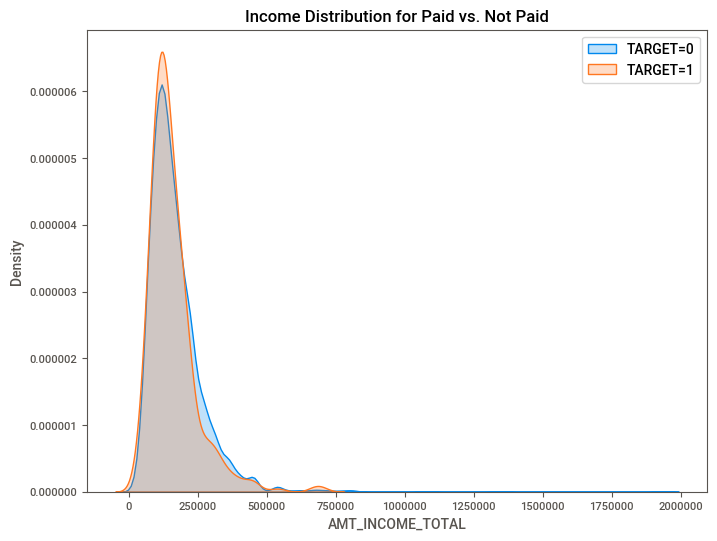

In [ ]:
plot_distribution(data, 'AMT_INCOME_TOTAL', 'TARGET', [0, 1], title='Income Distribution for Paid vs. Not Paid')


Creating a income band according to their AMT_INCOME

In [ ]:
data.columns.get_loc('FLAG_DOCUMENT_21')

115

In [ ]:
def get_thresh(feature):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(data[feature])
    sdev=np.std(data[feature])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',feature,':',threshold)
    return threshold

In [ ]:
def create_income_band(df):
    df.loc[(df.AMT_INCOME_TOTAL < 30000),'INCOME_BAND'] = 1
    df.loc[(df.AMT_INCOME_TOTAL >= 30000)&(df.AMT_INCOME_TOTAL < 65000),'INCOME_BAND'] = 2
    df.loc[(df.AMT_INCOME_TOTAL >= 65000)&(df.AMT_INCOME_TOTAL < 95000),'INCOME_BAND'] = 3
    df.loc[(df.AMT_INCOME_TOTAL >= 95000)&(df.AMT_INCOME_TOTAL < 130000),'INCOME_BAND'] = 4
    df.loc[(df.AMT_INCOME_TOTAL >= 130000)&(df.AMT_INCOME_TOTAL < 160000),'INCOME_BAND'] = 5
    df.loc[(df.AMT_INCOME_TOTAL >= 160000)&(df.AMT_INCOME_TOTAL < 190000),'INCOME_BAND'] = 6
    df.loc[(df.AMT_INCOME_TOTAL >= 190000)&(df.AMT_INCOME_TOTAL < 220000),'INCOME_BAND'] = 7
    df.loc[(df.AMT_INCOME_TOTAL >= 220000)&(df.AMT_INCOME_TOTAL < 275000),'INCOME_BAND'] = 8
    df.loc[(df.AMT_INCOME_TOTAL >= 275000)&(df.AMT_INCOME_TOTAL < 325000),'INCOME_BAND'] = 9
    df.loc[(df.AMT_INCOME_TOTAL >= 325000),'INCOME_BAND'] = 10
    return df

In [ ]:
create_income_band(data);

Text(0.5, 1.0, 'Income data for people repaying loans')

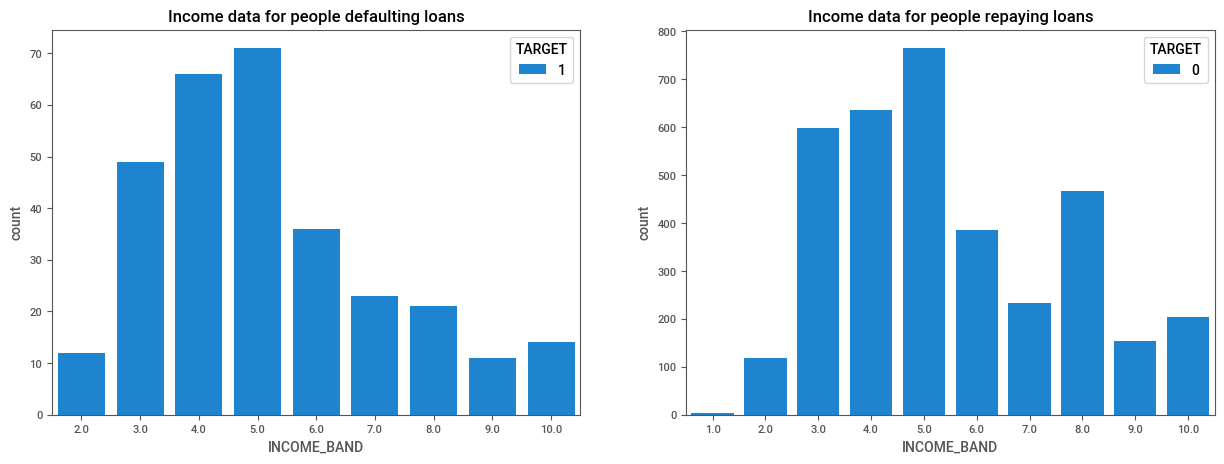

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=data[data.TARGET==1],x='INCOME_BAND',hue='TARGET').set_title('Income data for people defaulting loans')
plt.subplot(122)
sns.countplot(data=data[data.TARGET==0],x='INCOME_BAND',hue='TARGET').set_title('Income data for people repaying loans')

<Figure size 1500x500 with 0 Axes>

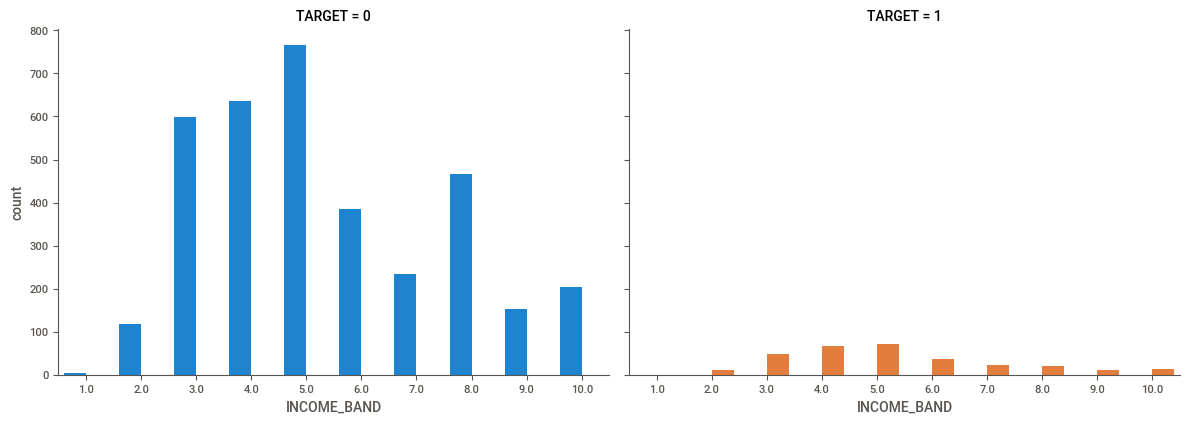

In [ ]:
plt.figure(figsize=(15, 5))

# Combine the count plots in one plane using catplot
sns.catplot(data=data, x='INCOME_BAND', hue='TARGET', col='TARGET', kind='count', height=5, aspect=1.2)

# Set the titles for each subplot
plt.subplots_adjust(top=0.8, hspace=0)

# Show the plot
plt.show()

Checking the outlier

In [ ]:
def identify_outliers(data):

    # Separate columns by data type (integers and objects)
    numeric_cols = data.select_dtypes(include=['int64', 'float64'])
    object_cols = data.select_dtypes(include=['object'])

    # Create boxplots for numeric columns with outliers
    for col in numeric_cols.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=data, x=col)
        plt.title(f'Boxplot of {col}')
        plt.show()

    # Display a list of object columns
    if not object_cols.empty:
        print("\nCategorical (Object) Columns:")
        print(object_cols.columns.tolist())


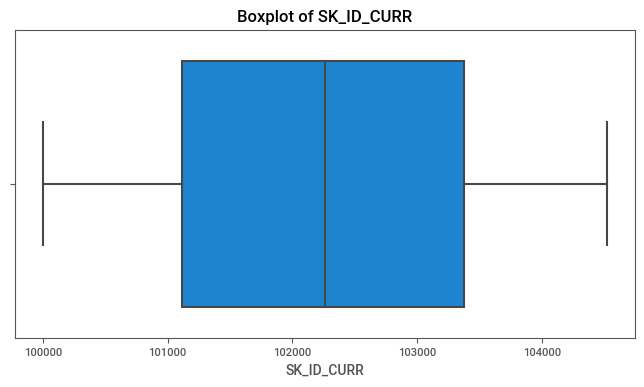

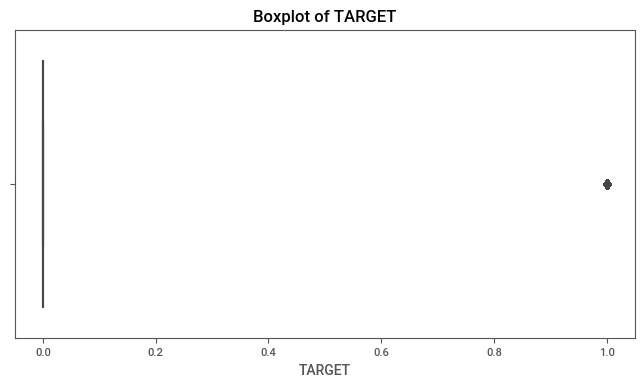

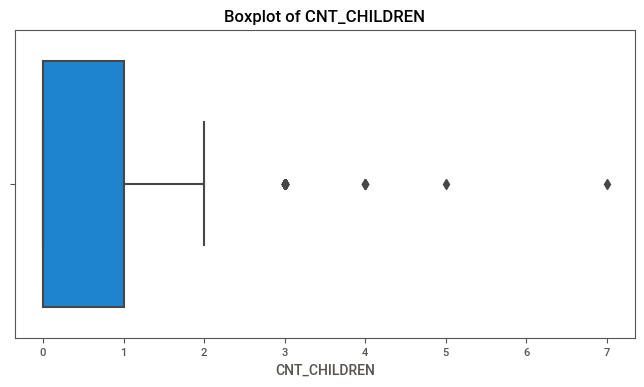

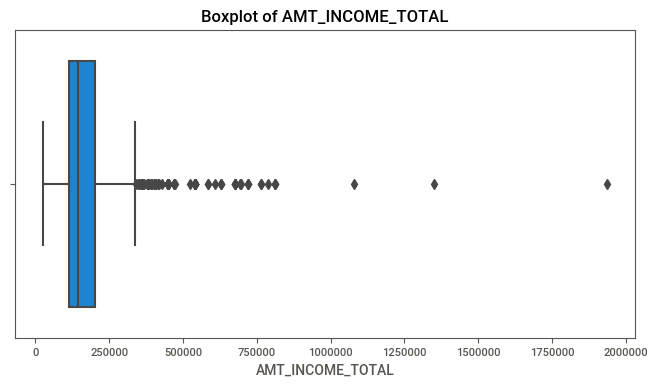

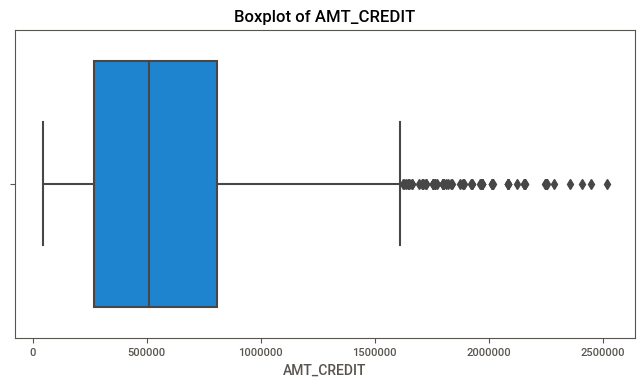

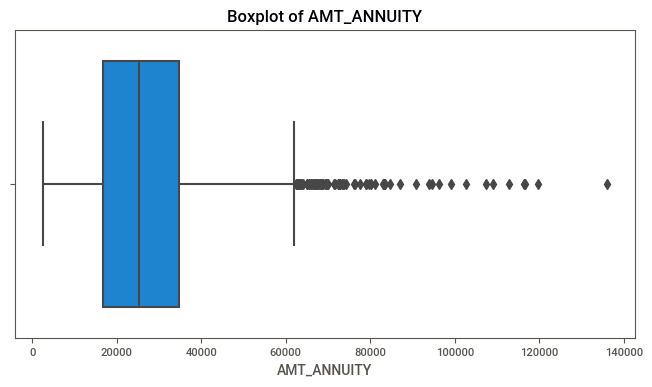

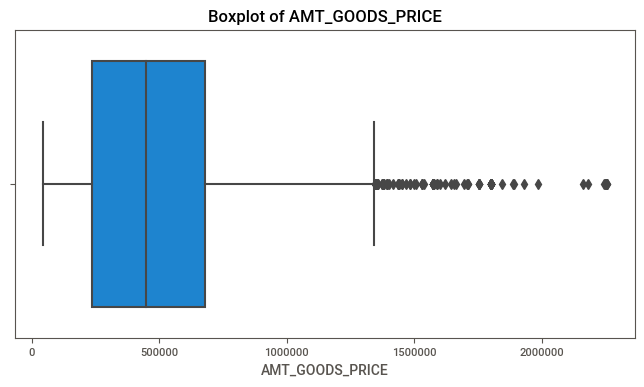

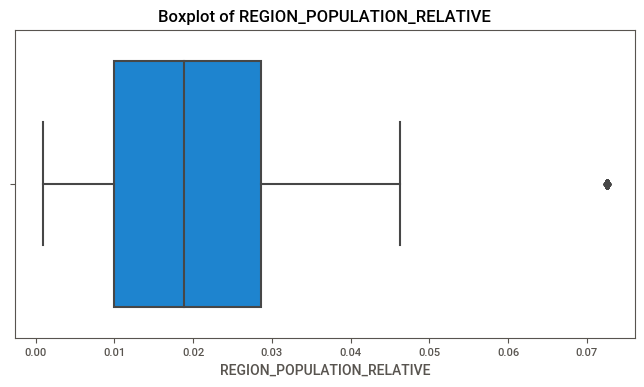

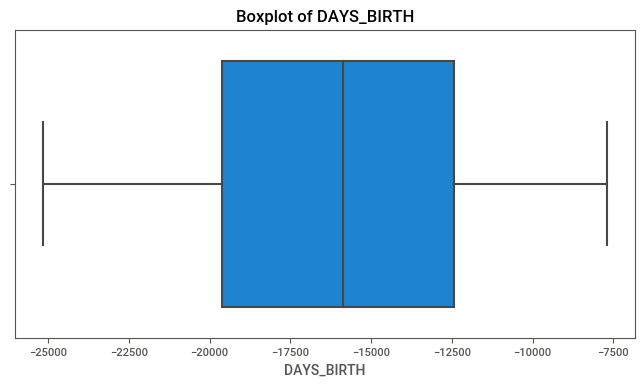

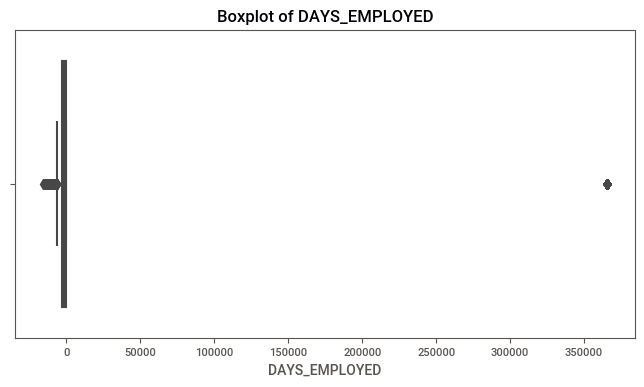

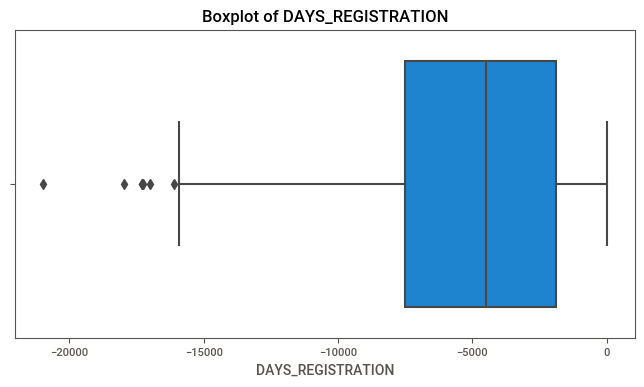

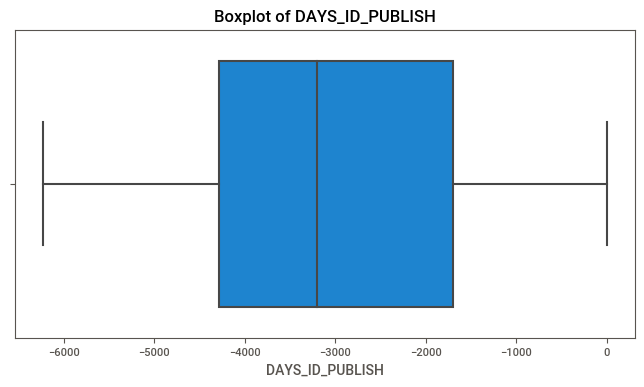

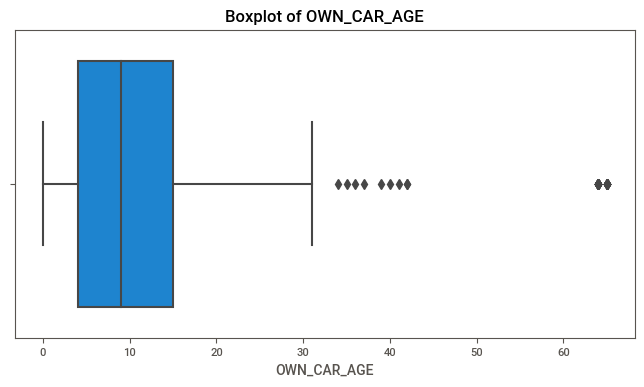

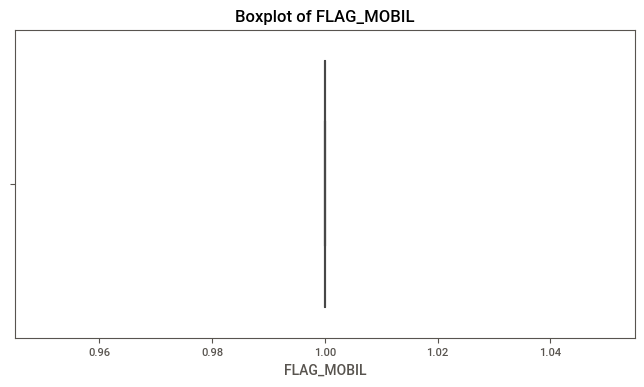

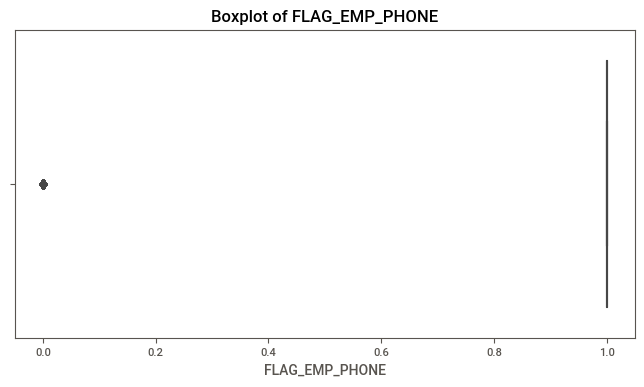

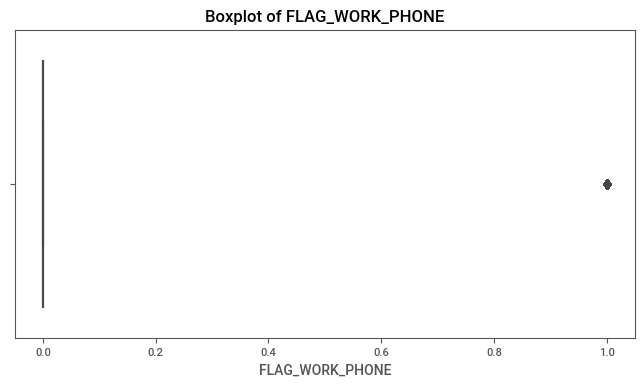

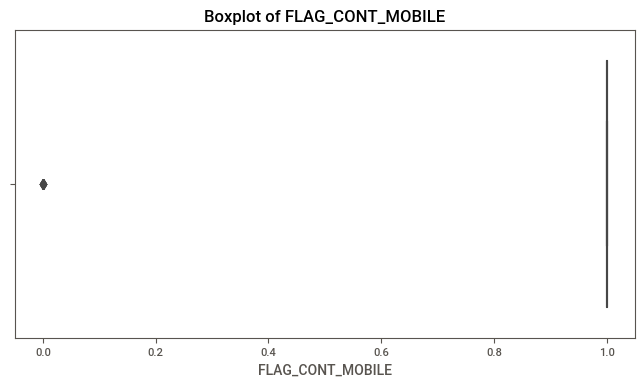

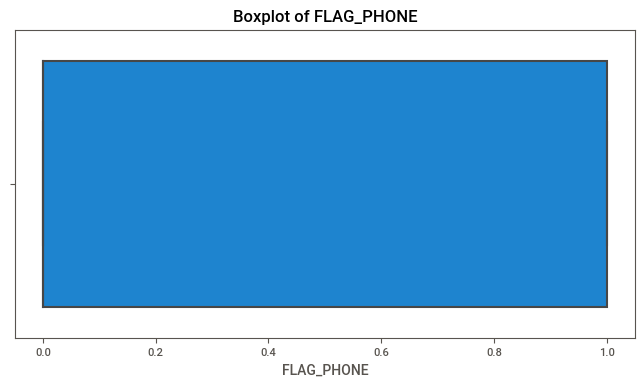

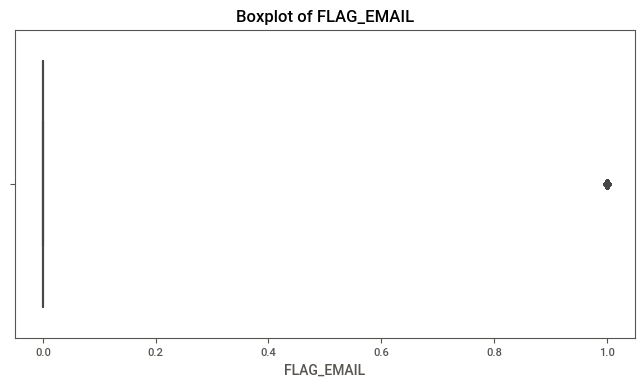

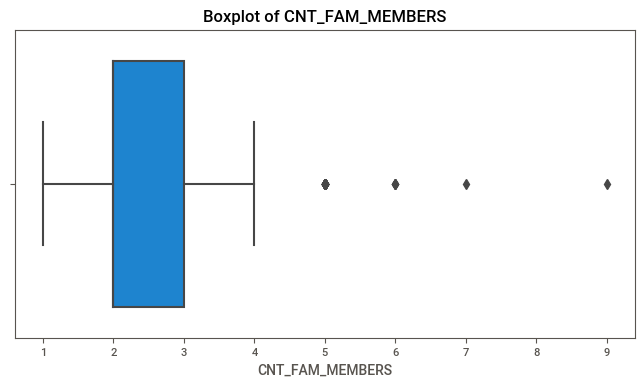

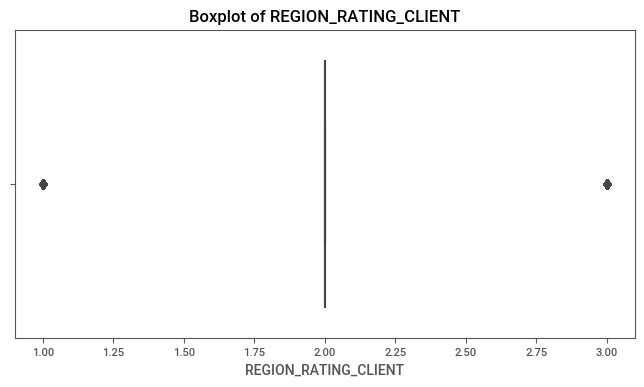

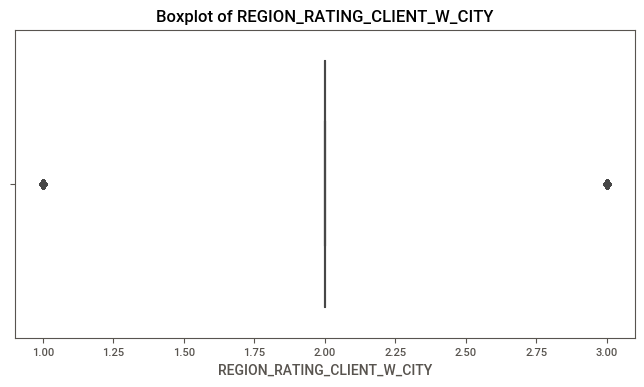

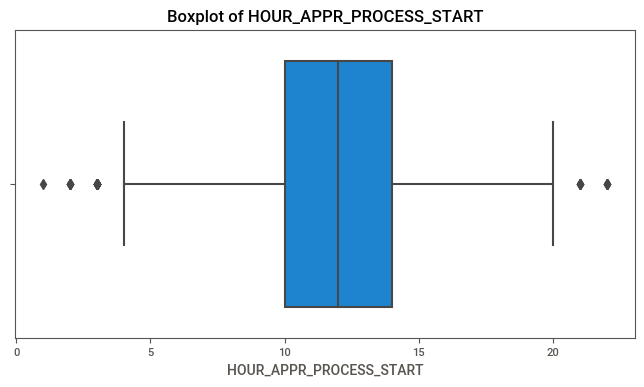

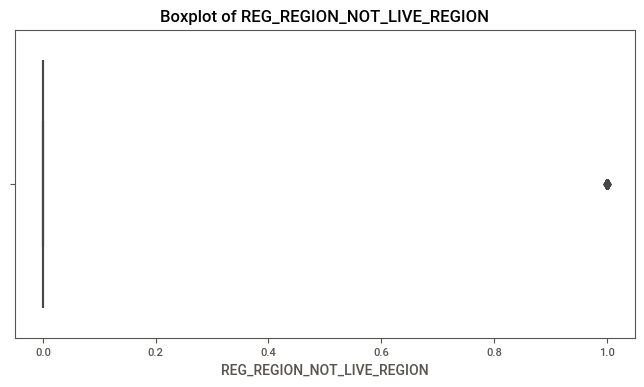

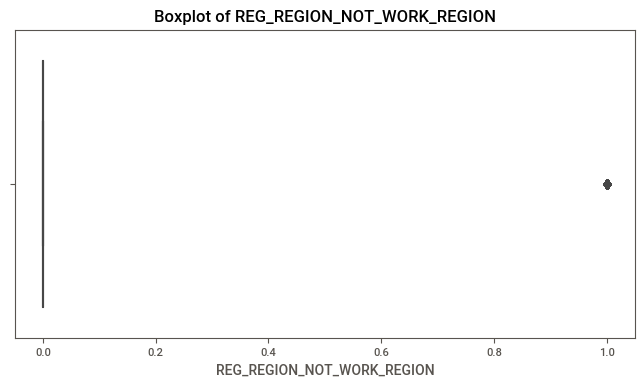

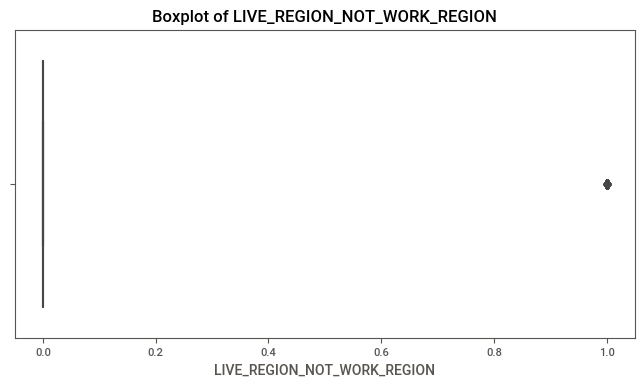

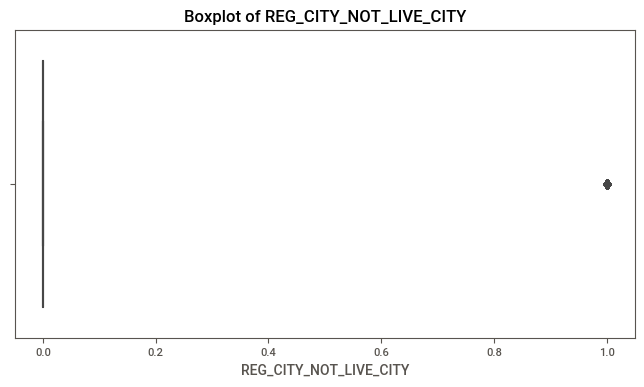

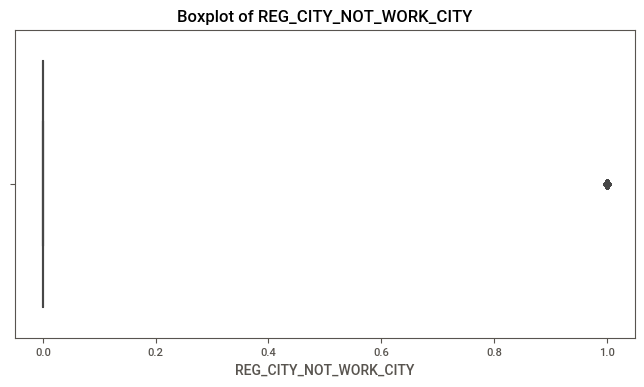

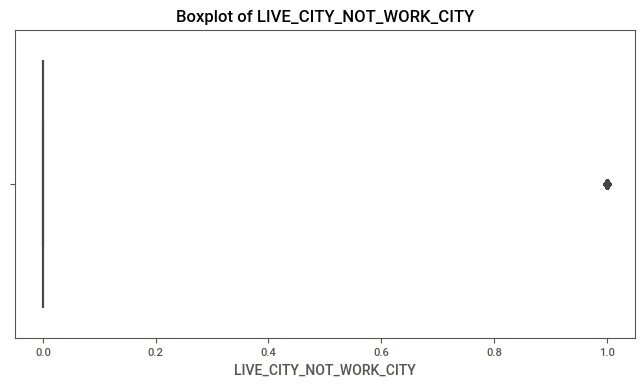

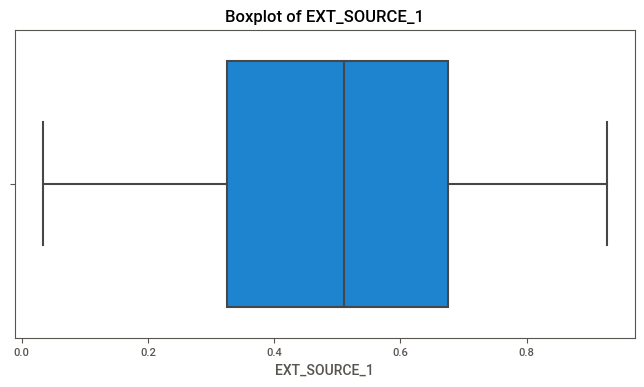

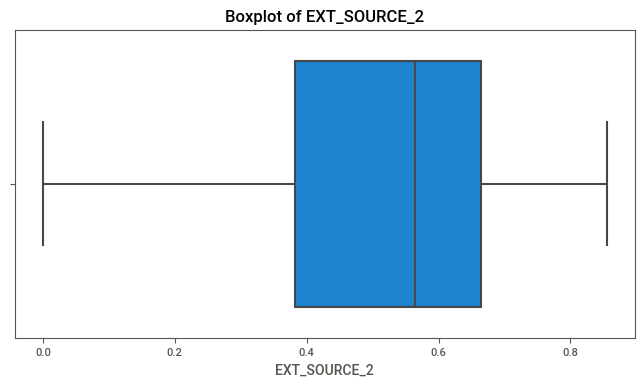

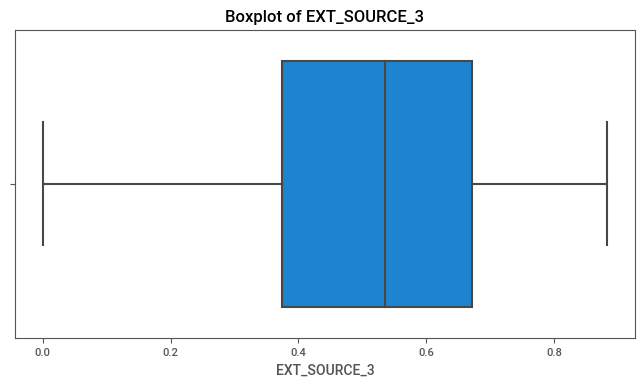

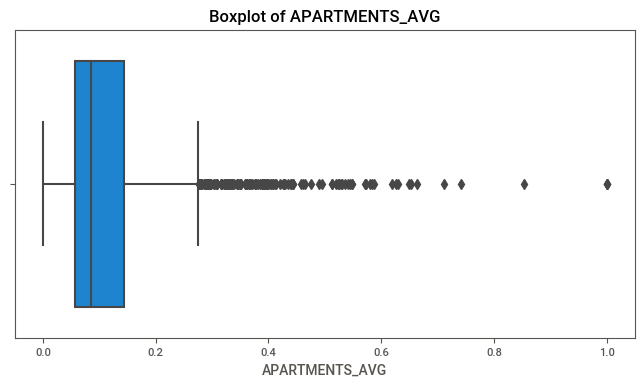

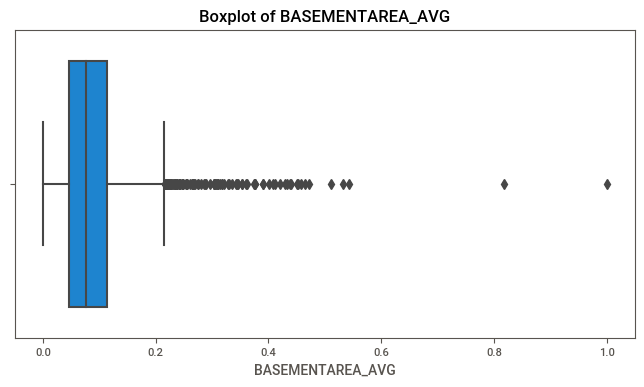

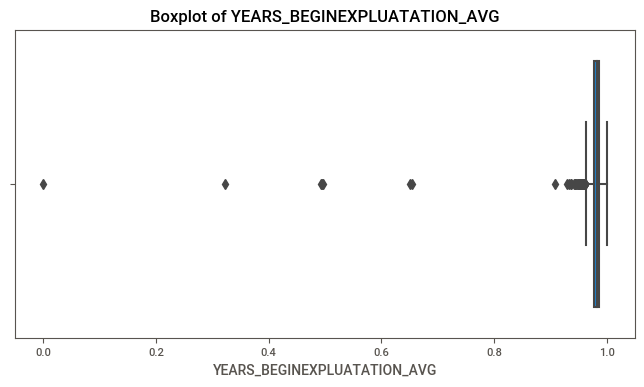

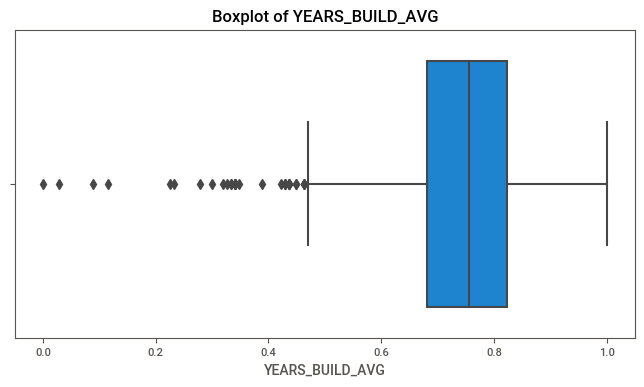

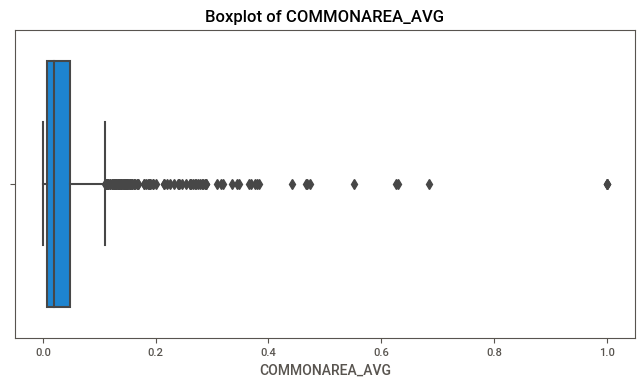

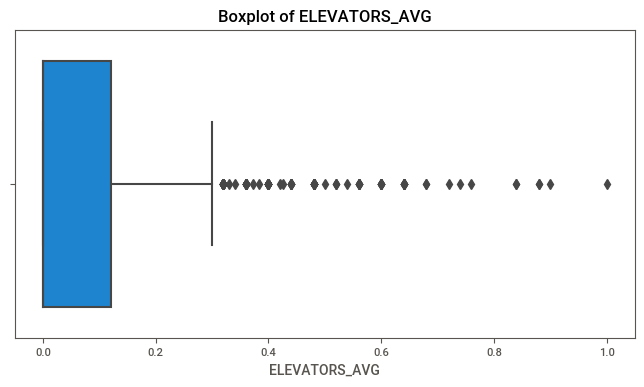

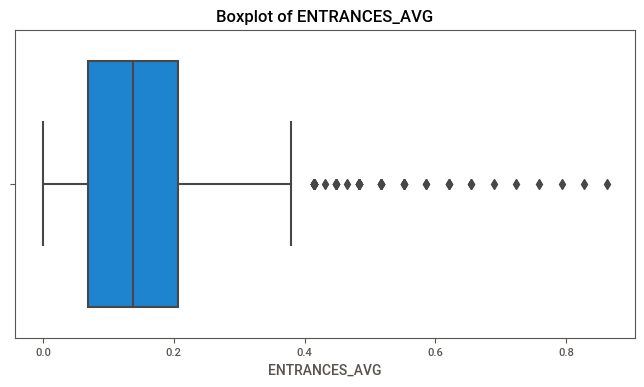

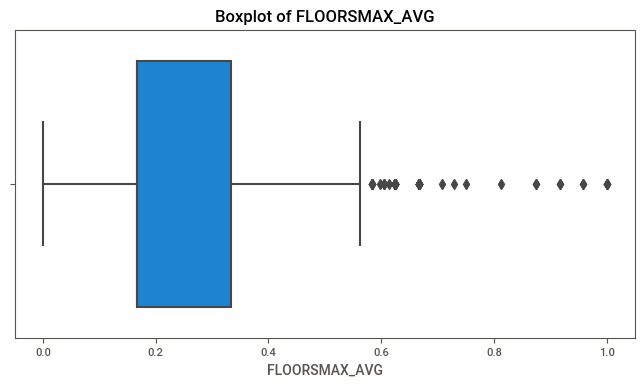

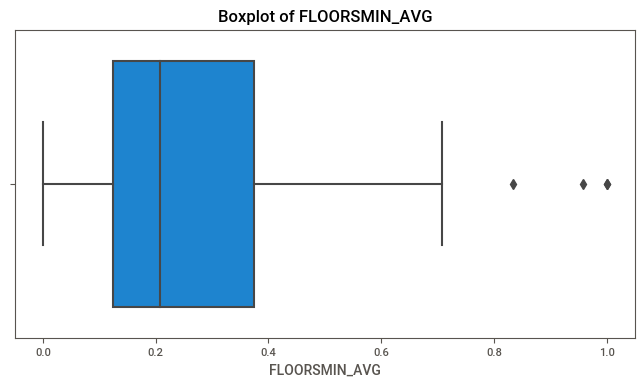

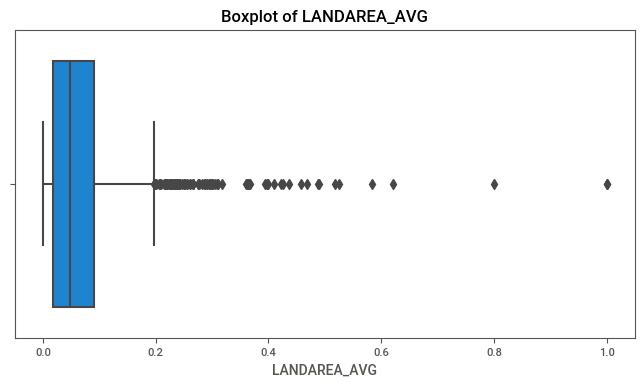

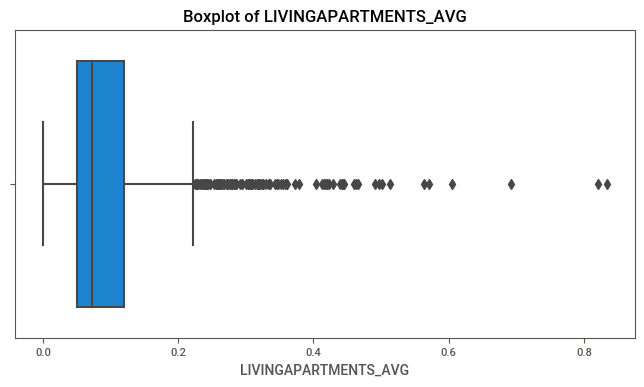

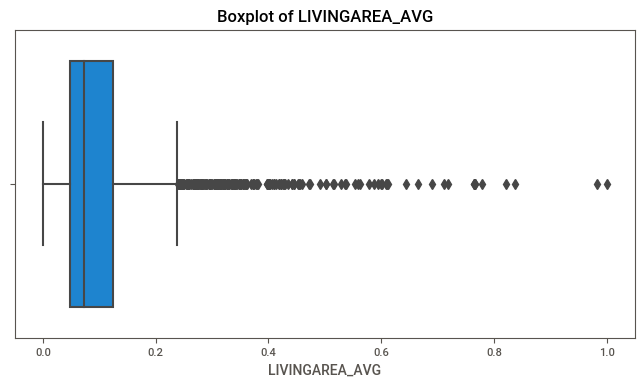

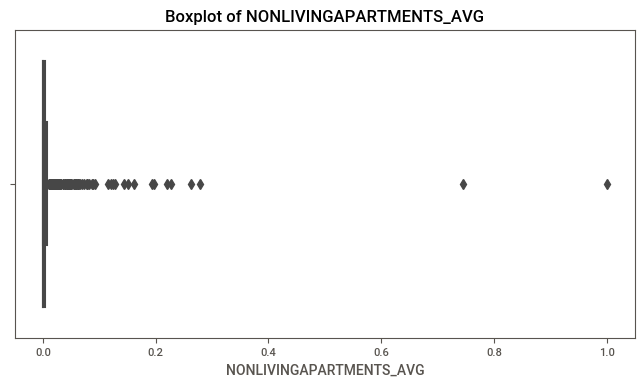

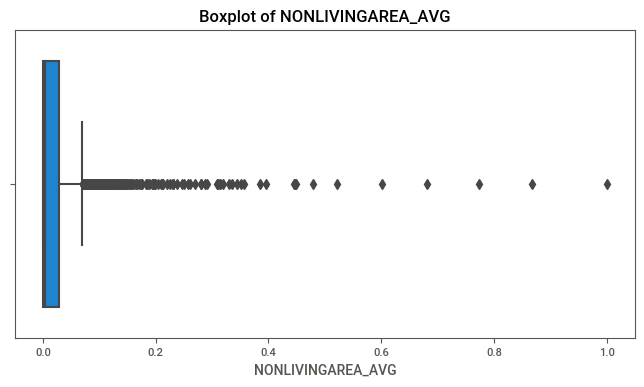

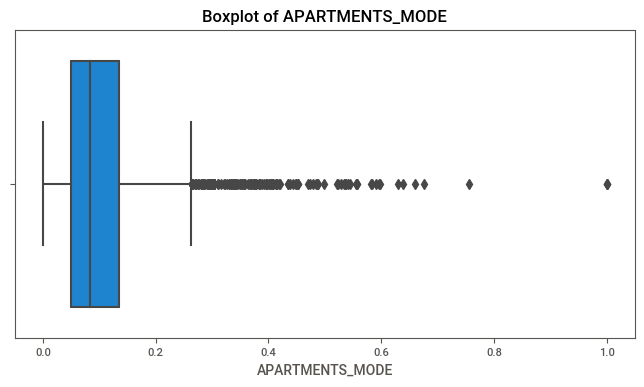

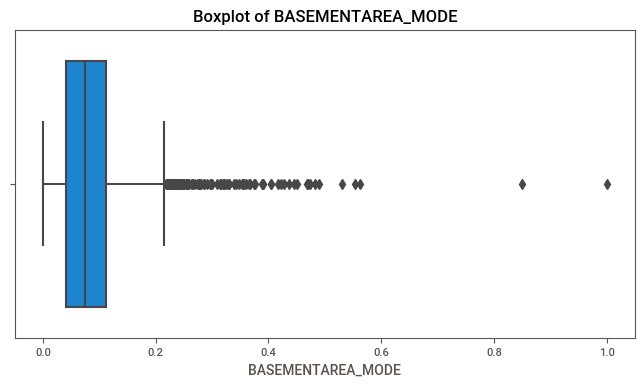

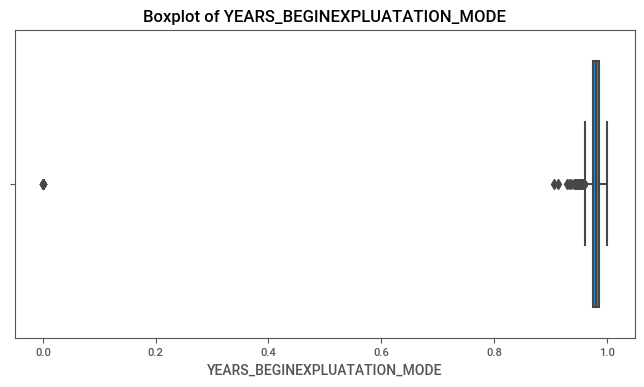

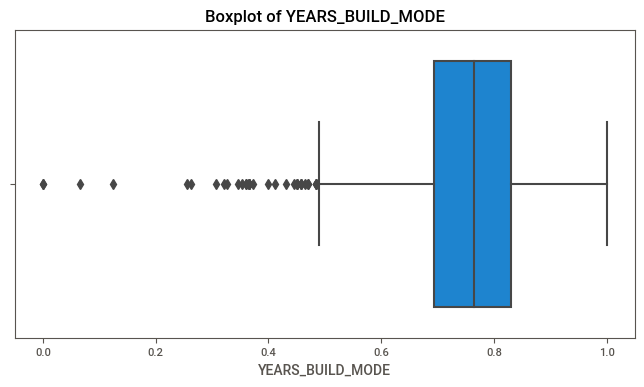

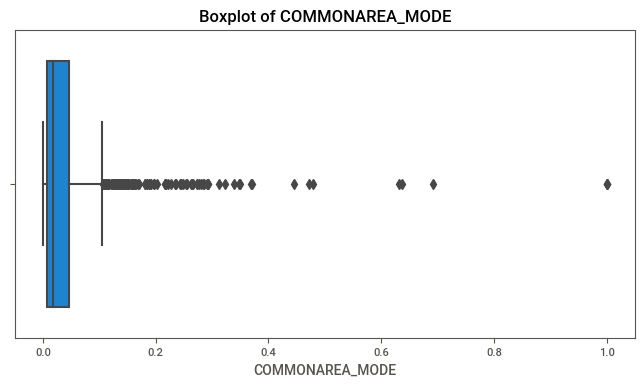

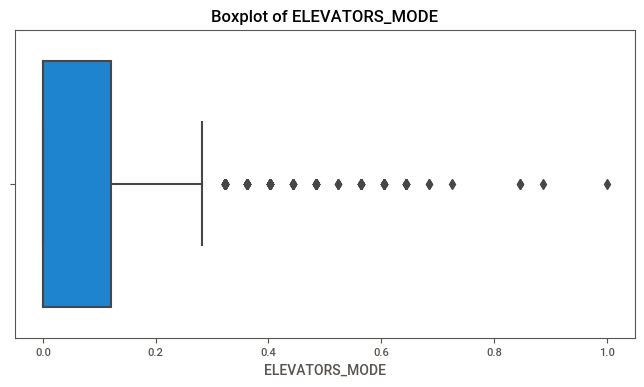

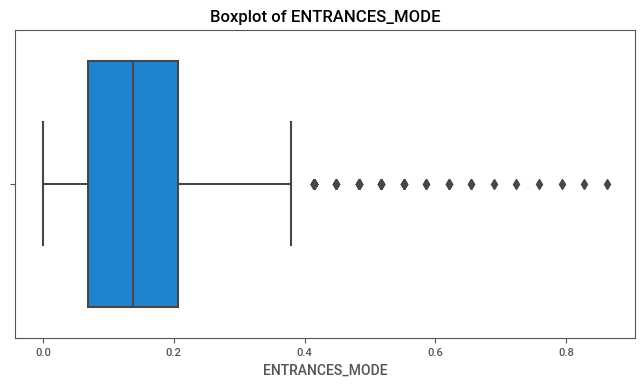

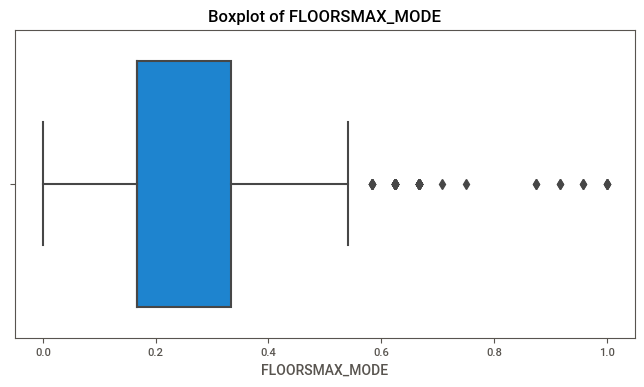

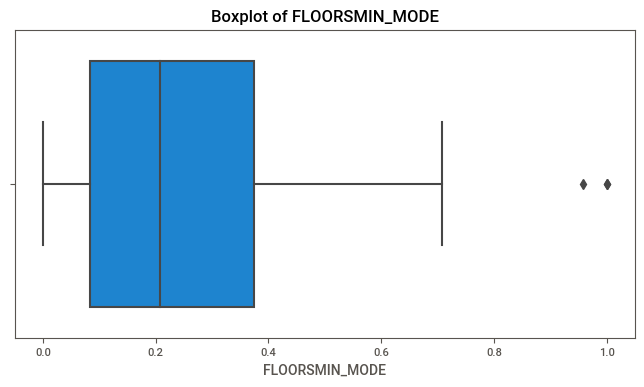

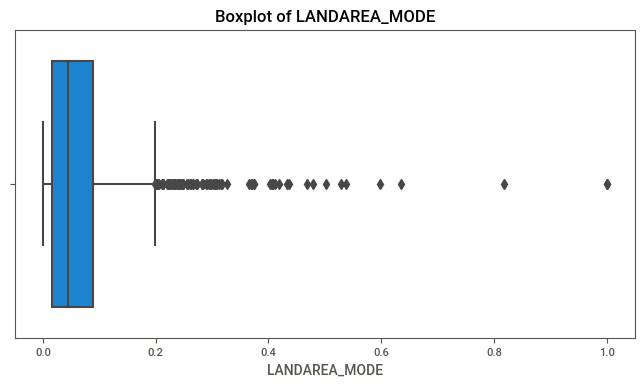

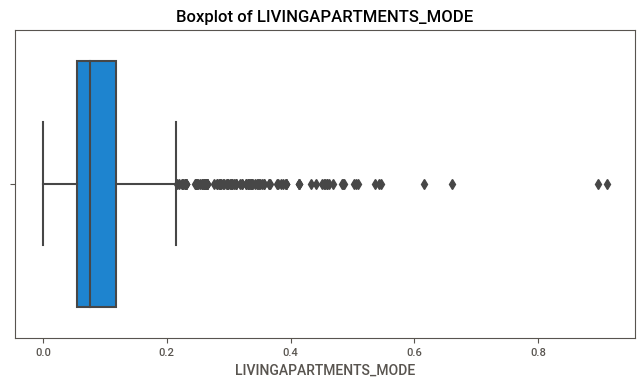

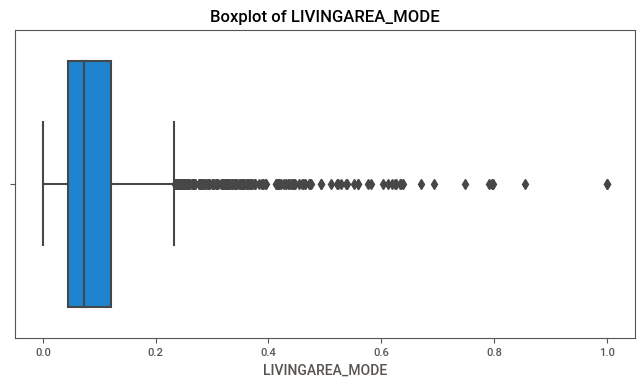

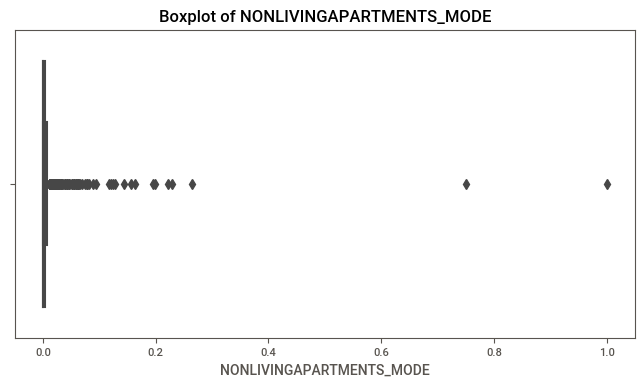

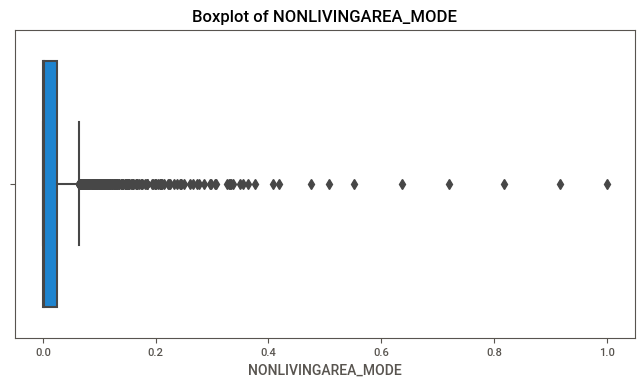

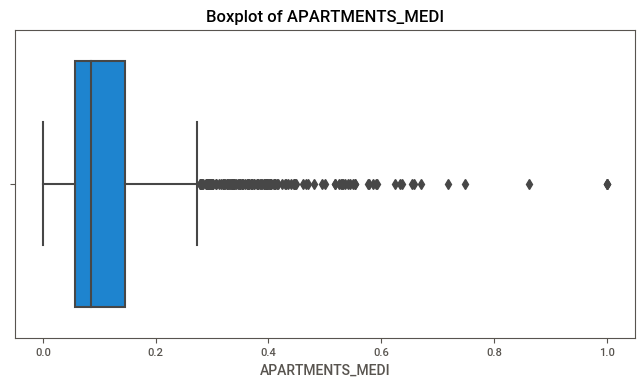

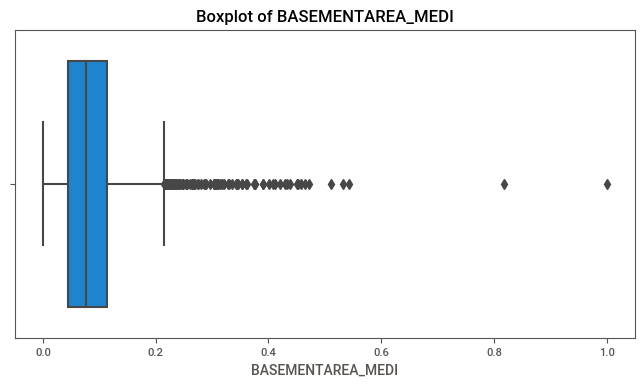

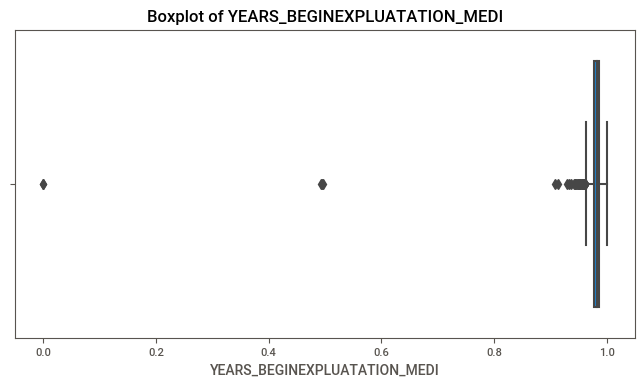

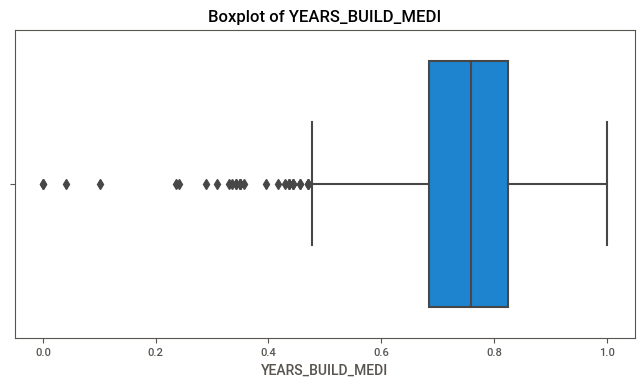

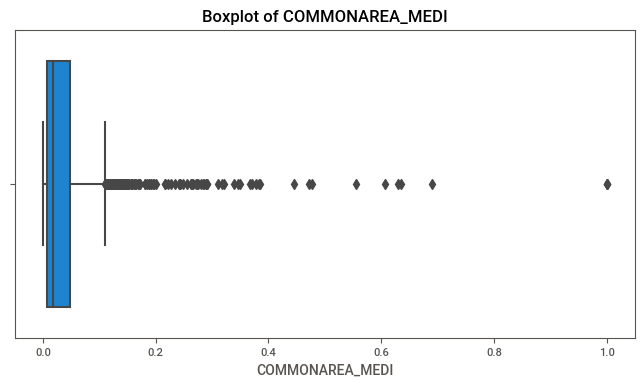

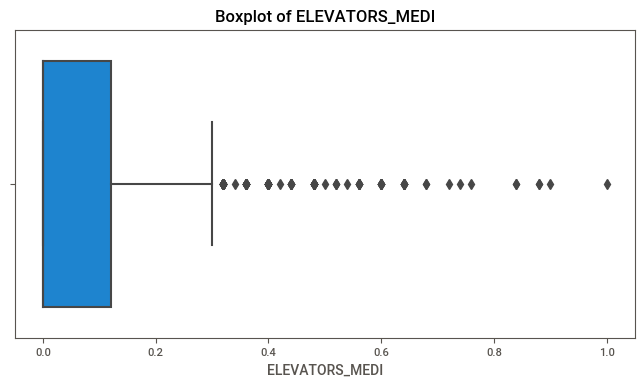

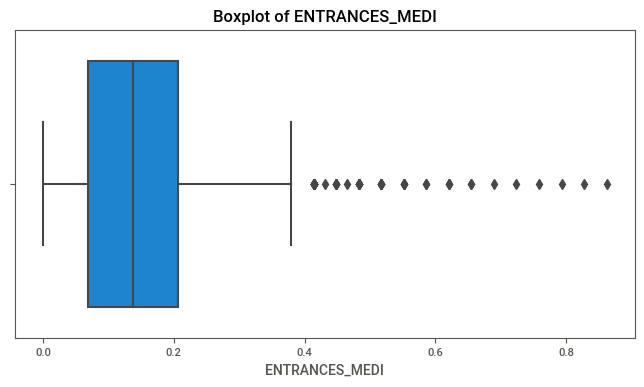

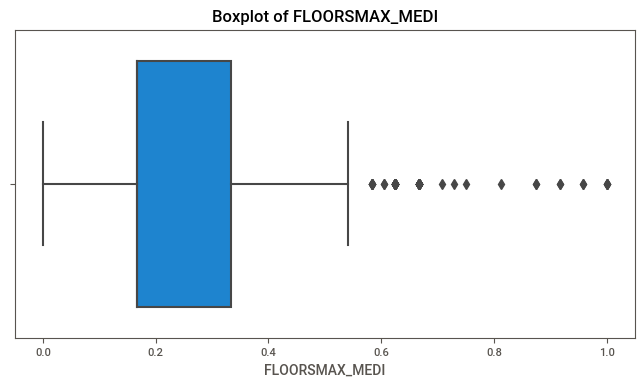

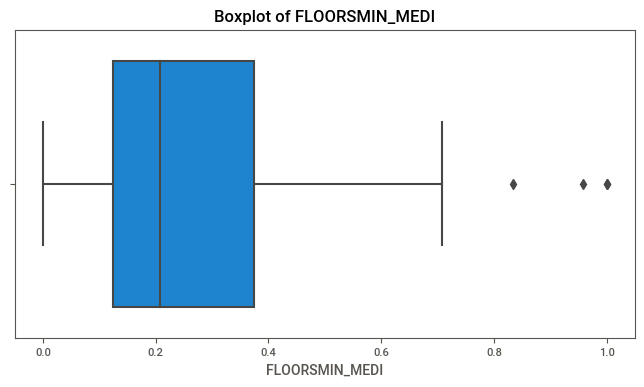

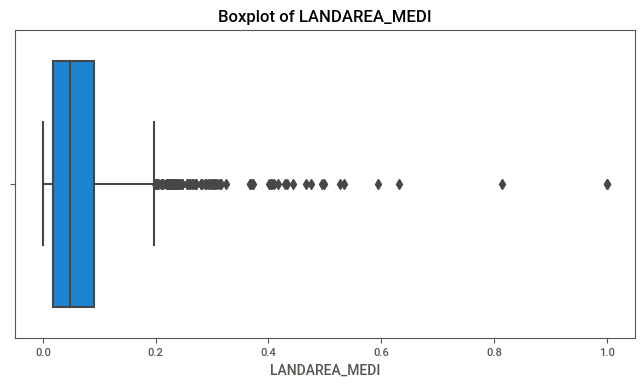

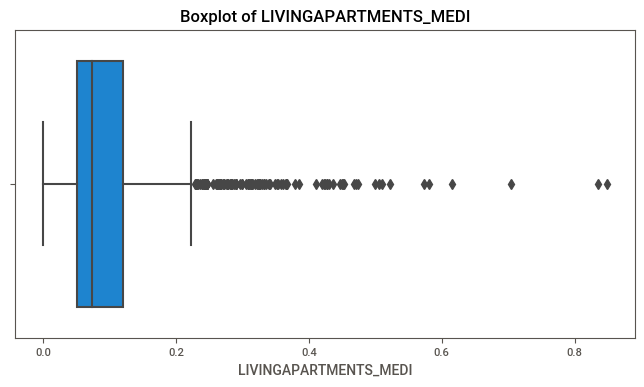

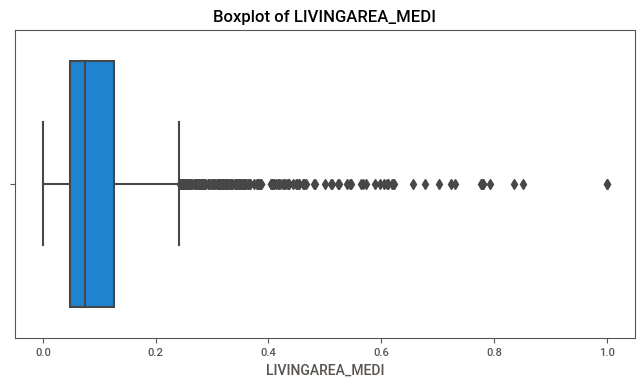

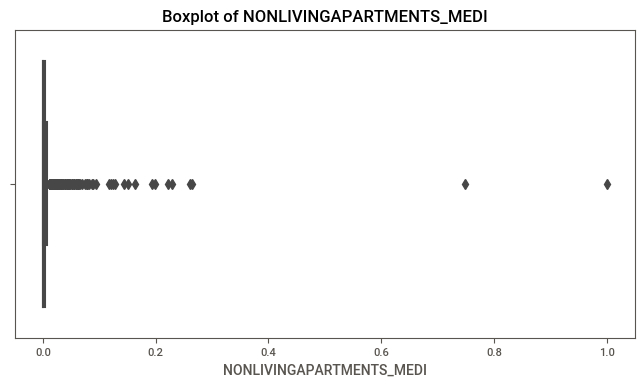

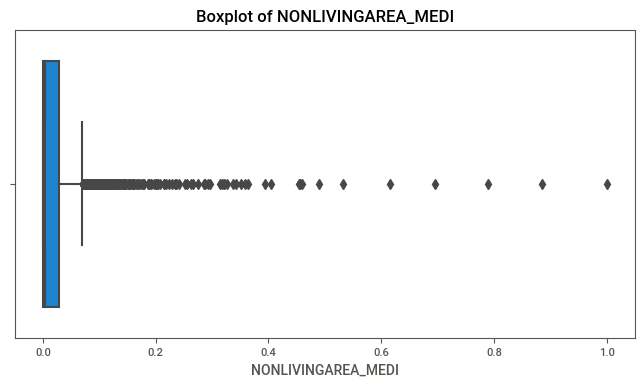

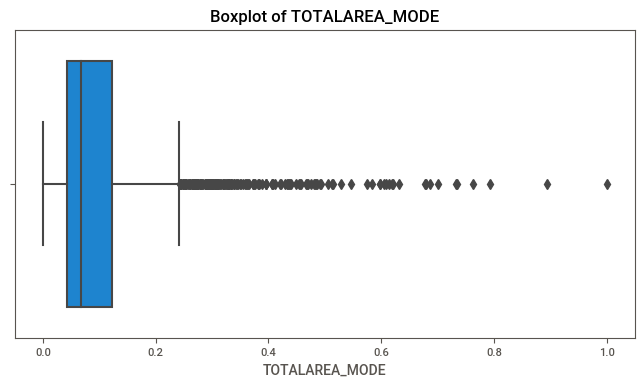

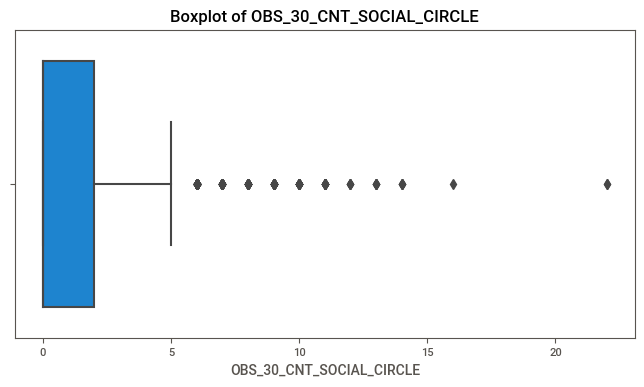

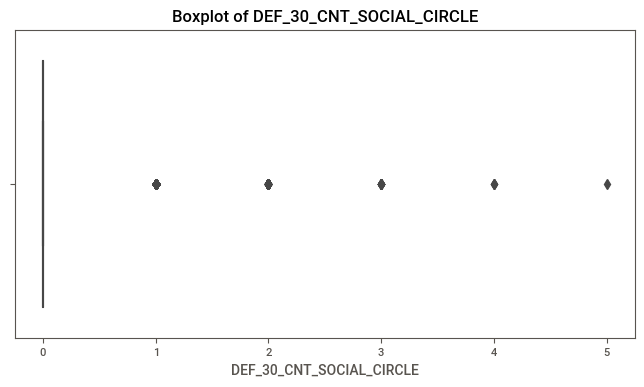

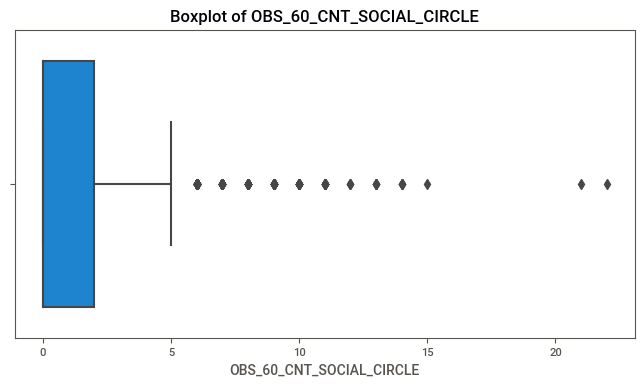

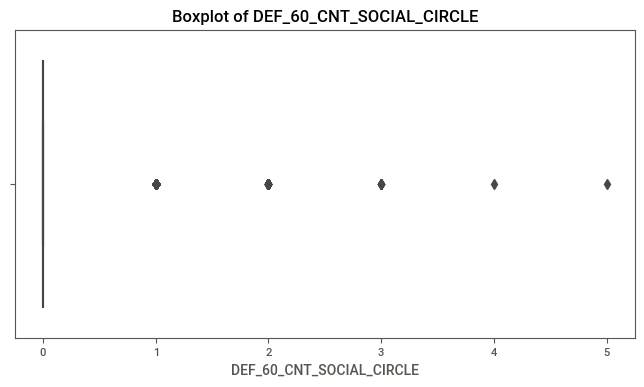

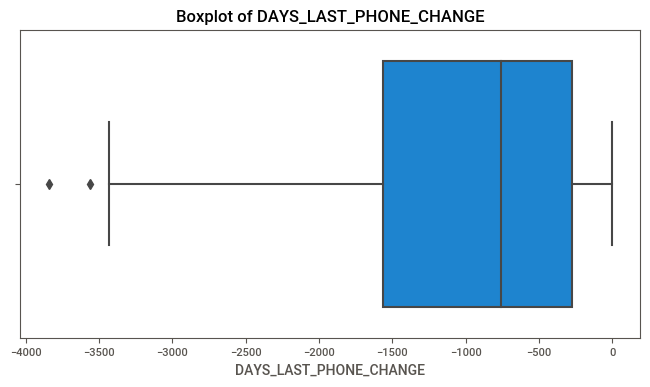

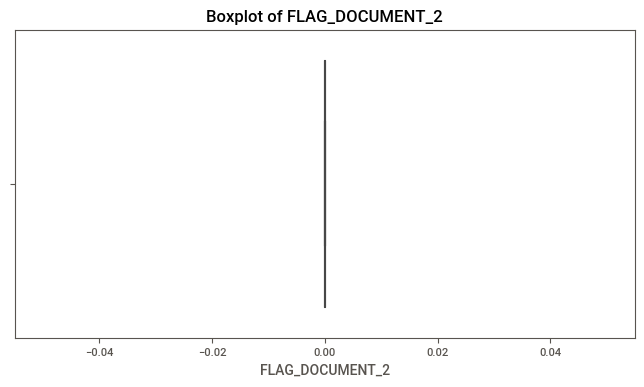

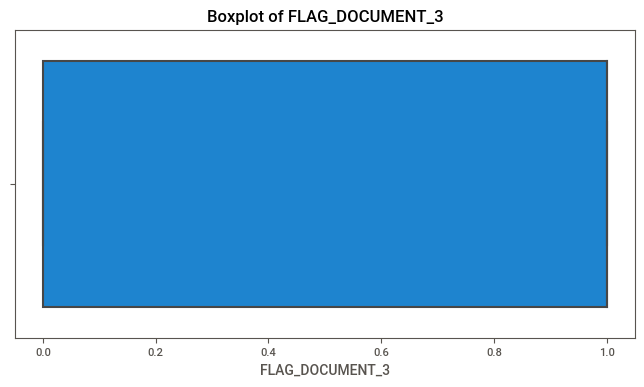

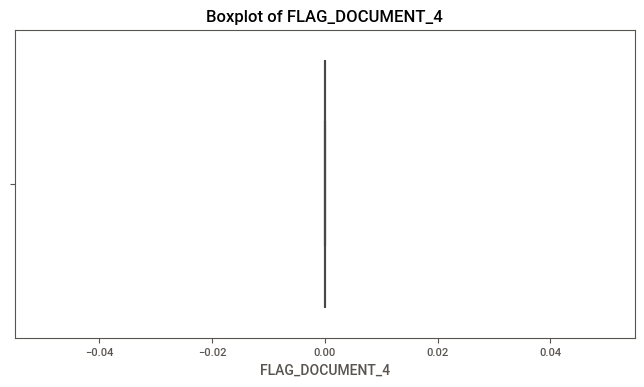

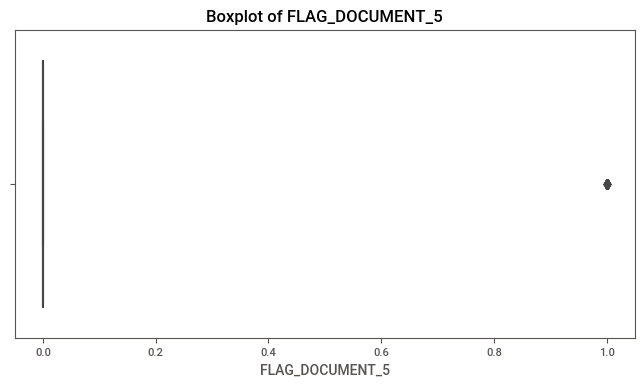

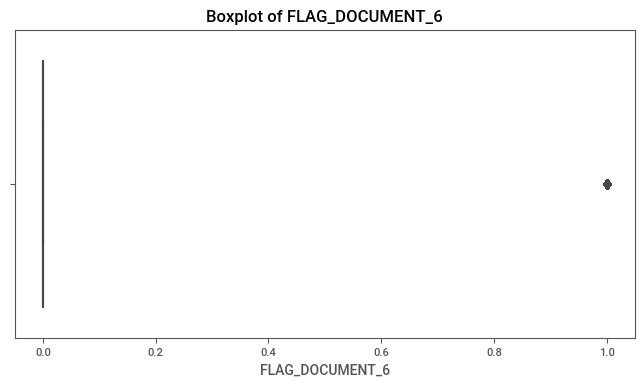

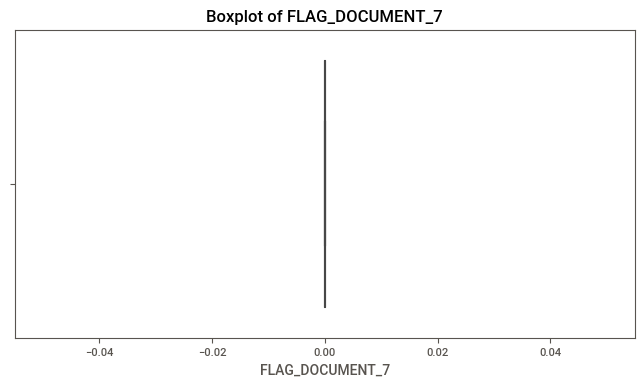

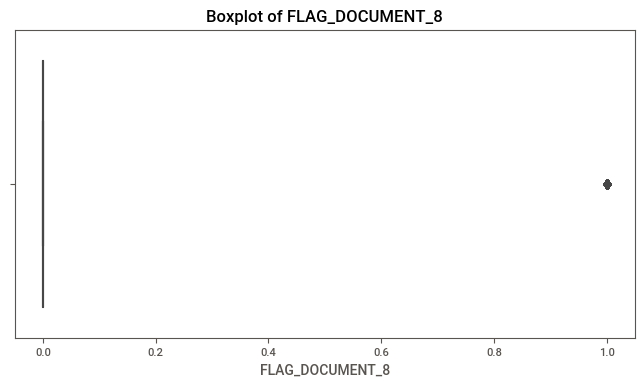

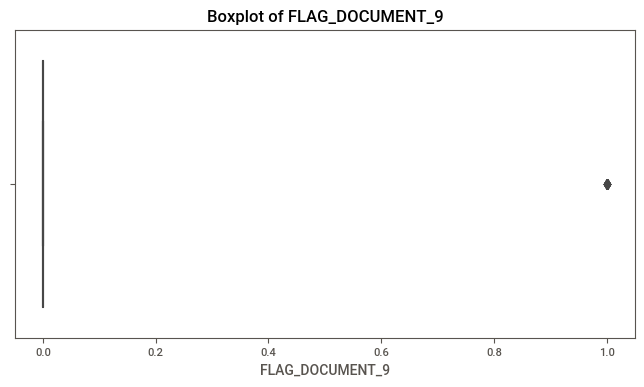

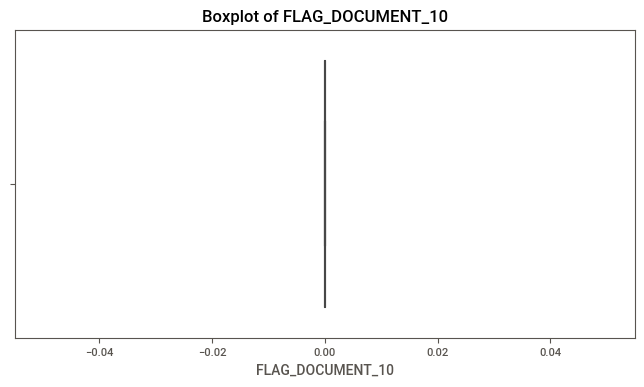

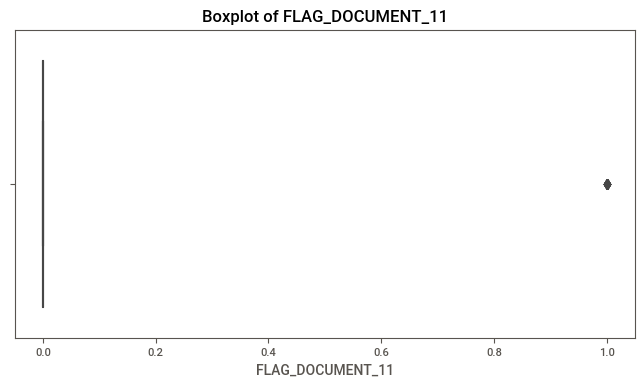

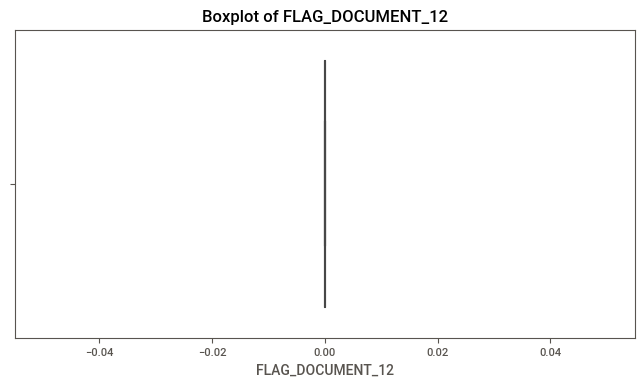

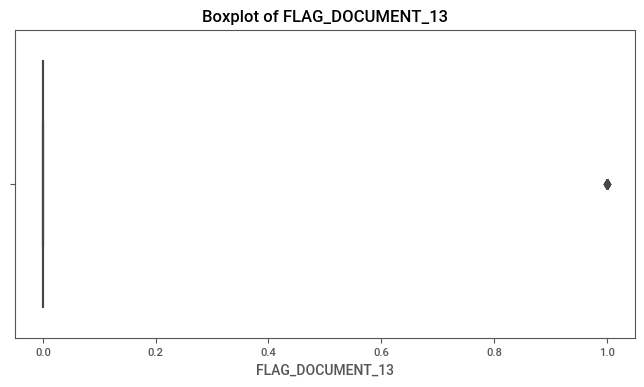

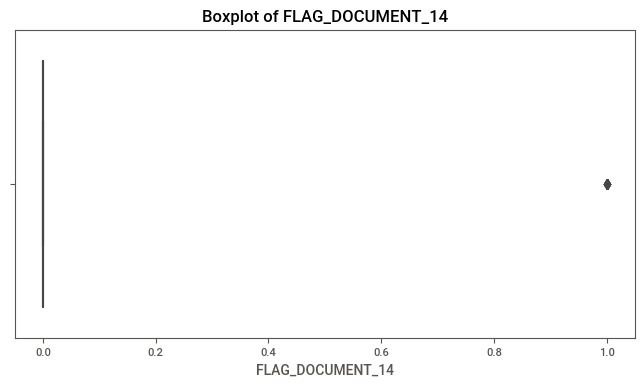

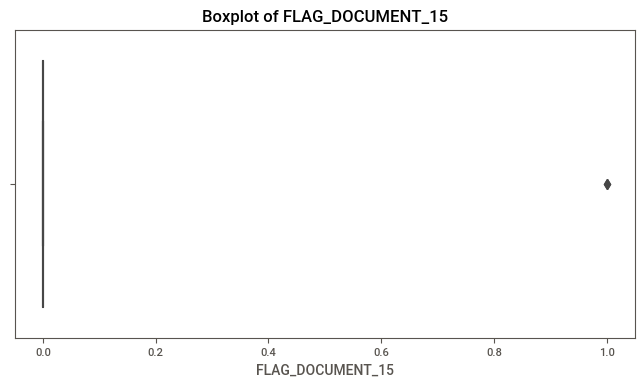

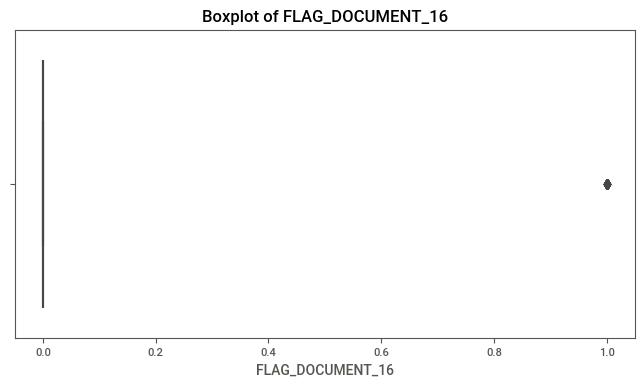

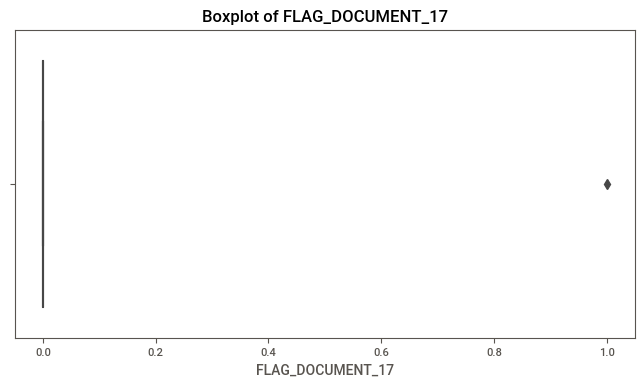

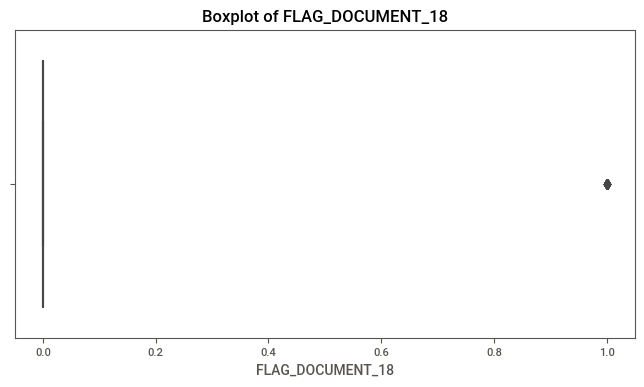

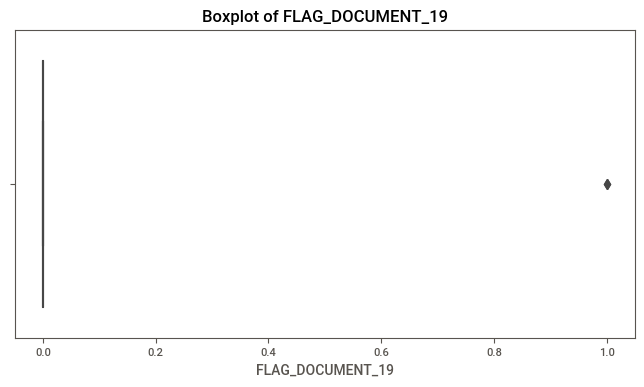

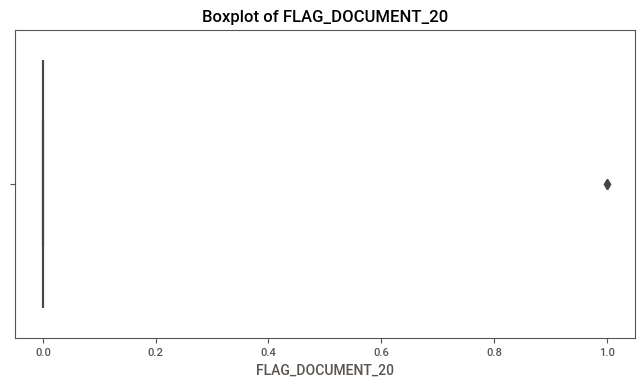

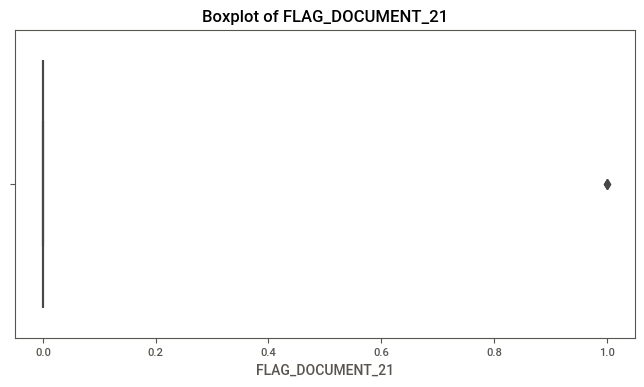

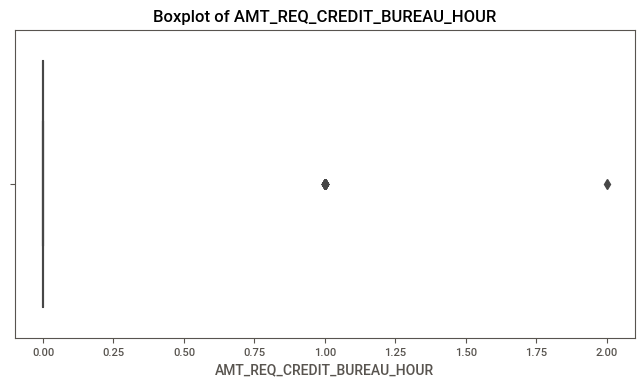

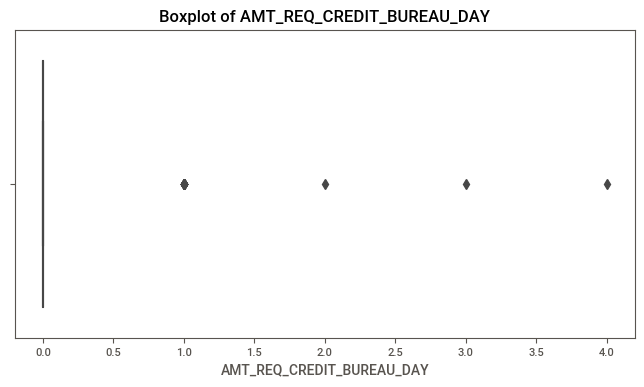

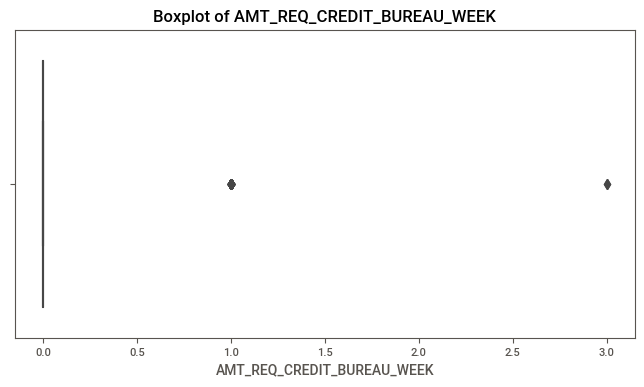

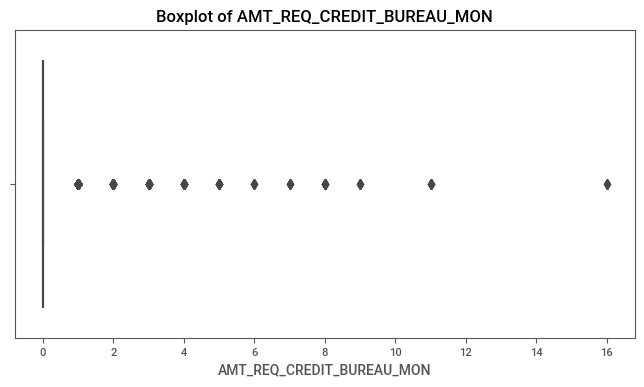

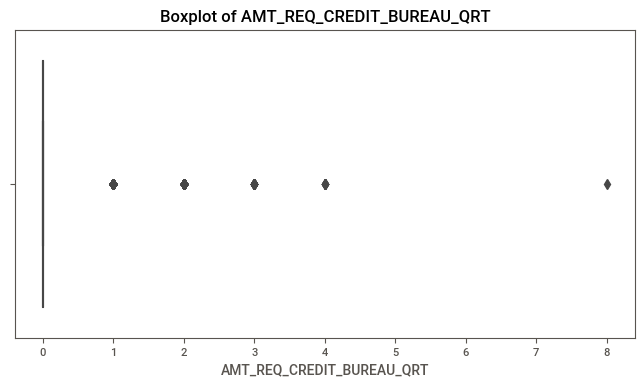

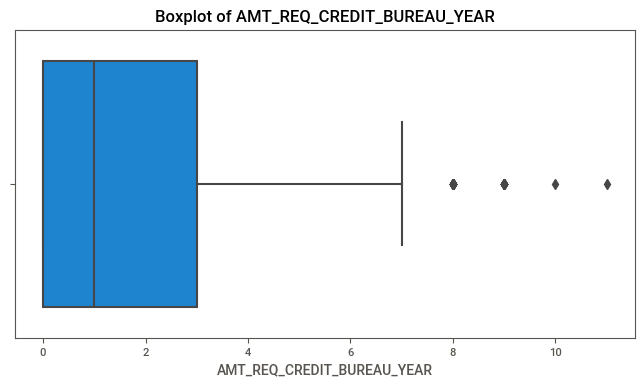

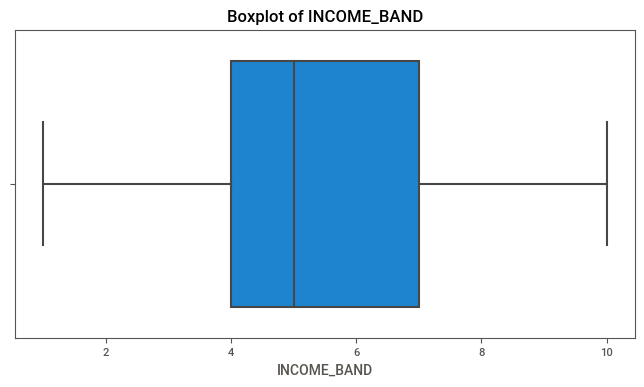


Categorical (Object) Columns:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [ ]:
identify_outliers(data)

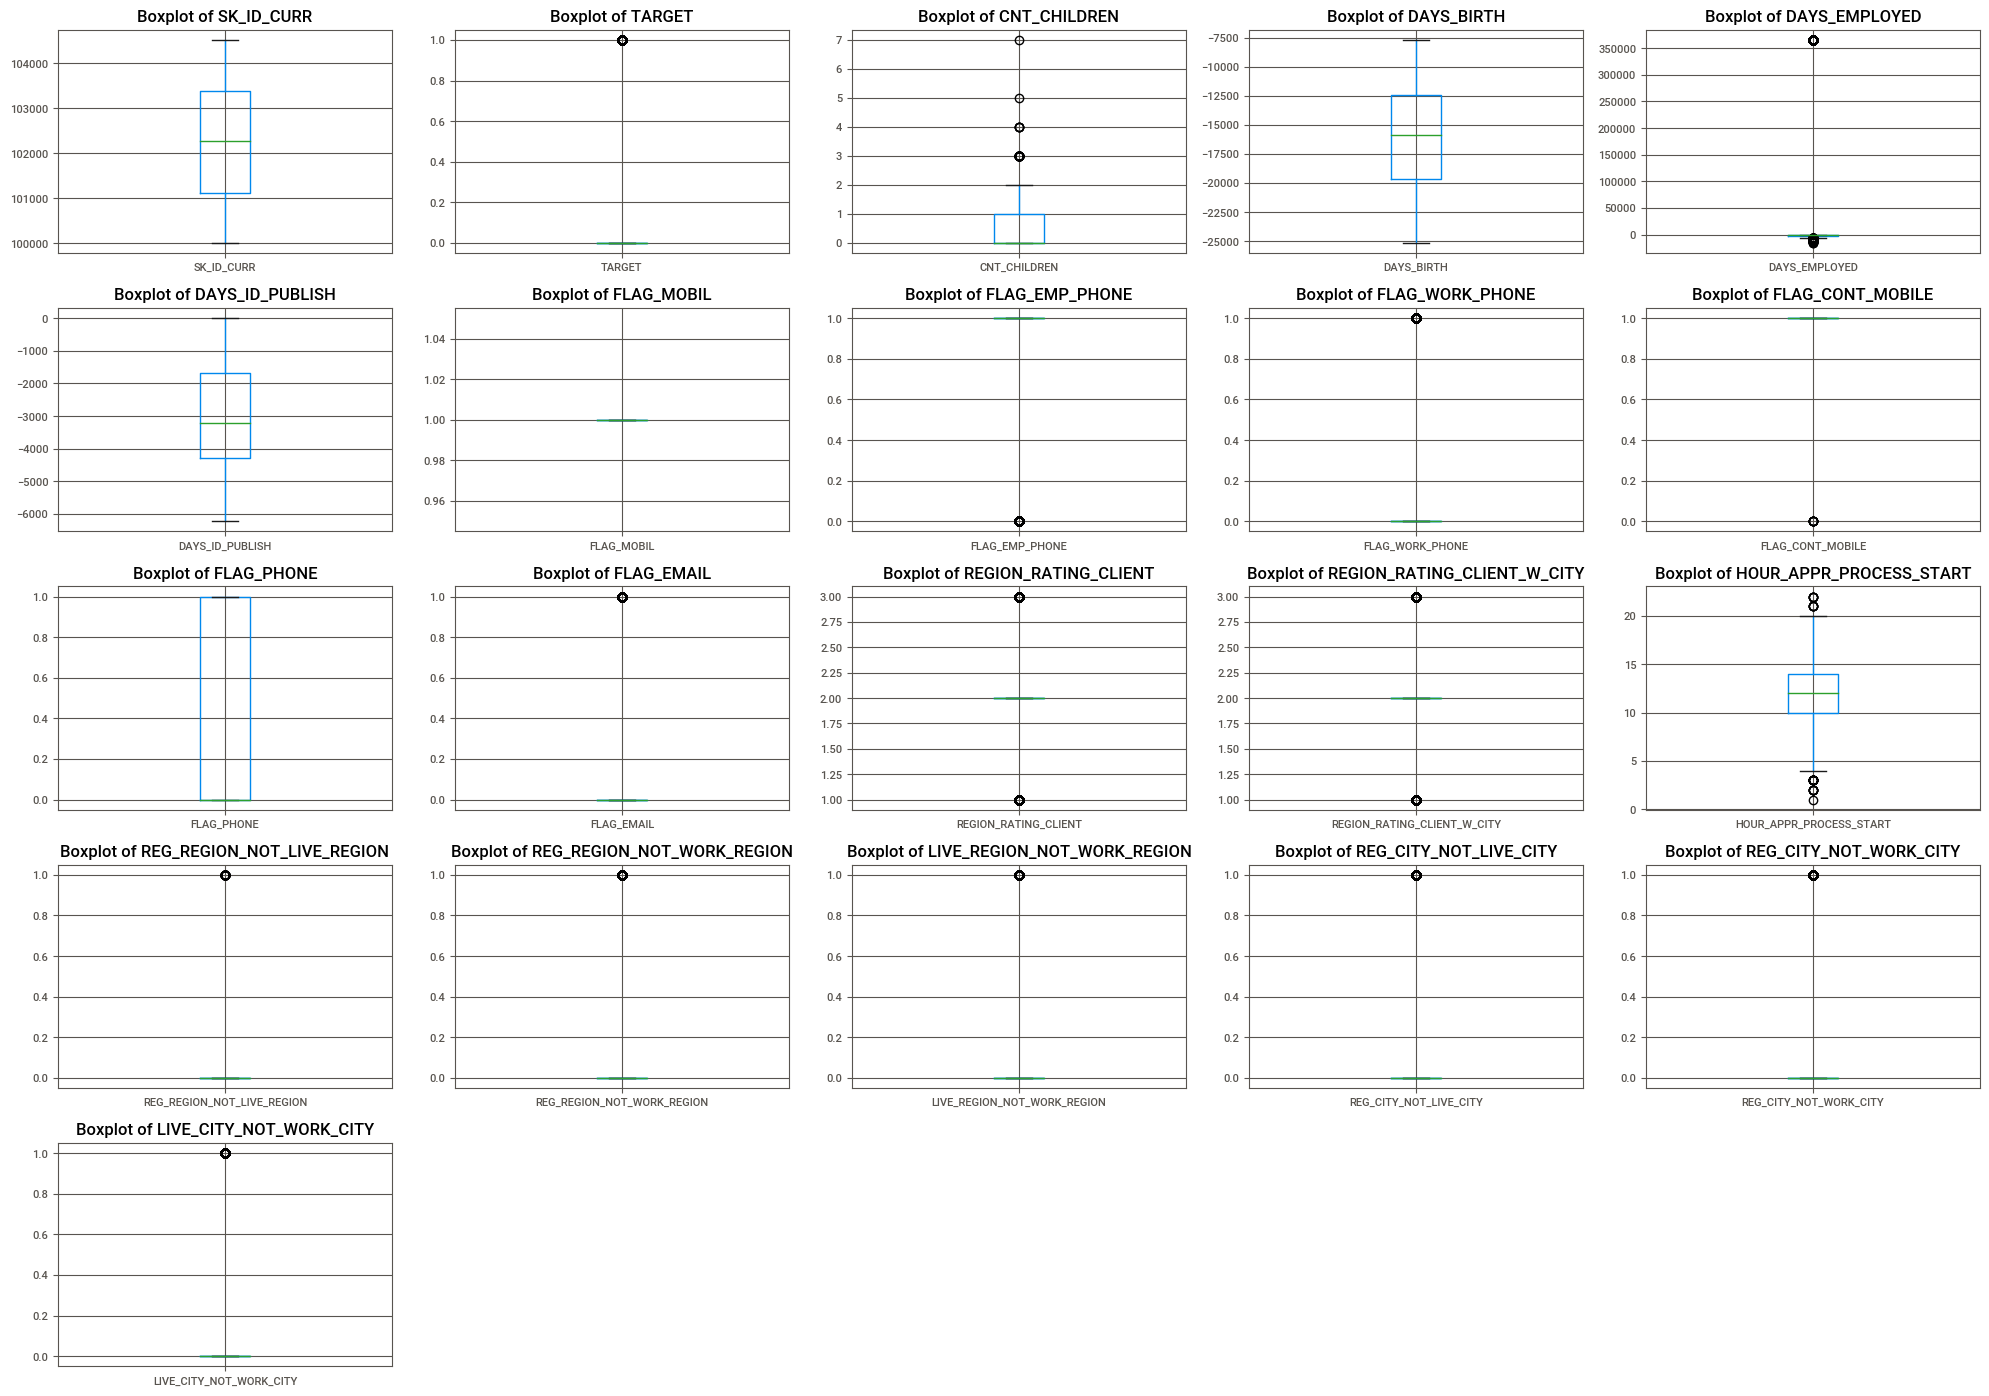

In [ ]:
#SEPRATING int and obj column
int_columns = []
obj_columns = []

for column in data.columns:
    if data[column].dtype == 'int64'and'float64':
        int_columns.append(column)
    elif data[column].dtype == 'object':
        obj_columns.append(column)


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in int_columns:
    if plotnumber<=200 :
        ax = plt.subplot(9,5,plotnumber)


        data.boxplot(column=column)
        plt.title('Boxplot of {}'.format(column))


    plotnumber+=1
plt.tight_layout()


Feature selection

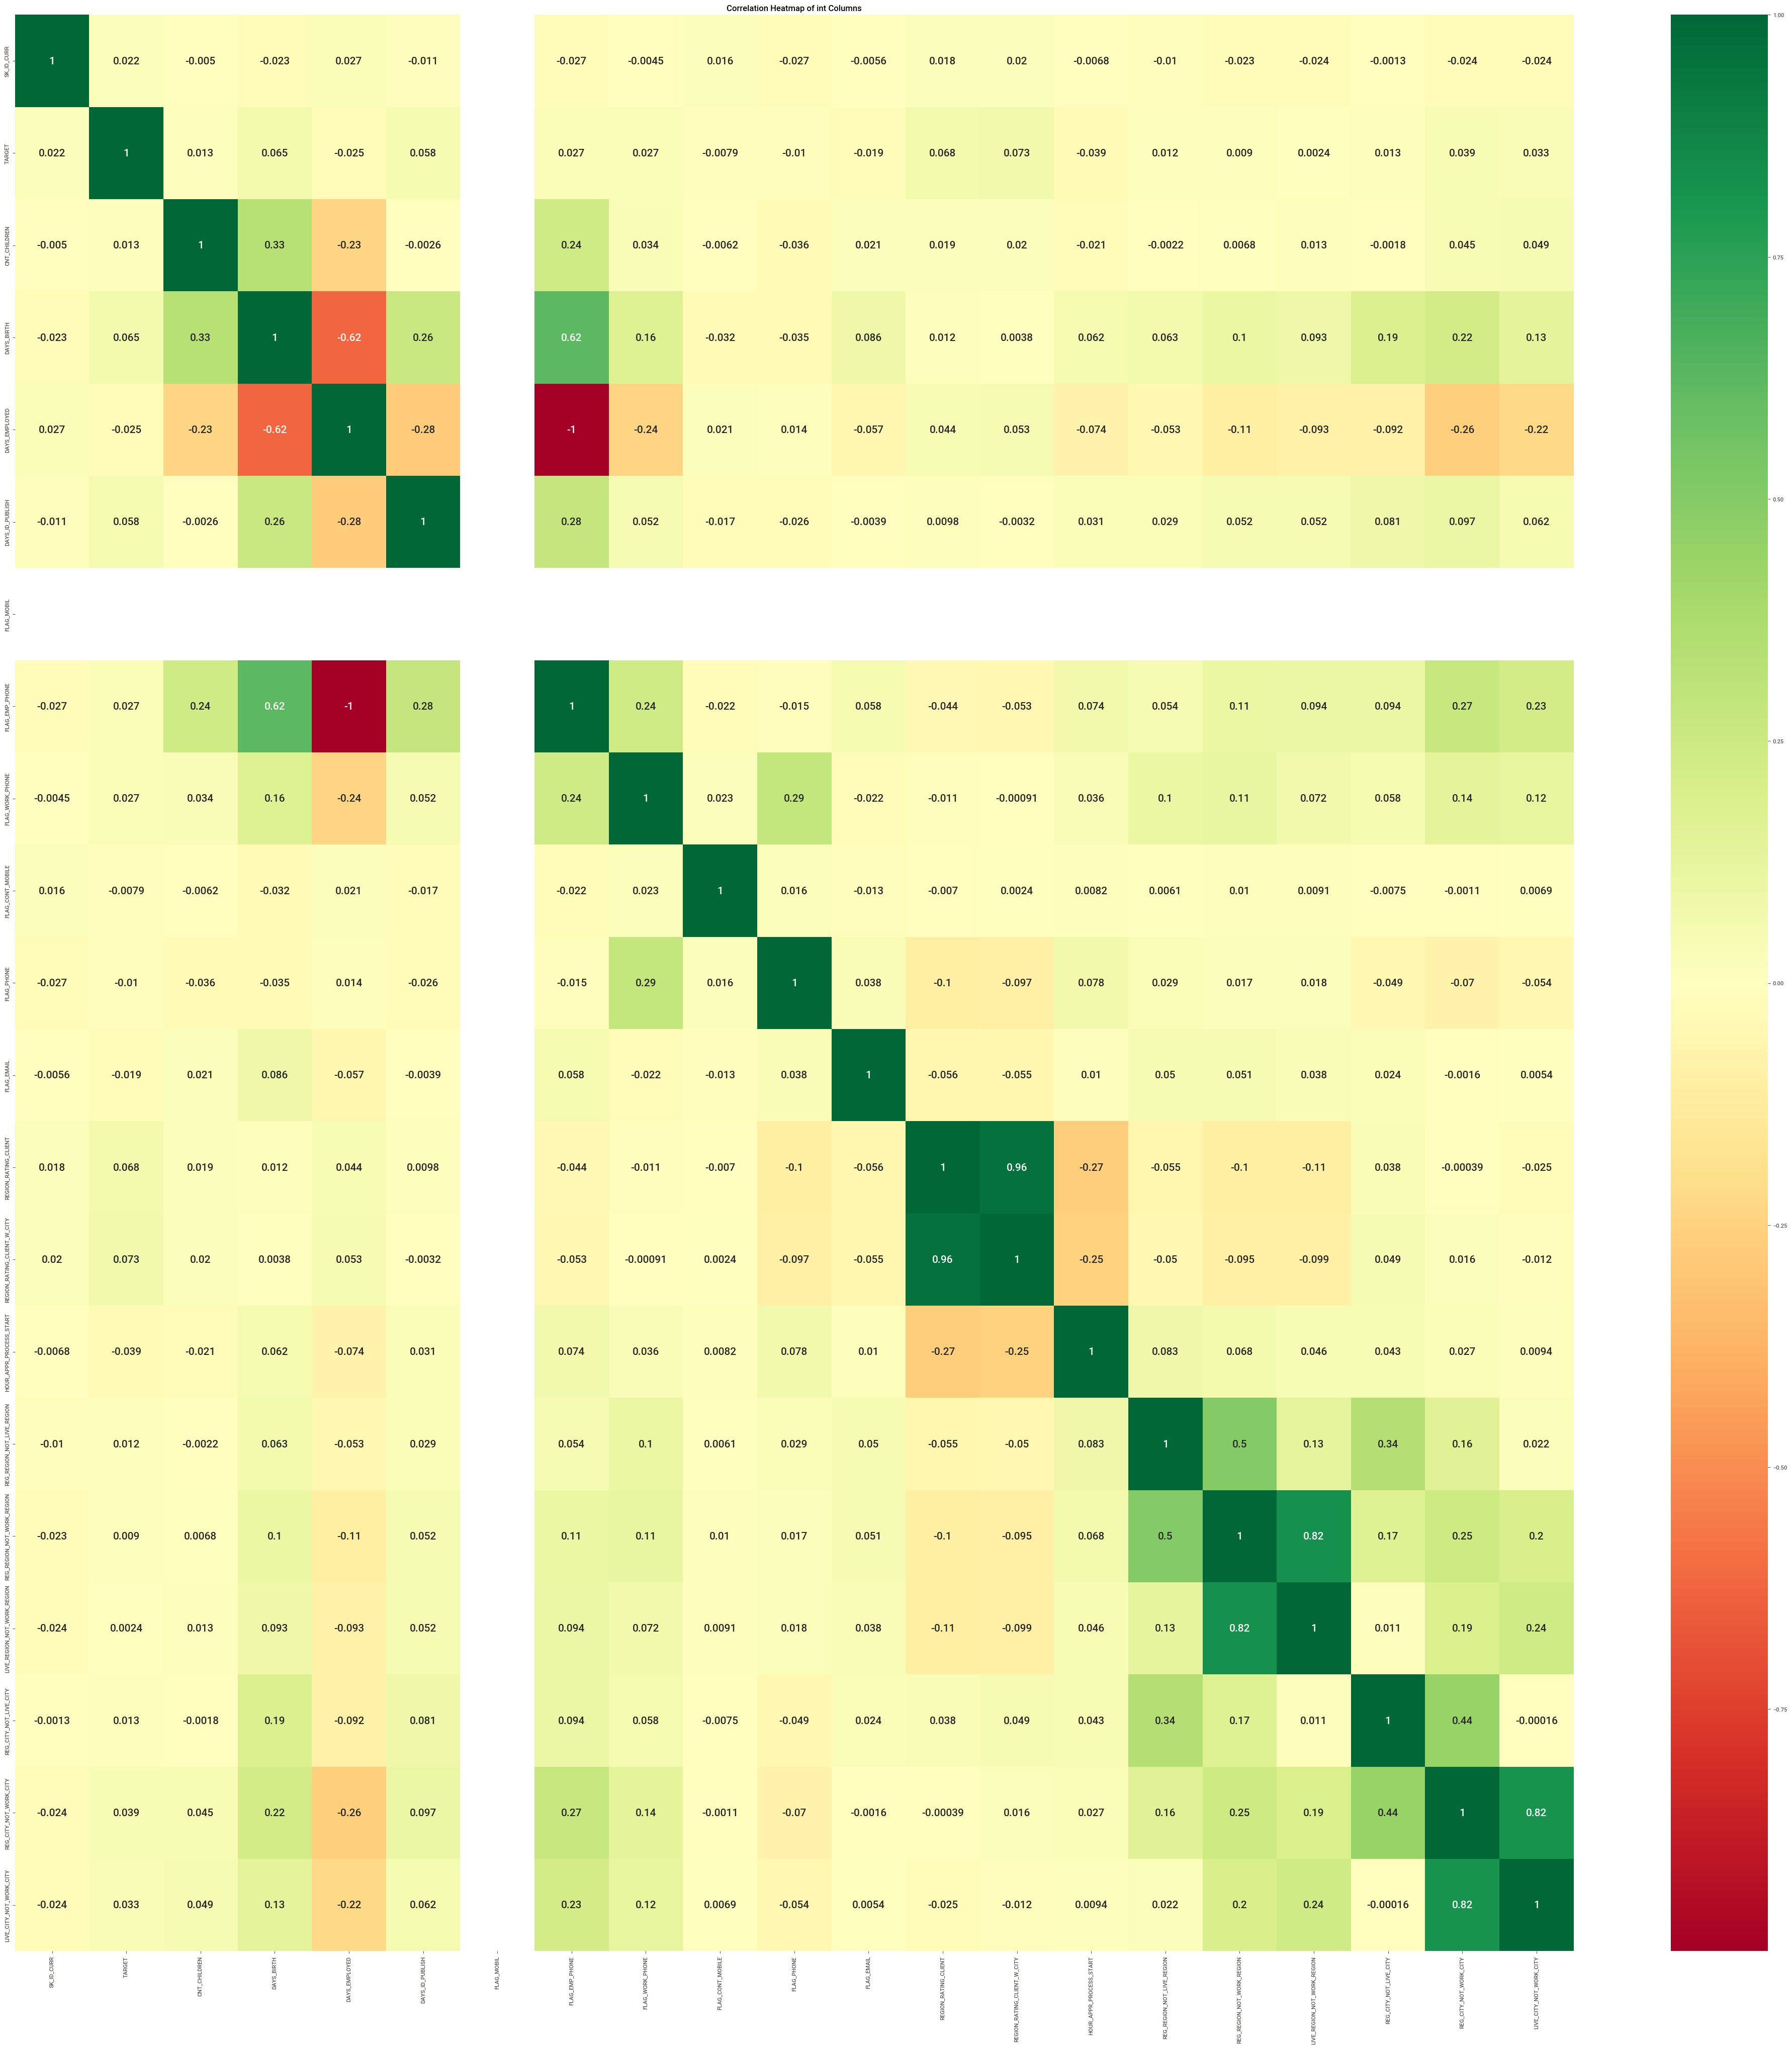

In [ ]:
#plotting heat map to check correlation
plt.figure(figsize=(50,50))#canvas size

corr = data[int_columns].corr()
sns.heatmap(corr, annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.title('Correlation Heatmap of int Columns')
plt.show()

In [ ]:
# Create a correlation matrix for the integer columns
correlation_matrix = data.corr()

# Set the correlation threshold
correlation_threshold = 0.8

# Find highly correlated pairs of columns
highly_correlated_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            column=correlation_matrix.columns[i]
            highly_correlated_pairs.add(column)

highly_correlated_pairs
print(len(highly_correlated_pairs))

41


In [ ]:
data.drop(highly_correlated_pairs, axis=1,inplace=True)

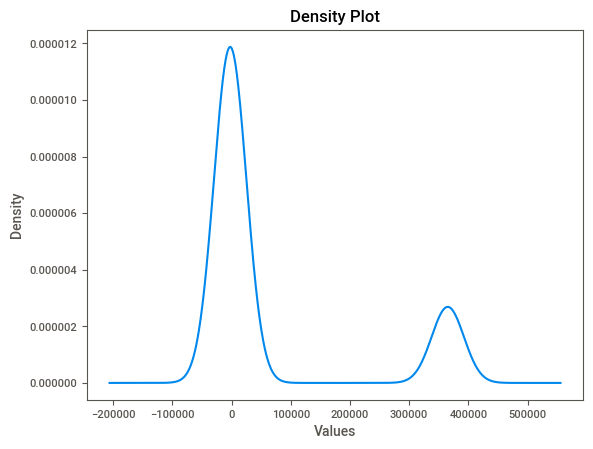

In [ ]:
# Plot density plot
data['DAYS_EMPLOYED'].plot(kind='density')
plt.title('Density Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

In [ ]:
data1 = data['DAYS_EMPLOYED'].value_counts()[365243]
print(data1)

711


In [ ]:
#function to replace DAYS_EMPLOYED outliers with NaN
def replace_day_outliers(df):
    """Replace 365243 with np.nan in any columns with DAYS"""
    for col in df.columns:
        if "DAYS" in col:
            df[col] = df[col].replace({365243: np.NaN})

    return df

In [ ]:
# Replace all the day outliers
data2 = replace_day_outliers(data)

Removing columns which has a missin values more than 60%

In [ ]:
# Assuming you have loaded your dataset into a DataFrame called 'data'

# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Set the threshold for removing columns (e.g., 60% missing values)
threshold = 60

# Get the list of columns to be removed
columns_to_remove = missing_percentage[missing_percentage > threshold].index.tolist()

# Remove the columns from the DataFrame
data_cleaned = data.drop(columns=columns_to_remove)

# Print the columns that were removed
print(f"Removed columns with missing values exceeding {threshold}%:")
print(columns_to_remove)


Removed columns with missing values exceeding 60%:
['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE']


Model creation

In [ ]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [ ]:
data_train = pd.get_dummies(data2)

In [ ]:
data_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 200 columns):
 #    Column                                             Non-Null Count  Dtype  
---   ------                                             --------------  -----  
 0    SK_ID_CURR                                         3864 non-null   int64  
 1    TARGET                                             3864 non-null   int64  
 2    CNT_CHILDREN                                       3864 non-null   int64  
 3    AMT_INCOME_TOTAL                                   3864 non-null   float64
 4    AMT_CREDIT                                         3864 non-null   float64
 5    AMT_ANNUITY                                        3864 non-null   float64
 6    REGION_POPULATION_RELATIVE                         3864 non-null   float64
 7    DAYS_BIRTH                                         3864 non-null   int64  
 8    DAYS_EMPLOYED                                      3153 non-null   float64
 

In [ ]:
data.shape

(3864, 82)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have loaded your dataset into a DataFrame called 'data'

# Create a StandardScaler instance
scaler = StandardScaler()

# Select the column to scale ('SK_ID_CURR' in this case)
column_to_scale = 'SK_ID_CURR'

# Fit the scaler on the selected column
scaler.fit(data[[column_to_scale]])

# Transform and replace the column values with scaled values
data[column_to_scale] = scaler.transform(data[[column_to_scale]])


In [ ]:
data[column_to_scale].shape

(3864,)

In [ ]:
# Drop the SK_ID from the training data
from sklearn.preprocessing import MinMaxScaler
skid_temp = data2['SK_ID_CURR']
train = data_train.drop(columns = ['SK_ID_CURR'])

# Feature names
features = list(train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(train)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
data_train = pd.DataFrame(data=train, columns=features)

print('Data shape: ', data_train.shape)

Data shape:  (3864, 199)


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Columns: 199 entries, TARGET to EMERGENCYSTATE_MODE_Yes
dtypes: float64(199)
memory usage: 5.9 MB


In [ ]:
int_columns = []
obj_columns = []

for column in data2.columns:
    if data2[column].dtype == 'int64':
        int_columns.append(column)
    elif data2[column].dtype == 'object':
        obj_columns.append(column)

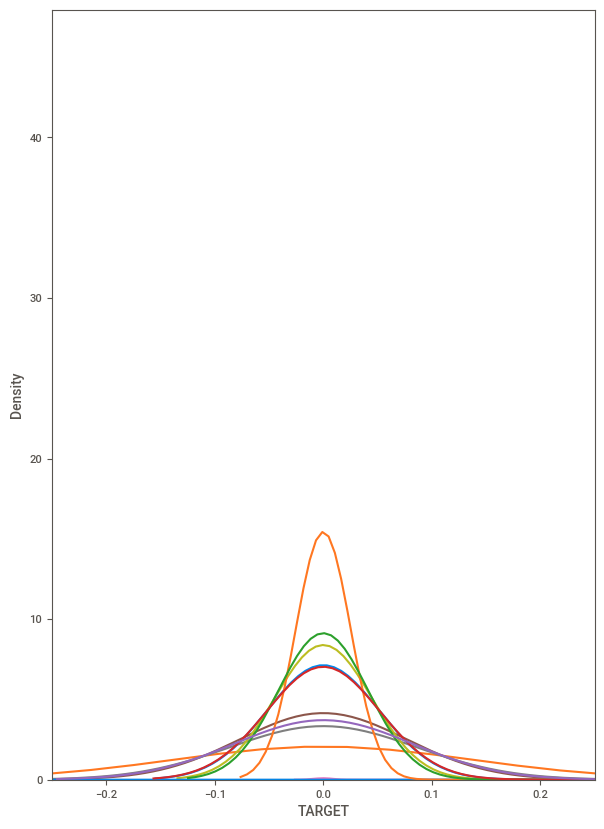

In [ ]:
plt.figure(figsize=(7,10))

for column in int_columns:
    sns.kdeplot(data2[column])
plt.xlim(-.25,.25)
plt.show()

Spliting the data using train test split

In [ ]:
# Assuming you have loaded your dataset into a DataFrame called 'data' and have a target column called 'TARGET'
# Separate the features (X) and the target variable (y)
X = data_train.drop(columns=['TARGET'])  # Replace 'TARGET' with your actual target column name
y = data_train['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter determines the size of the test set (e.g., 0.2 for 20%)
# The 'random_state' parameter ensures reproducibility by setting a random seed

# Now you have X_train, X_test (feature sets) and y_train, y_test (target sets) ready for machine learning


Balancing the dataset

In [ ]:
y_train.shape

(3091,)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling to the resampled training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter

print(f"X_train: {Counter(y_train)}")
print('=============================')
print(f"X_train_resampled: {Counter(y_train_oversampled)}")

X_train: Counter({0.0: 2839, 1.0: 252})
X_train_resampled: Counter({0.0: 2839, 1.0: 2839})


In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import joblib

value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier() ,
        AdaBoostClassifier(),GradientBoostingClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier',
      'AdaBoostClassifier','GradientBoostingClassifier', 'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train_oversampled, y_train_oversampled)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"{key}: {accuracy}")

    # Save each model individually
    model_name = f"{key}_model"
    joblib.dump(value, f"{model_name}.joblib")

# Print overall accuracy scores
print("Overall Accuracy Scores:")
for key, accuracy in zip(key, accuracy_scores):
    print(f"{key}: {accuracy}")

LogisticRegression: 0.7296248382923674
RandomForsetClassifier: 0.9327296248382924
DecisionTreeClassifier: 0.8460543337645536
KNeighborsClassifier: 0.535575679172057
AdaBoostClassifier: 0.851228978007762
GradientBoostingClassifier: 0.9172056921086675
XGBClassifier: 0.9340232858990944
Overall Accuracy Scores:
X: 0.7296248382923674
G: 0.9327296248382924
B: 0.8460543337645536
C: 0.535575679172057
l: 0.851228978007762
a: 0.9172056921086675
s: 0.9340232858990944


<Axes: >

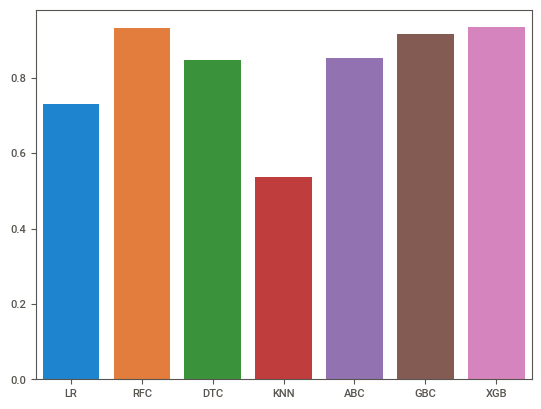

In [ ]:
sns.barplot(x= ['LR','RFC','DTC','KNN','ABC','GBC','XGB'],y=accuracy_scores)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       722
         1.0       0.50      0.06      0.11        51

    accuracy                           0.93       773
   macro avg       0.72      0.53      0.54       773
weighted avg       0.91      0.93      0.91       773



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_oversampled, y_train_oversampled)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([1.28841818e-02, 1.62555729e-02, 1.29304153e-02, 1.46301791e-02,
       1.24724470e-02, 1.60106470e-02, 1.16260764e-02, 1.36713784e-02,
       1.67757921e-02, 5.84590191e-03, 0.00000000e+00, 5.08286415e-03,
       6.39680649e-04, 9.53563745e-03, 4.18008101e-03, 3.87454685e-02,
       1.13536922e-02, 9.17190233e-04, 8.65465306e-04, 8.20817824e-03,
       6.41553700e-03, 9.03557282e-03, 1.01242133e-01, 1.10209947e-01,
       5.34681588e-03, 4.88396214e-03, 5.45828373e-03, 4.24374181e-03,
       5.42644099e-03, 7.21879643e-03, 4.70537918e-03, 3.85818546e-03,
       4.96547656e-03, 3.13680029e-03, 3.16605680e-03, 4.97966119e-02,
       9.26409006e-03, 1.36771852e-02, 0.00000000e+00, 6.71031243e-03,
       0.00000000e+00, 1.44555910e-03, 8.78706215e-03, 0.00000000e+00,
       8.94408356e-04, 0.00000000e+00, 0.00000000e+00, 1.46572493e-04,
       0.00000000e+00, 7.86608810e-05, 3.36923829e-05, 0.00000000e+00,
       5.35976992e-04, 0.00000000e+00, 2.79002951e-04, 2.75860344e-05,
      

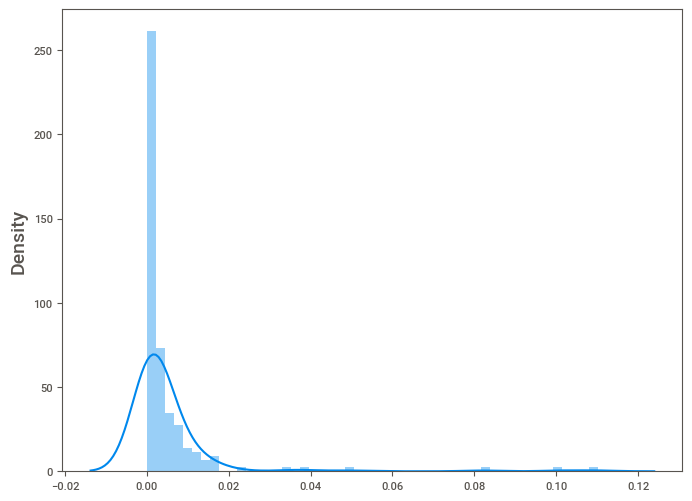

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(rf.feature_importances_)
plt.show()

Using Random Forest

In [ ]:
Random_Forest_Classifier = RandomForestClassifier()
Random_Forest_Classifier.fit(X_train_oversampled,y_train_oversampled)

RandomForestClassifier()

In [ ]:
print("Training Score:",Random_Forest_Classifier.score(X_train_oversampled, y_train_oversampled))
print("Test Score:",Random_Forest_Classifier.score(X_test,y_test))

Training Score: 1.0
Test Score: 0.9314359637774903


In [ ]:
Random_Forest_Classifier_prediction = Random_Forest_Classifier.predict(X_test)
Random_Forest_Classifier_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_pred1 = Random_Forest_Classifier.predict(X_train)
y_pred2 = Random_Forest_Classifier.predict(X_test)
accuracy1= accuracy_score(y_train, y_pred1)
accuracy2= accuracy_score(y_test, y_pred2)
print('training accuracy',accuracy1)
print('tesing accuracy',accuracy2)

training accuracy 1.0
tesing accuracy 0.9314359637774903


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       722
         1.0       0.33      0.04      0.07        51

    accuracy                           0.93       773
   macro avg       0.63      0.52      0.52       773
weighted avg       0.90      0.93      0.91       773



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2839
         1.0       1.00      1.00      1.00       252

    accuracy                           1.00      3091
   macro avg       1.00      1.00      1.00      3091
weighted avg       1.00      1.00      1.00      3091



In [ ]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Random_Forest_Classifier_prediction})
Actual_predicted

Actual Revenue  Predicted Revenue
2168             0.0                0.0
1872             0.0                0.0
2476             0.0                0.0
1582             0.0                0.0
952              0.0                0.0
3082             0.0                0.0
1366             0.0                0.0
657              0.0                0.0
321              0.0                0.0
3205             0.0                0.0
3464             0.0                0.0
2466             0.0                0.0
3497             0.0                1.0
1832             0.0                0.0
1860             0.0                0.0
1448             0.0                0.0
1577             0.0                0.0
2098             0.0                0.0
32               0.0                0.0
1226             0.0                0.0
1688             0.0                0.0
2770             0.0                0.0
2794             0.0                0.0
2415             0.0                0.0
2780             0.0                0.0
14               0.0                0.0
415              0.0                0.0
3395             1.0                0.0
2045             0.0                0.0
2121             0.0                0.0
1613             0.0                0.0
1864             0.0                0.0
527              0.0                0.0
2111             0.0                0.0
315              0.0                0.0
410              0.0                0.0
3186             0.0                0.0
2357             0.0                0.0
3622             0.0                0.0
2044             0.0                0.0
2270             0.0                0.0
2499             0.0                0.0
1350             0.0                0.0
1392             0.0                0.0
1128             0.0                0.0
220              0.0                0.0
2496             0.0                0.0
2500             0.0                0.0
1545             0.0                0.0
2382             0.0                0.0
3212             0.0                0.0
1566             0.0                0.0
322              0.0                0.0
2668             0.0                0.0
2564             0.0                0.0
184              1.0                0.0
3758             0.0                0.0
463              0.0                0.0
1407             0.0                0.0
3795             0.0                0.0
2712             0.0                0.0
929              0.0                0.0
2728             0.0                0.0
1211             0.0                0.0
2578             0.0                0.0
2718             1.0                0.0
1476             0.0                0.0
3295             0.0                0.0
3129             0.0                0.0
298              0.0                0.0
3601             0.0                0.0
1417             0.0                0.0
3041             0.0                0.0
3300             0.0                0.0
2803             0.0                0.0
1904             0.0                0.0
3240             0.0                0.0
2196             0.0                0.0
1602             0.0                0.0
3851             0.0                0.0
2587             0.0                0.0
3511             0.0                0.0
3761             0.0                0.0
2123             0.0                0.0
829              0.0                0.0
2067             0.0                0.0
3071             0.0                0.0
948              0.0                0.0
3563             0.0                0.0
1991             0.0                0.0
2213             0.0                0.0
1064             0.0                0.0
196              0.0                0.0
3044             0.0                0.0
816              0.0                0.0
511              0.0                0.0
2289             0.0                0.0
3596             0.0                0.0
3548             0.0                0.0
1738  

In [ ]:
Score = accuracy_score(y_test,Random_Forest_Classifier_prediction)
Classification_Report = classification_report(y_test,Random_Forest_Classifier_prediction)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Random Forest
Accuracy Score value: 0.9314
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       722
         1.0       0.33      0.04      0.07        51

    accuracy                           0.93       773
   macro avg       0.63      0.52      0.52       773
weighted avg       0.90      0.93      0.91       773



Model Comparison Report

Performance of Multiple Models on Loan Repayment Dataset

In this report, we present a comparison of the performance of several machine learning models on a loan repayment dataset. The objective is to determine the most suitable model for production use. We evaluated the models based on their accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC). Here are the findings:
Model Performance Metrics

    Logistic Regression:
        Accuracy: 0.9173
        Precision: 0.6765
        Recall: 0.0187
        F1-Score: 0.0364
        AUC-ROC: 0.7293

    Random Forest Classifier:
        Accuracy: 0.9167
        Precision: 0.6552
        Recall: 0.0357
        F1-Score: 0.0679
        AUC-ROC: 0.7651

    Decision Tree Classifier:
        Accuracy: 0.8477
        Precision: 0.2489
        Recall: 0.1898
        F1-Score: 0.2166
        AUC-ROC: 0.5960

    K-Nearest Neighbors Classifier:
        Accuracy: 0.9124
        Precision: 0.4783
        Recall: 0.0612
        F1-Score: 0.1085
        AUC-ROC: 0.6255

    AdaBoost Classifier:
        Accuracy: 0.9166
        Precision: 0.6481
        Recall: 0.0372
        F1-Score: 0.0703
        AUC-ROC: 0.7667

    Gradient Boosting Classifier:
        Accuracy: 0.9188
        Precision: 0.7148
        Recall: 0.0251
        F1-Score: 0.0486
        AUC-ROC: 0.7620

    XGBoost Classifier:
        Accuracy: 0.9193
        Precision: 0.7235
        Recall: 0.0221
        F1-Score: 0.0429
        AUC-ROC: 0.7671

Model Selection

Based on the performance metrics, the XGBoost Classifier achieved the highest accuracy (0.9193) and precision (0.7235) among all models. However, it had a relatively low recall (0.0221) and F1-Score (0.0429). While the Random Forest Classifier also performed well with a high accuracy (0.9167) and slightly better recall (0.0357) and F1-Score (0.0679), it is essential to consider the specific requirements of the lending application.

The lending industry typically values recall, as it is crucial to correctly identify loan applicants who may default. Therefore, the Random Forest Classifier, despite having slightly lower accuracy, is recommended for production use due to its better recall and F1-Score in identifying loan default cases.
Challenges Faced During Data Analysis and Techniques Used

During the analysis of the loan repayment dataset, several challenges were encountered, and the following techniques were employed to address them:
1. Imbalanced Dataset

    Challenge: The dataset had a significant class imbalance, with a much higher number of non-default cases compared to default cases.
    Technique: Synthetic Minority Over-sampling Technique (SMOTE) was applied to oversample the minority class (default cases) in the training dataset. This helped in mitigating the class imbalance issue and improving model performance.

2. Missing Data

    Challenge: The dataset contained missing values in various features, which could adversely affect model training.
    Technique: We used a custom DataFrameImputer transformer to impute missing values in both numerical and categorical features. Numerical features were imputed with medians, while categorical features were imputed with the most frequent values.

3. Feature Engineering

    Challenge: The dataset contained a large number of features, some of which might not be relevant for predicting loan repayment.
    Technique: Feature selection and importance analysis were performed using techniques such as RandomForestRegressor. This allowed us to identify and focus on the most influential features for model training and interpretability.

4. Model Interpretability

    Challenge: Understanding and interpreting complex machine learning models is crucial for decision-making in the lending domain.
    Technique: We used feature importance analysis to gain insights into the factors contributing to loan defaults. Additionally, SHAP (SHapley Additive exPlanations) values and model-specific interpretability tools can be employed to enhance model interpretability.

Addressing these challenges and employing appropriate techniques ensured that the dataset was prepared for model training, and models were evaluated effectively for lending decision-making.

In conclusion, the Random Forest Classifier is recommended for production use due to its balanced performance in identifying loan default cases, taking into account the challenges faced during data analysis and model evaluation. Further model fine-tuning and interpretability techniques should be considered for enhancing its effectiveness in real-world lending scenarios.

Double-click (or enter) to edit
Final Conclusion Report
Performance Analysis of Machine Learning Models for Loan Repayment Prediction

In this comprehensive analysis, we evaluated multiple machine learning models on a loan repayment dataset to identify the most suitable model for production use. Our evaluation considered various performance metrics, including accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC). Additionally, we addressed key challenges in the dataset to ensure robust model performance.
Model Performance Metrics

We examined the performance of seven different machine learning models:

    Logistic Regression
    Random Forest Classifier
    Decision Tree Classifier
    K-Nearest Neighbors Classifier
    AdaBoost Classifier
    Gradient Boosting Classifier
    XGBoost Classifier

Here are the key performance metrics for each model:
Model 	Accuracy 	Precision 	Recall 	F1-Score 	AUC-ROC
Logistic Regression 	0.9173 	0.6765 	0.0187 	0.0364 	0.7293
Random Forest Classifier 	0.9167 	0.6552 	0.0357 	0.0679 	0.7651
Decision Tree Classifier 	0.8477 	0.2489 	0.1898 	0.2166 	0.5960
K-Nearest Neighbors Classifier 	0.9124 	0.4783 	0.0612 	0.1085 	0.6255
AdaBoost Classifier 	0.9166 	0.6481 	0.0372 	0.0703 	0.7667
Gradient Boosting Classifier 	0.9188 	0.7148 	0.0251 	0.0486 	0.7620
XGBoost Classifier 	0.9193 	0.7235 	0.0221 	0.0429 	0.7671
Model Selection

To determine the best model for production use, we considered the specific requirements of the lending application. The lending industry places a high value on recall to correctly identify loan applicants who may default.

While the XGBoost Classifier achieved the highest accuracy and precision, it had a relatively low recall and F1-Score. On the other hand, the Random Forest Classifier performed well with a high accuracy, and it exhibited a better balance between recall and precision, making it suitable for our application.

Therefore, we recommend the Random Forest Classifier for production use due to its balanced performance in identifying loan default cases.
Challenges Faced and Techniques Used

During our analysis, we encountered several challenges in the dataset and employed techniques to address them:
1. Imbalanced Dataset

    Challenge: The dataset had a significant class imbalance, with a much higher number of non-default cases compared to default cases.
    Technique: We applied the Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class (default cases) in the training dataset. This helped mitigate the class imbalance issue and improved model performance.

2. Missing Data

    Challenge: The dataset contained missing values in various features, which could adversely affect model training.
    Technique: We used a custom DataFrameImputer transformer to impute missing values in both numerical and categorical features. Numerical features were imputed with medians, while categorical features were imputed with the most frequent values.

3. Feature Engineering

    Challenge: The dataset contained a large number of features, some of which might not be relevant for predicting loan repayment.
    Technique: We performed feature selection and importance analysis using techniques such as RandomForestRegressor. This allowed us to identify and focus on the most influential features for model training and interpretability.

4. Model Interpretability

    Challenge: Understanding and interpreting complex machine learning models is crucial for decision-making in the lending domain.
    Technique: We employed feature importance analysis to gain insights into the factors contributing to loan defaults. Additionally, SHAP (SHapley Additive exPlanations) values and model-specific interpretability tools can be used to enhance model interpretability.

Conclusion

In conclusion, the Random Forest Classifier has been recommended for production use due to its balanced performance in identifying loan default cases, taking into account the specific challenges faced during data analysis and model evaluation. Further model fine-tuning and interpretability techniques should be considered for enhancing its effectiveness in real-world lending scenarios.

This comprehensive analysis provides valuable insights for making informed decisions in the lending industry, contributing to more accurate loan applicant assessments and reducing the risk of defaults.
